# **1. CNN: 기본형태**

## **1-1. 패키지(라이브러리) 불러오기**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import mnist

## **1-2. 데이터 읽어오기**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## **1-3. 데이터 준비하기**

In [ ]:
# Change the shape of the tensor
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

# Normalize values
X_train = X_train.astype("float32")/255

# One hot encode Y
y_train = to_categorical(y_train)


## **1-4. 모델 정의**

- 원하는 레이어를 선택하여 모델 구성하기

In [ ]:
# build model with Keras's Sequential API
model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(100, activation='relu'),
                    Dense(10, activation="softmax")
                    ])

- 최적화 함수, 손실함수, 측정(모니터링)변수를 설정하여 모델 컴파일하기

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## **1-5. 모델 학습**

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 18s 3ms/step - loss: 0.2277 - accuracy: 0.9298
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0480 - accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0190 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0138 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0101 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0076 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

## **1-6. 모델 평가**

1/1 [==============================] - 0s 124ms/step


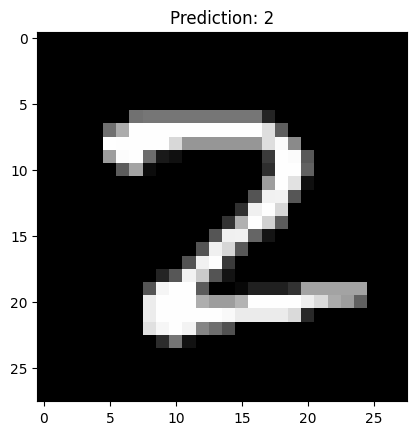

In [ ]:
# pick random image from test set
img = random.choice(X_test)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title(f"Prediction: {np.argmax(model.predict((img.reshape((1, 28, 28, 1)).astype('float32'))/255)[0], axis=-1)}")
plt.show()

# **2. CNN:콜백 적용 및 과적합 대응**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

# Conv2D는 width*height*channel을 입력으로 받음
train_x = train_x.reshape((60000, 28, 28, 1)) # ADDED
test_x = test_x.reshape((10000, 28, 28, 1)) # ADDED

train_y = raw_train_y
test_y = raw_test_y

## **2-1. 콜백 적용**


In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import Callback

from IPython.display import clear_output

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])



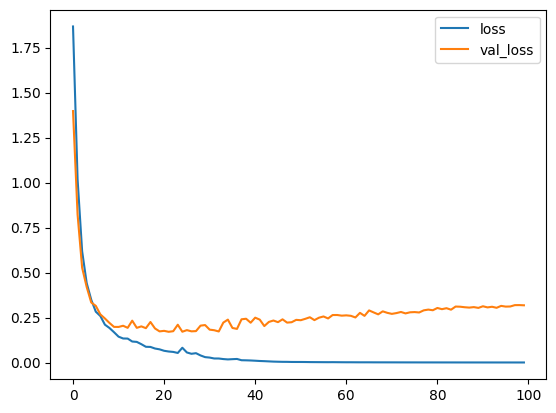

loss =  0.00025439454475417733 , val_loss =  0.31797266006469727
313/313 [==============================] - 1s 3ms/step - loss: 0.2943 - accuracy: 0.9556
loss= 0.2943349778652191
acc= 0.9556000232696533
313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=100, verbose=1, batch_size=128, validation_split=0.2,
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


## **2-2. 과적합 대응: Drop Out**

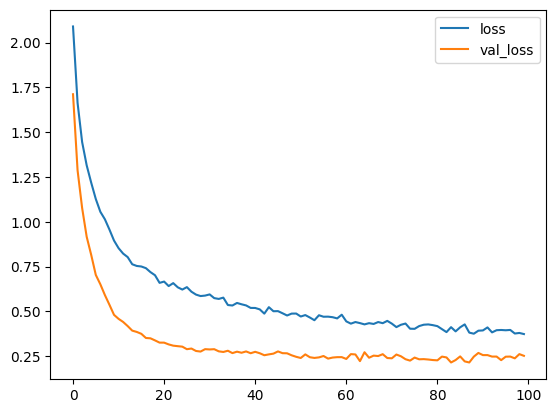

loss =  0.3728240132331848 , val_loss =  0.25124719738960266
313/313 [==============================] - 1s 3ms/step - loss: 0.2463 - accuracy: 0.9595
loss= 0.24628950655460358
acc= 0.9595000147819519
313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # ADDED
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=100, verbose=1, batch_size=128, validation_split=0.2,
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


## **2-3. 과적합 대응: 배치 정규화**


In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization()) # ADDED
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization()) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=100, verbose=1, batch_size=128, validation_split=0.2,
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


loss =  0.0010714930249378085 , val_loss =  0.13619743287563324
313/313 [==============================] - 1s 3ms/step - loss: 0.1187 - accuracy: 0.9655
loss= 0.11869744956493378
acc= 0.965499997138977
313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # ADDED
model.add(BatchNormalization()) # ADDED
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # ADDED
model.add(BatchNormalization()) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)        

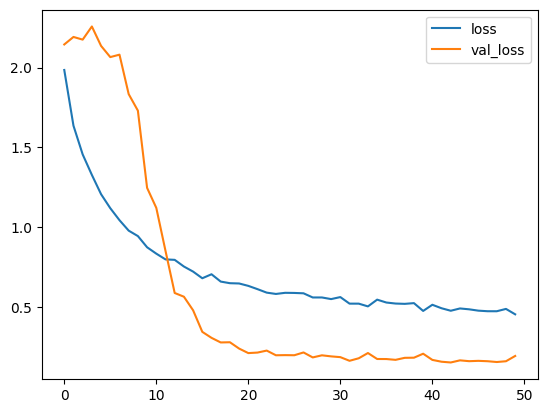

loss =  0.4543107748031616 , val_loss =  0.19345121085643768
313/313 [==============================] - 1s 4ms/step - loss: 0.1898 - accuracy: 0.9512
loss= 0.18978039920330048
acc= 0.951200008392334
313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


In [ ]:
plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=50, verbose=1, batch_size=128, validation_split=0.2,
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


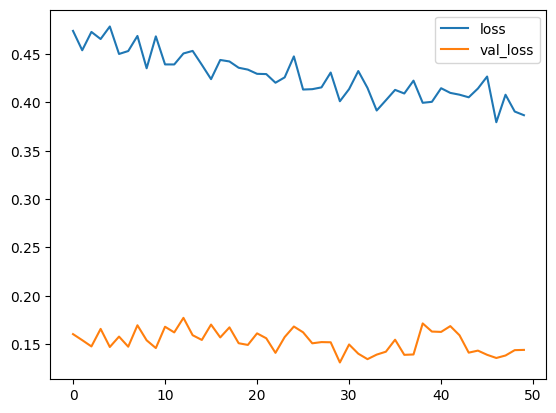

loss =  0.3867007791996002 , val_loss =  0.1441328078508377
313/313 [==============================] - 1s 3ms/step - loss: 0.1479 - accuracy: 0.9619
loss= 0.14789031445980072
acc= 0.961899995803833


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # 모니터링 대상
                              factor=0.2,         # 줄이는 양
                              patience=50,         # 대상 기간동안 유지
                              min_learning_rate=0.00001)       # 최소 학습율


model.fit(train_x[:6000], train_y[:6000], epochs=50, verbose=1, batch_size=128, validation_split=0.2,
          callbacks=[plot_losses, reduce_lr])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

## **2-4. 잘못 분류된 결과 보기**

In [ ]:
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

313/313 [==============================] - 1s 2ms/step


y = 5, predicted=6


y = 3, predicted=8


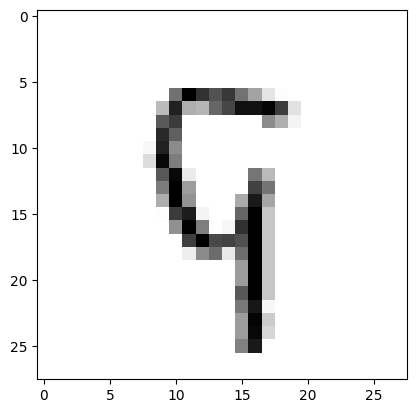

y = 9, predicted=5


y = 2, predicted=9


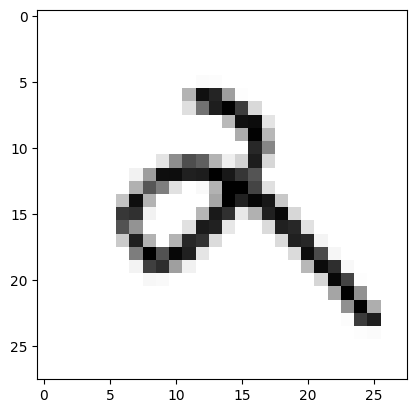

y = 2, predicted=9


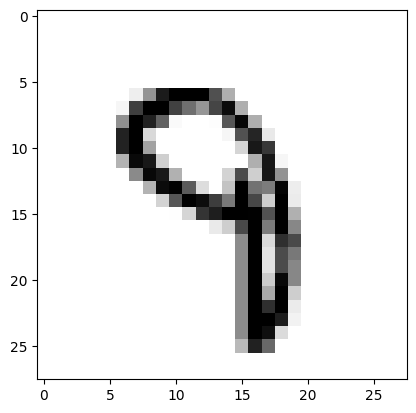

y = 9, predicted=8


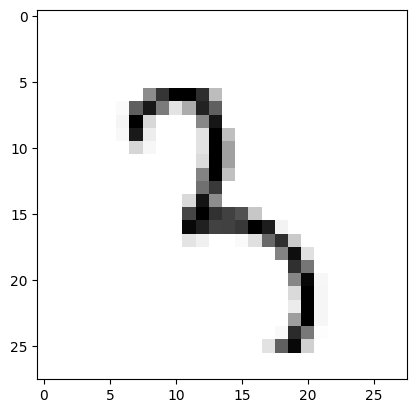

y = 3, predicted=9


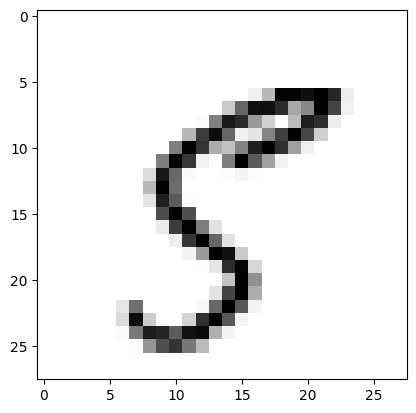

y = 5, predicted=8


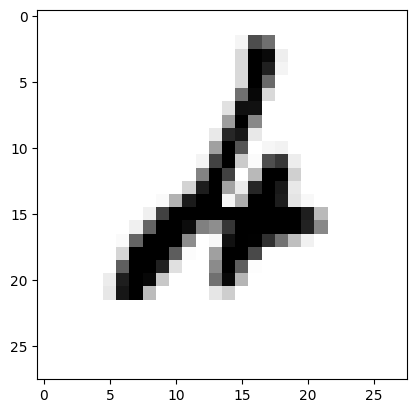

y = 4, predicted=6


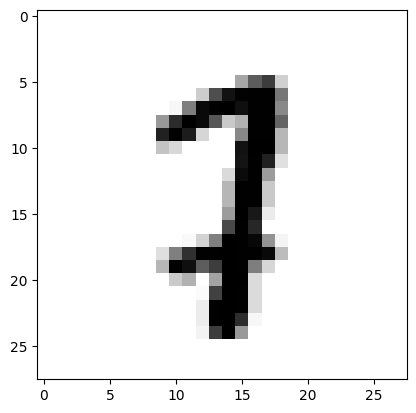

y = 7, predicted=3


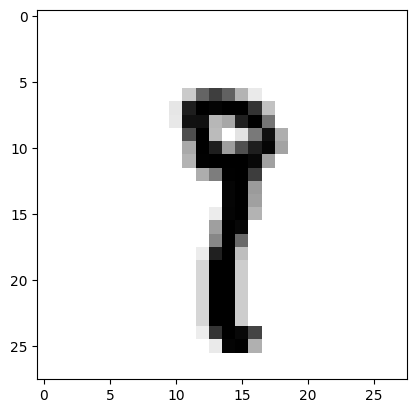

y = 9, predicted=1


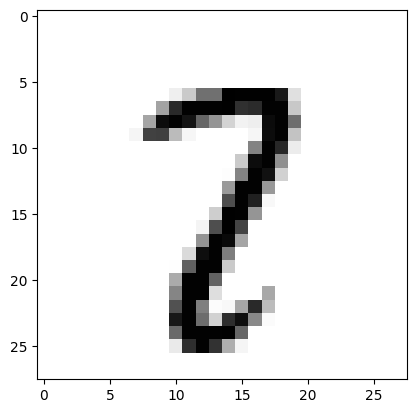

y = 2, predicted=3


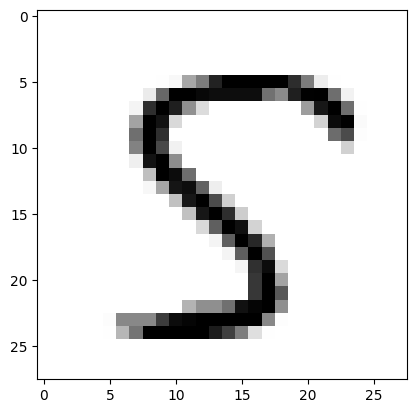

y = 5, predicted=0


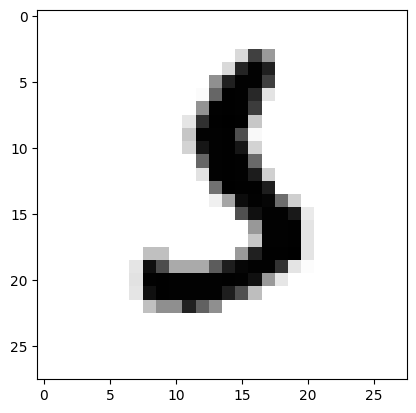

y = 5, predicted=6


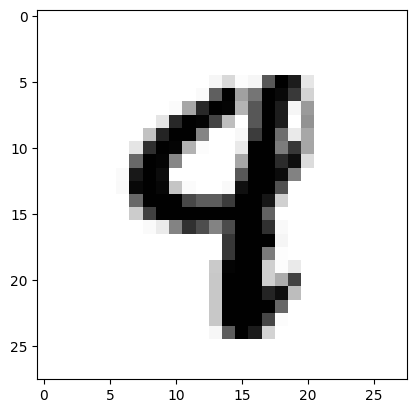

y = 9, predicted=4


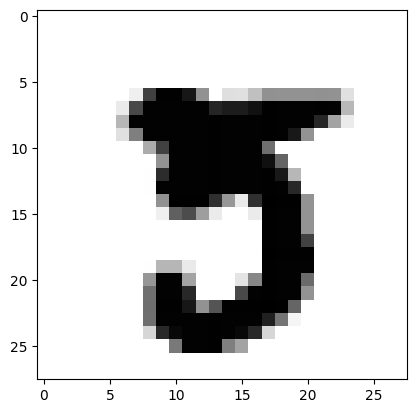

y = 5, predicted=3


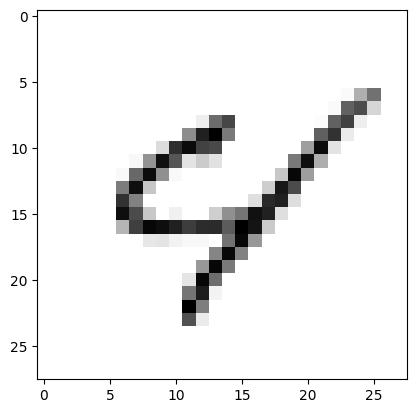

y = 4, predicted=7


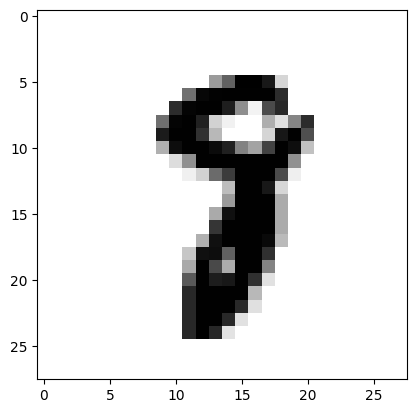

y = 8, predicted=9


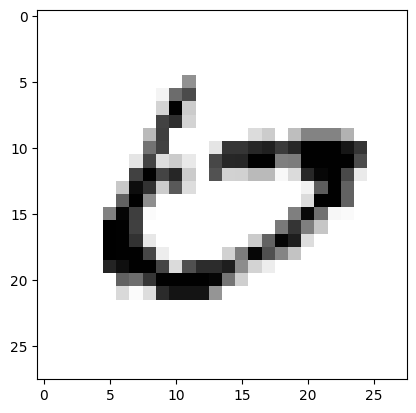

y = 6, predicted=0


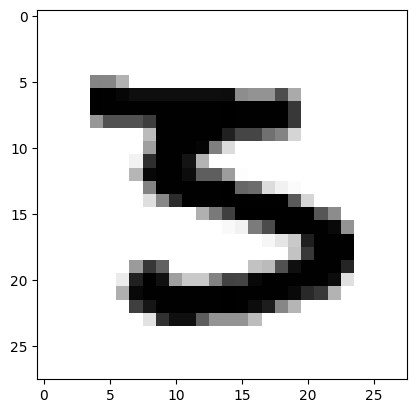

y = 3, predicted=9


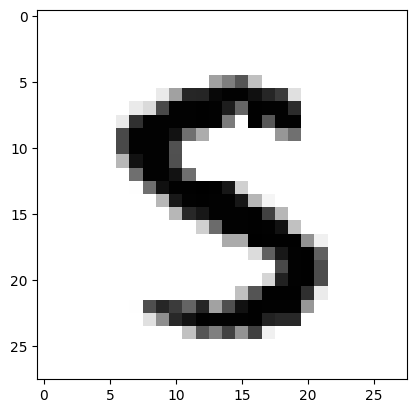

y = 5, predicted=3


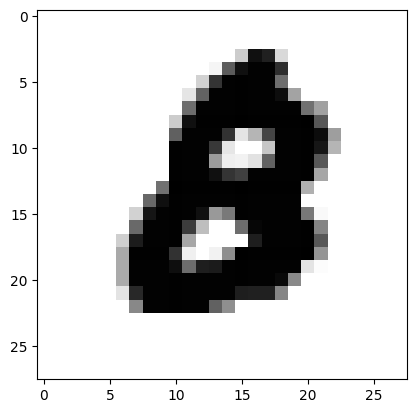

y = 8, predicted=6


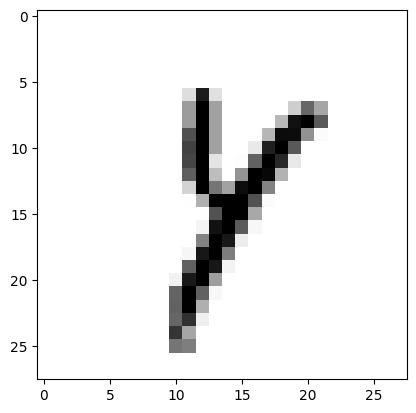

y = 4, predicted=8


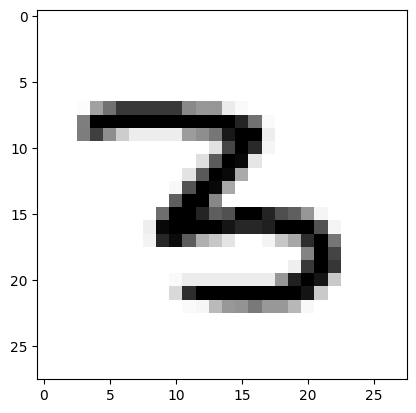

y = 3, predicted=2


y = 7, predicted=9


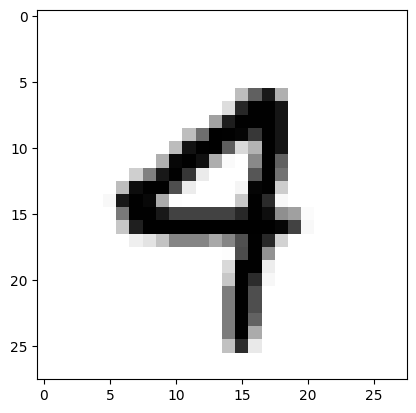

y = 4, predicted=9


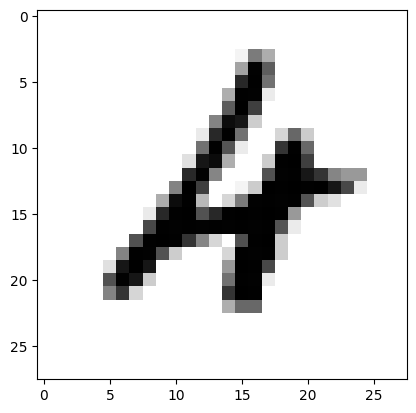

y = 4, predicted=6


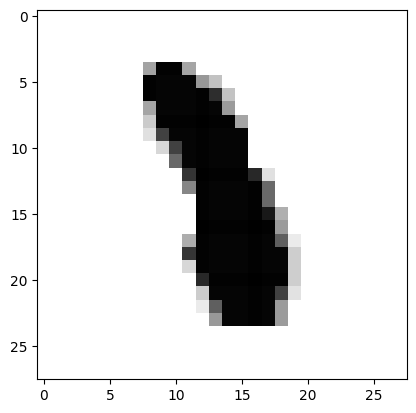

y = 1, predicted=8


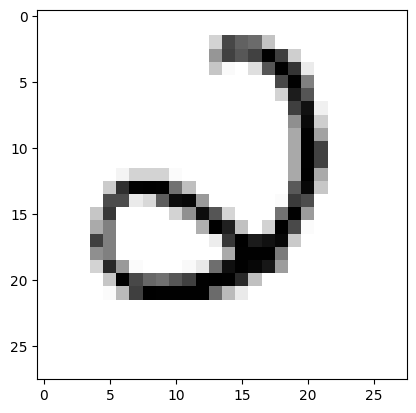

y = 2, predicted=1


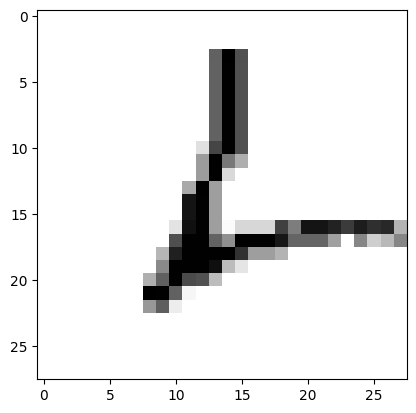

y = 2, predicted=6


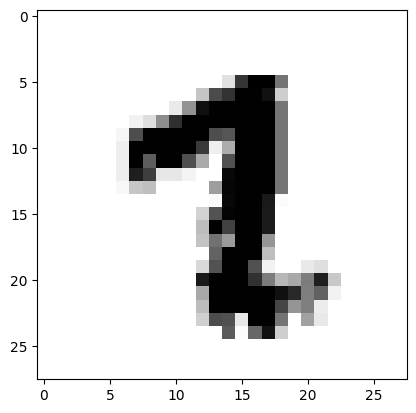

y = 2, predicted=7


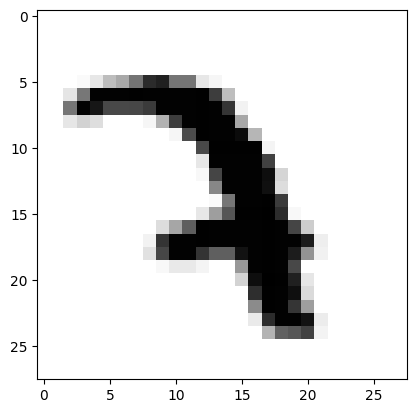

y = 7, predicted=3


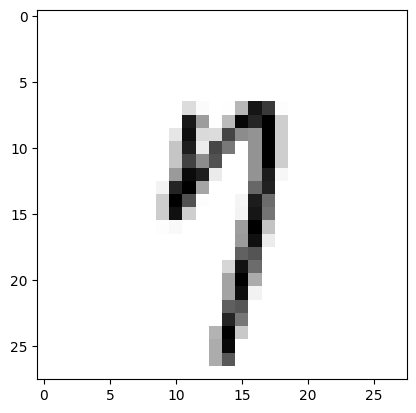

y = 7, predicted=4


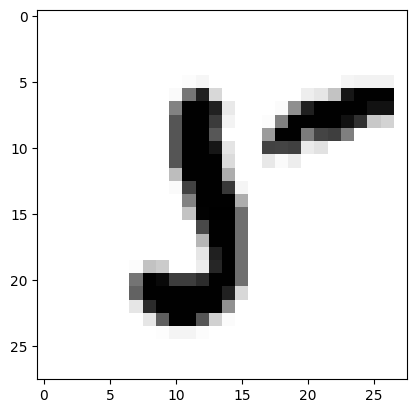

y = 5, predicted=0


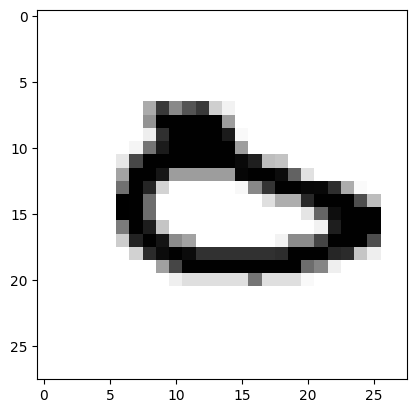

y = 0, predicted=5


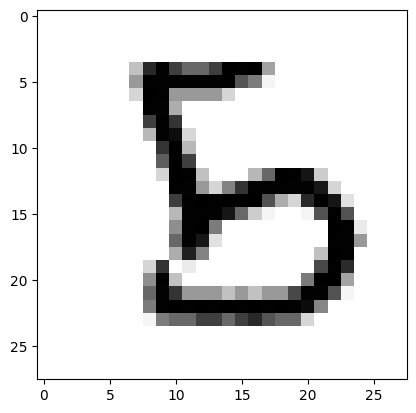

y = 5, predicted=6


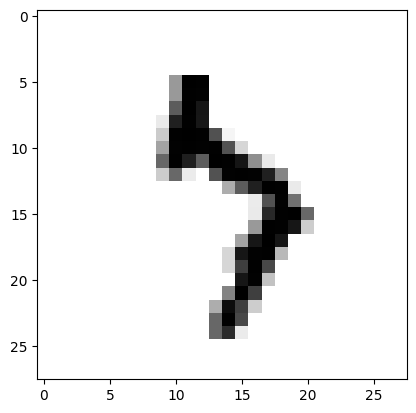

y = 7, predicted=4


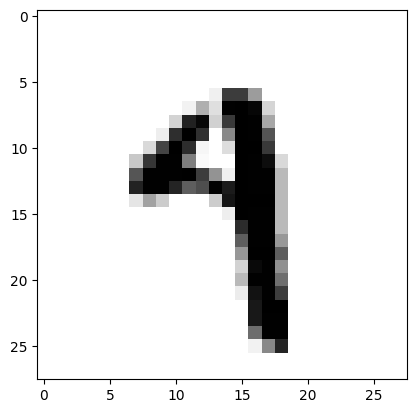

y = 4, predicted=9


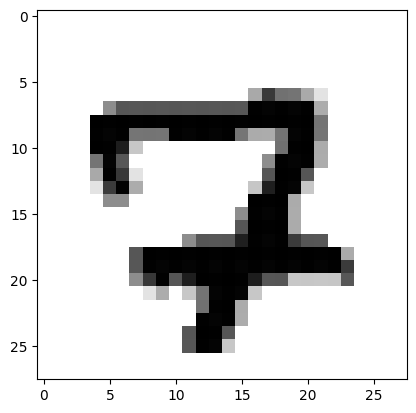

y = 7, predicted=3


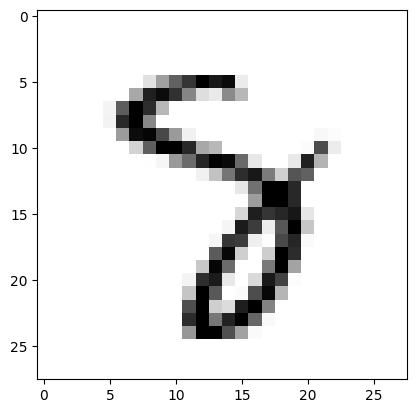

y = 8, predicted=3


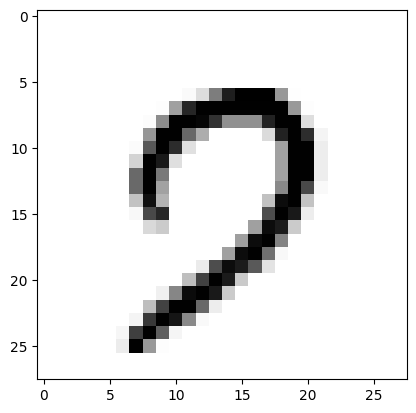

y = 7, predicted=9


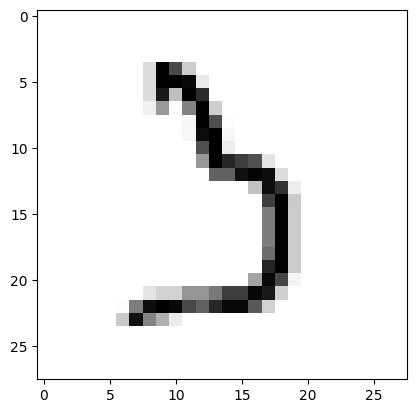

y = 3, predicted=5


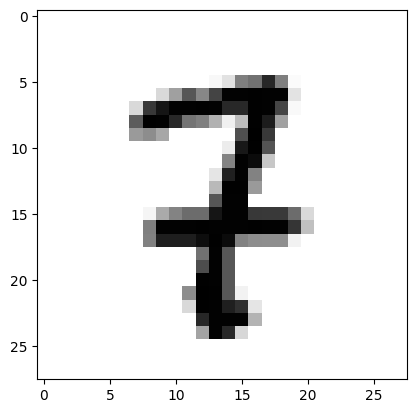

y = 7, predicted=3


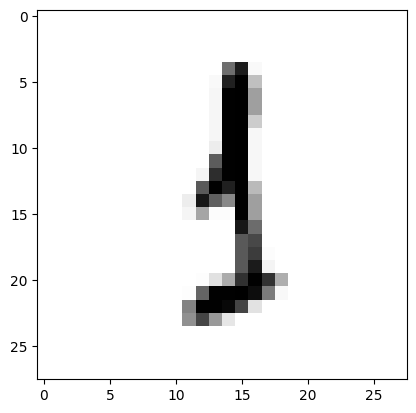

y = 1, predicted=0


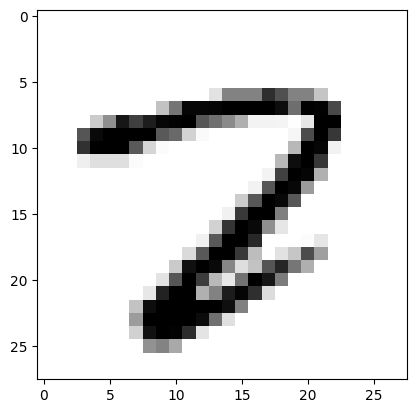

y = 2, predicted=7


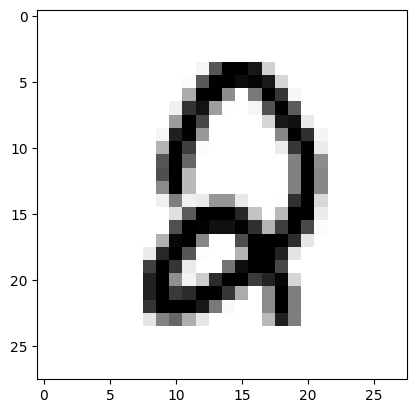

y = 2, predicted=8


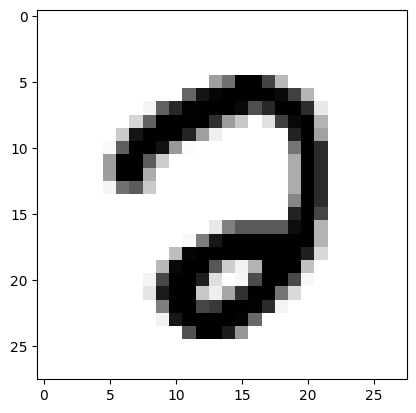

y = 2, predicted=0


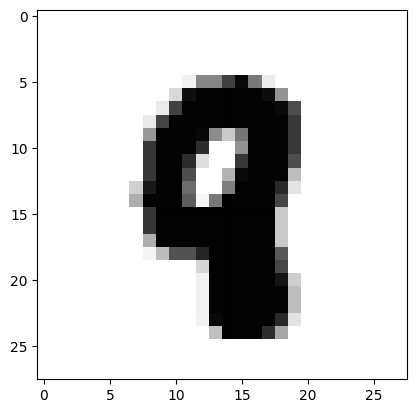

y = 8, predicted=9


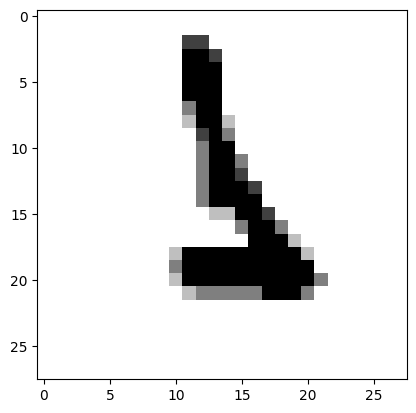

y = 1, predicted=6


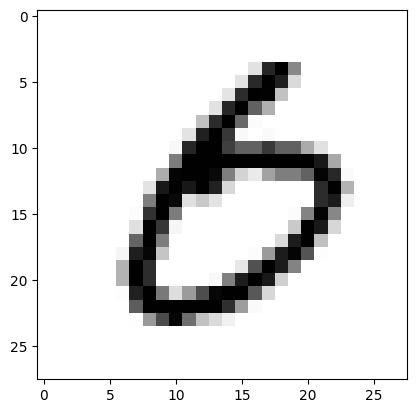

y = 6, predicted=0


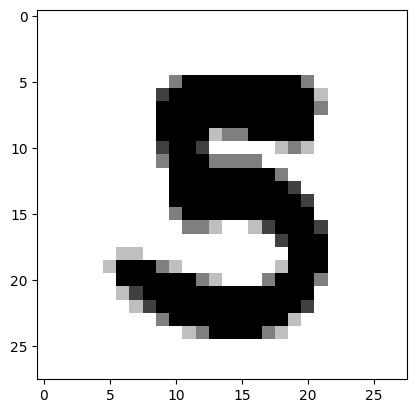

y = 5, predicted=3


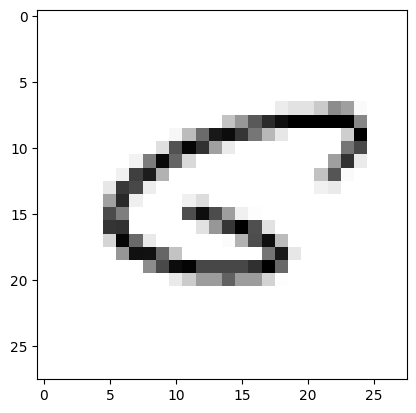

y = 6, predicted=5


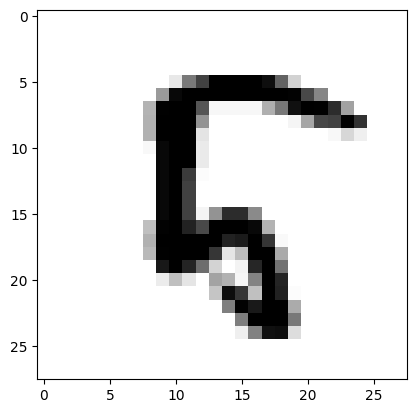

y = 5, predicted=6


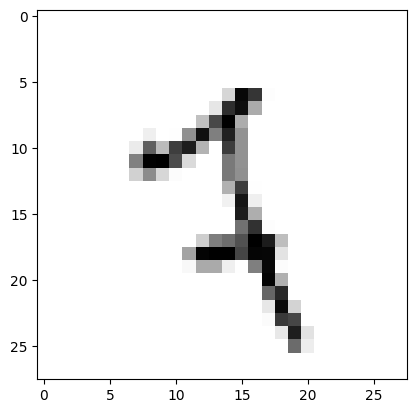

y = 7, predicted=1


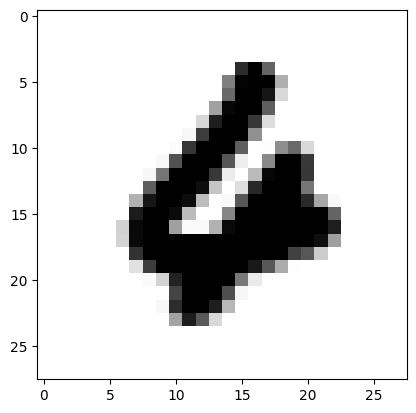

y = 4, predicted=6


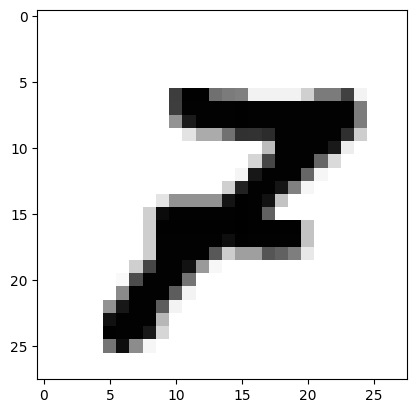

y = 7, predicted=3


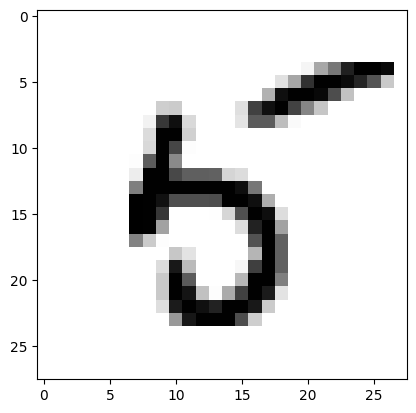

y = 5, predicted=6


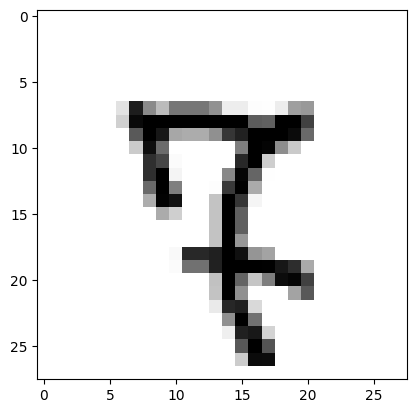

y = 7, predicted=9


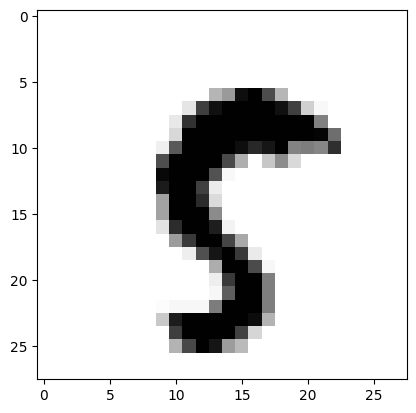

y = 5, predicted=0


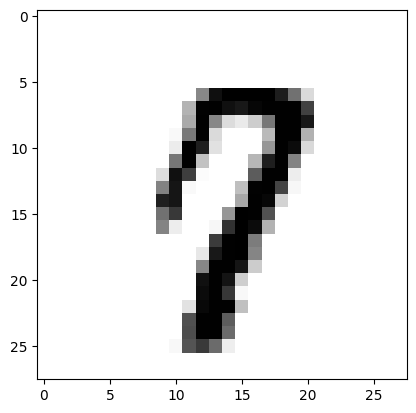

y = 7, predicted=9


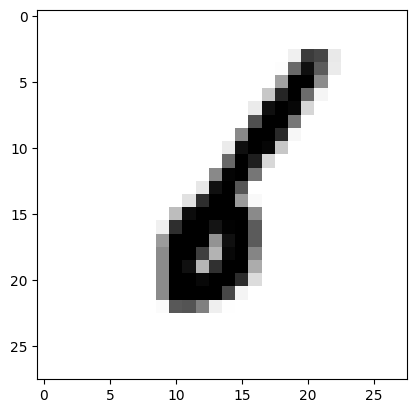

y = 6, predicted=8


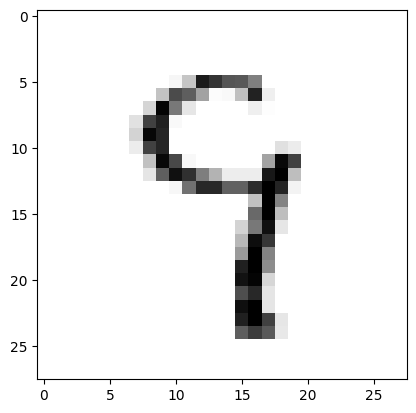

y = 9, predicted=4


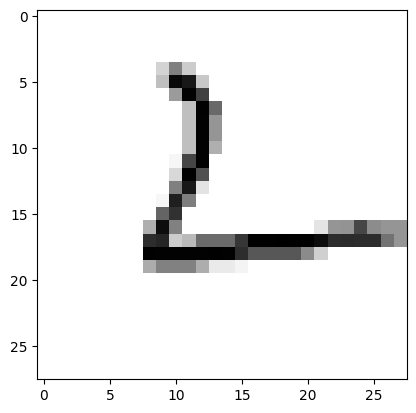

y = 2, predicted=4


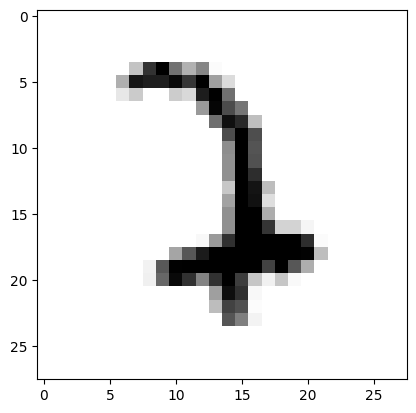

y = 7, predicted=2


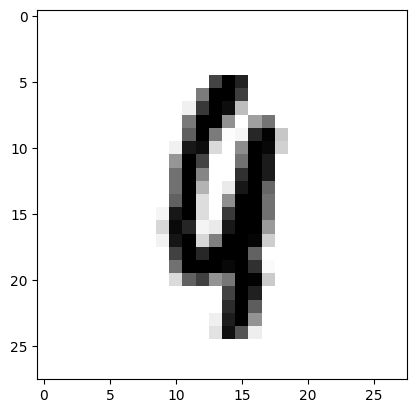

y = 9, predicted=4


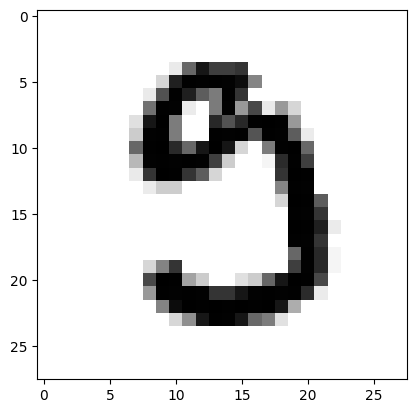

y = 9, predicted=3


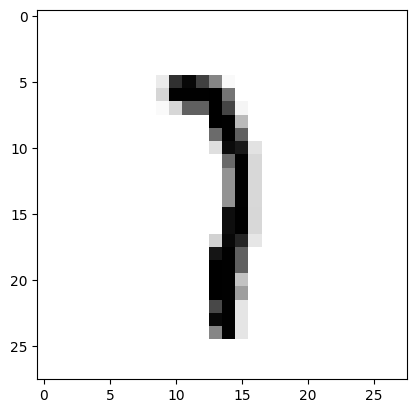

y = 7, predicted=1


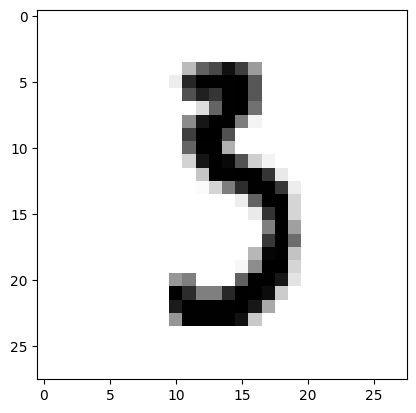

y = 3, predicted=5


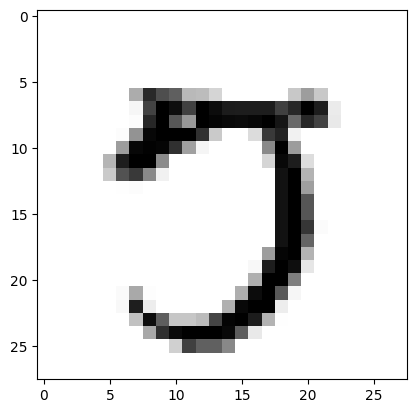

y = 5, predicted=7


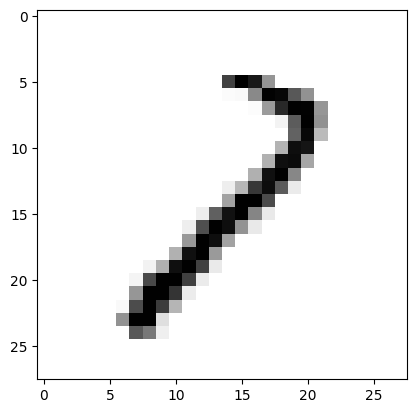

y = 7, predicted=1


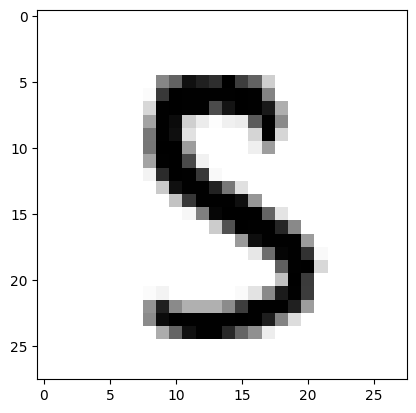

y = 5, predicted=3


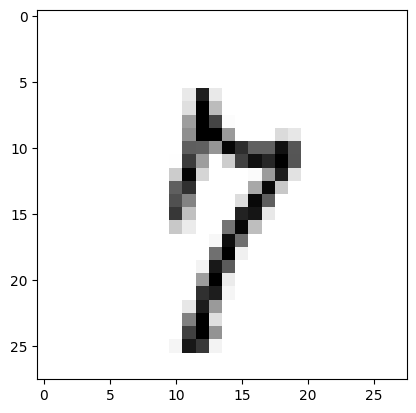

y = 7, predicted=4


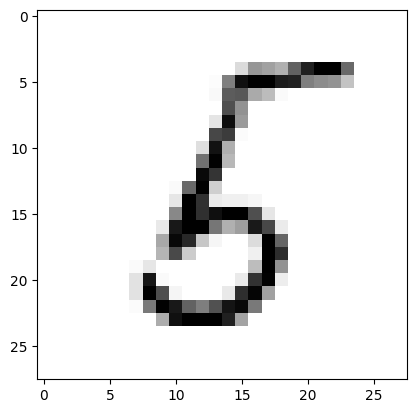

y = 5, predicted=6


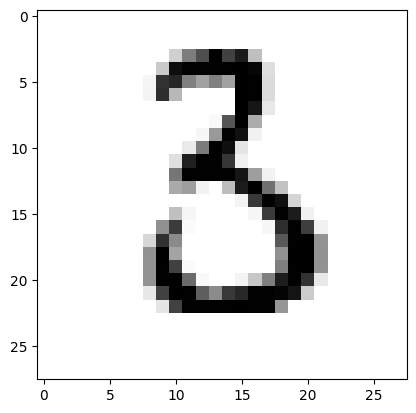

y = 3, predicted=6


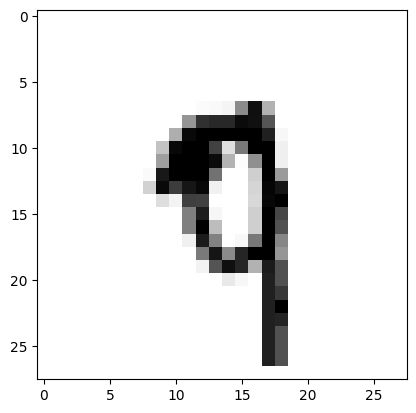

y = 9, predicted=4


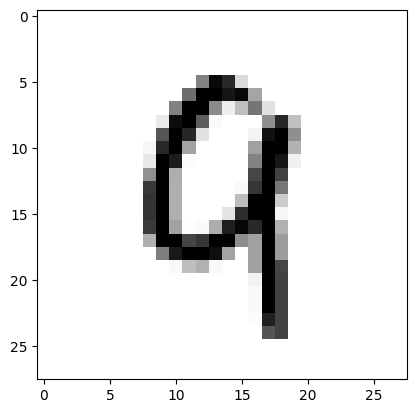

y = 9, predicted=4


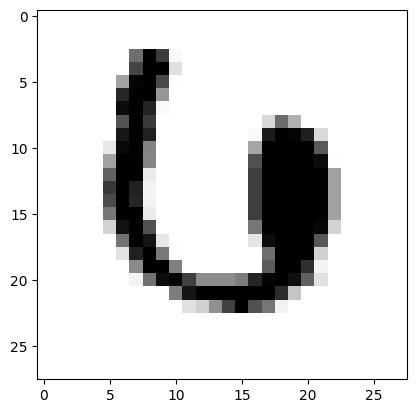

y = 6, predicted=0


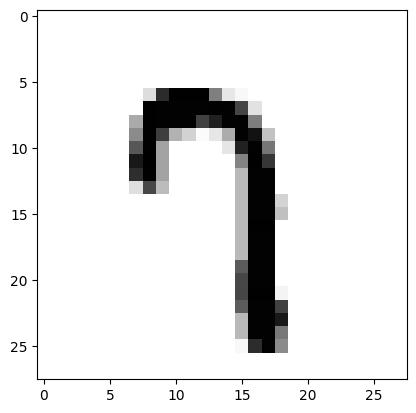

y = 7, predicted=9


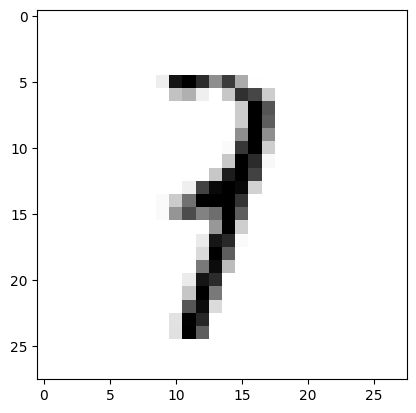

y = 7, predicted=1


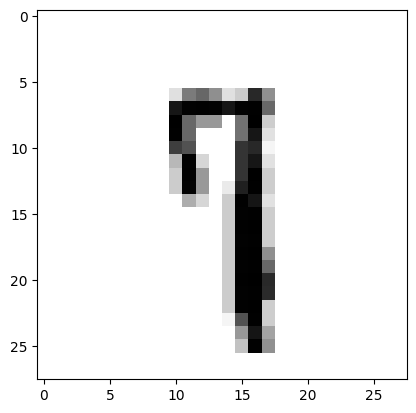

y = 7, predicted=9


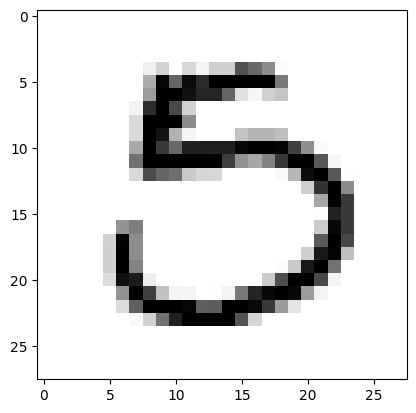

y = 5, predicted=3


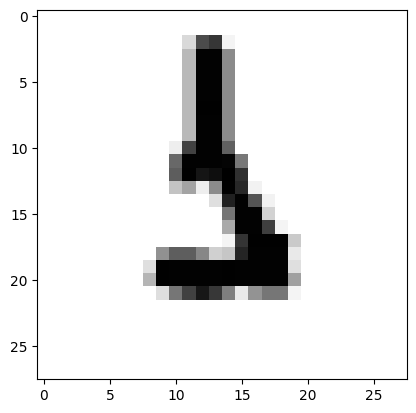

y = 1, predicted=5


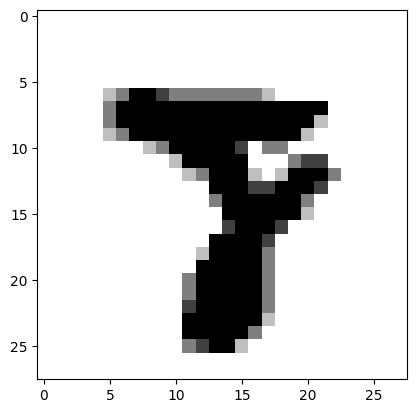

y = 8, predicted=3


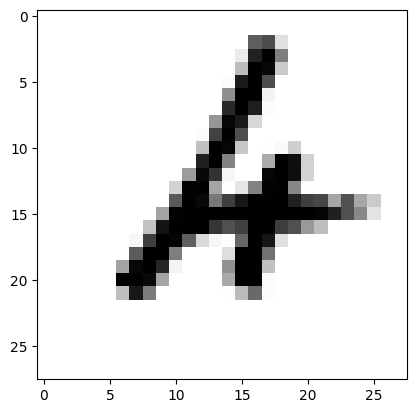

y = 4, predicted=6


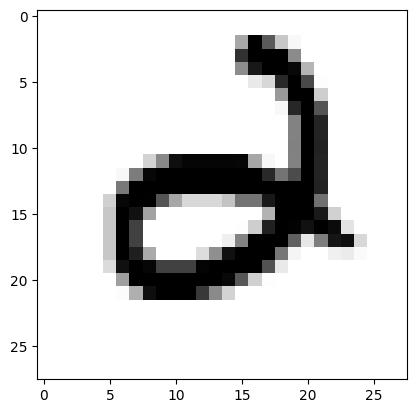

y = 2, predicted=6


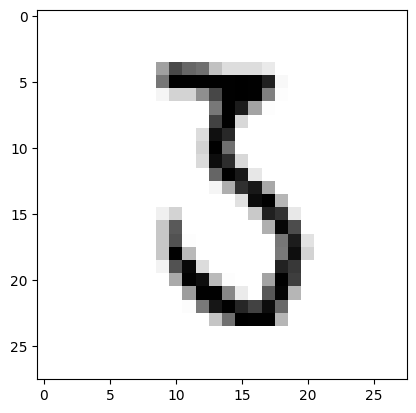

y = 3, predicted=5


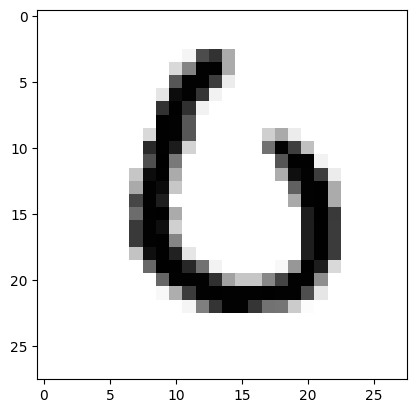

y = 0, predicted=6


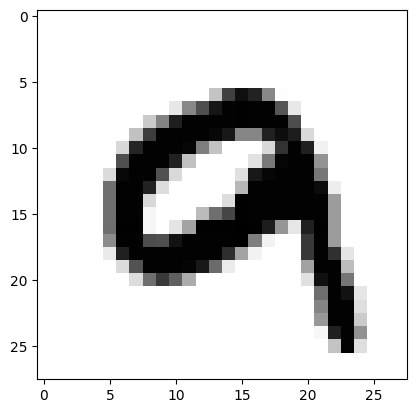

y = 9, predicted=0


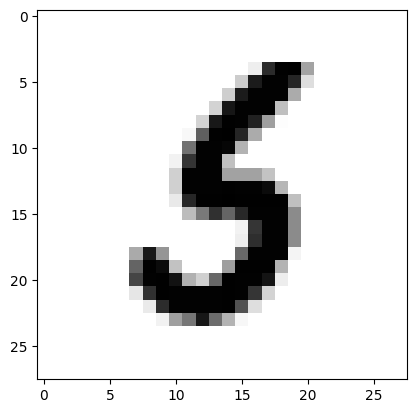

y = 5, predicted=6


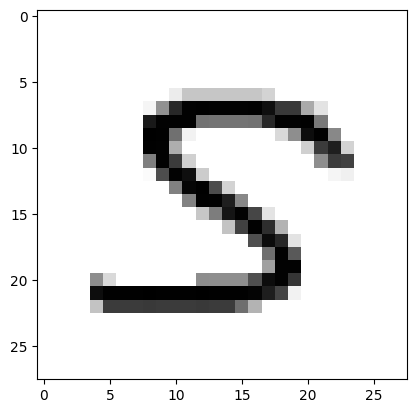

y = 5, predicted=0


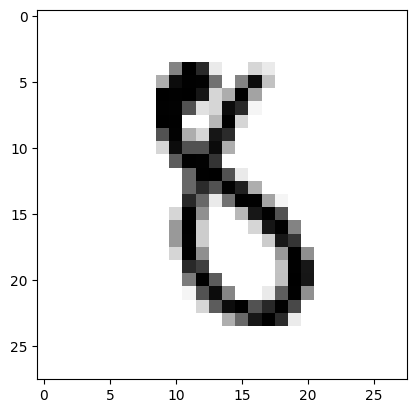

y = 8, predicted=6


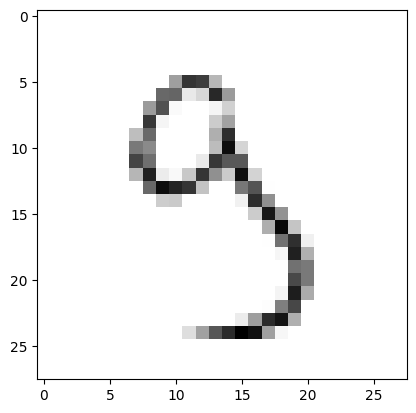

y = 9, predicted=0


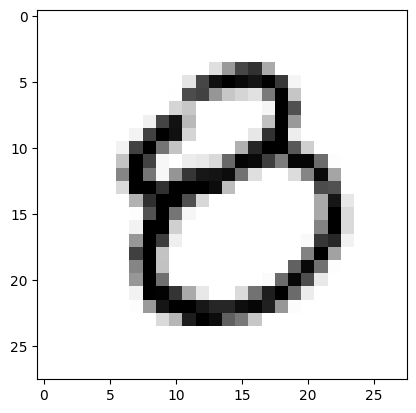

y = 8, predicted=0


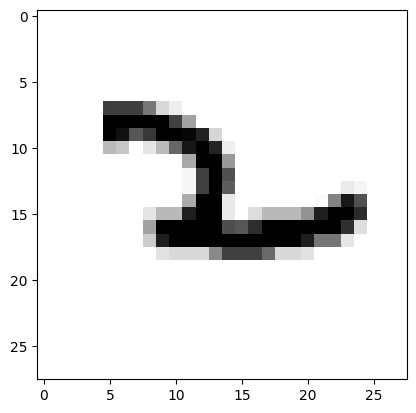

y = 2, predicted=7


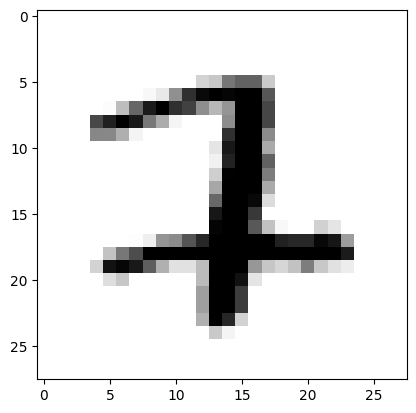

y = 7, predicted=2


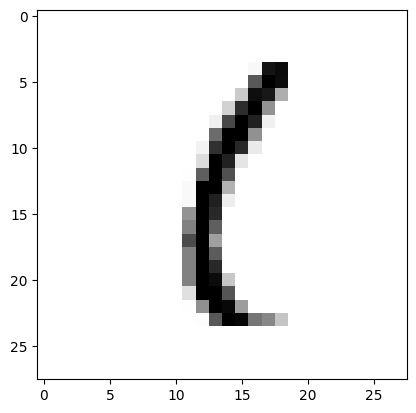

y = 1, predicted=0


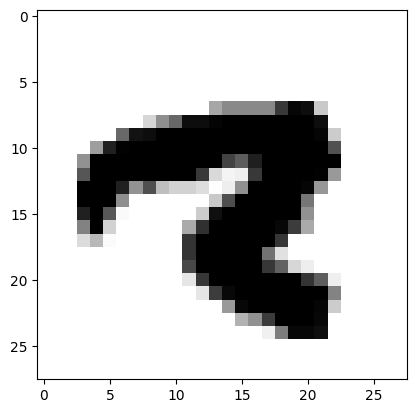

y = 2, predicted=7


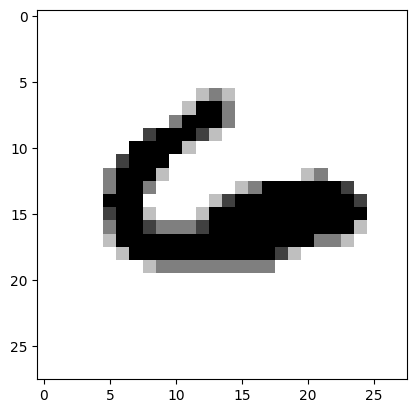

y = 6, predicted=4


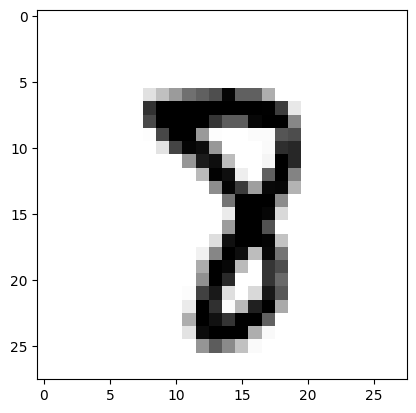

y = 8, predicted=3


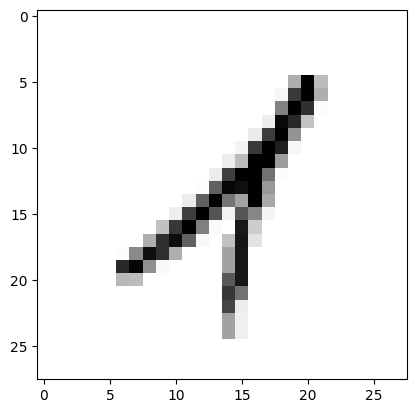

y = 1, predicted=8


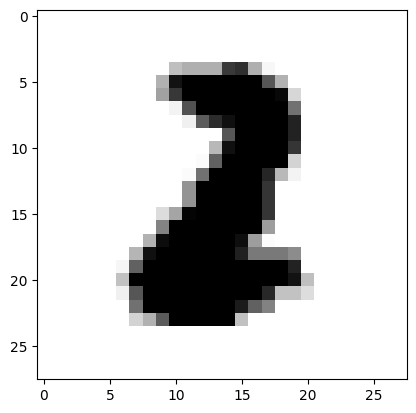

y = 2, predicted=0


y = 9, predicted=4


y = 5, predicted=0


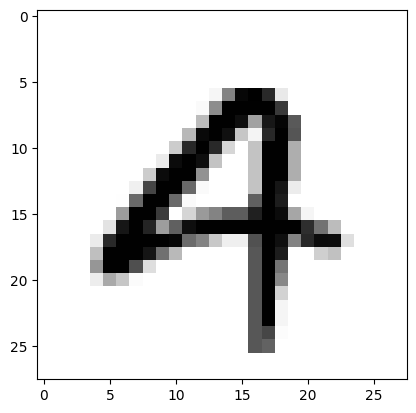

y = 4, predicted=9


y = 3, predicted=8


y = 5, predicted=3


y = 5, predicted=6


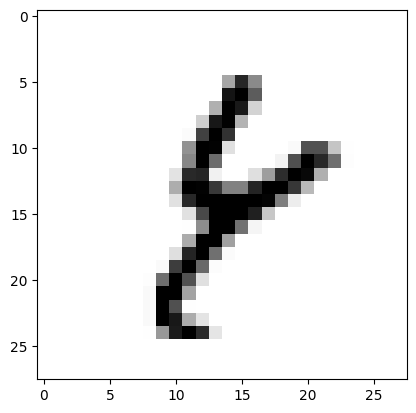

y = 4, predicted=8


y = 7, predicted=9


y = 3, predicted=7


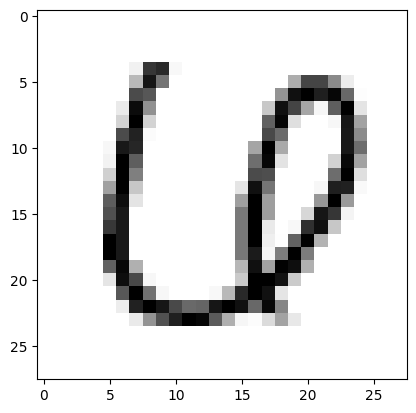

y = 6, predicted=0


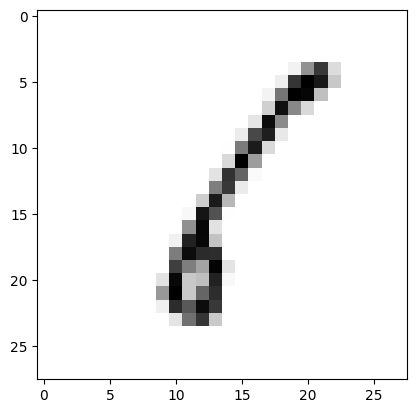

y = 6, predicted=1


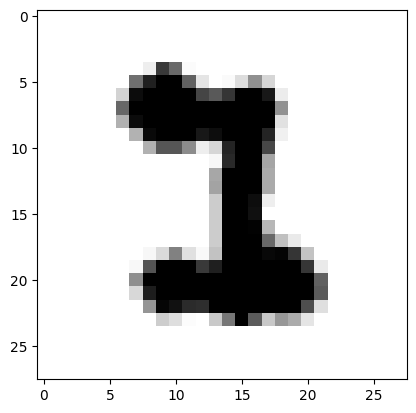

y = 1, predicted=2


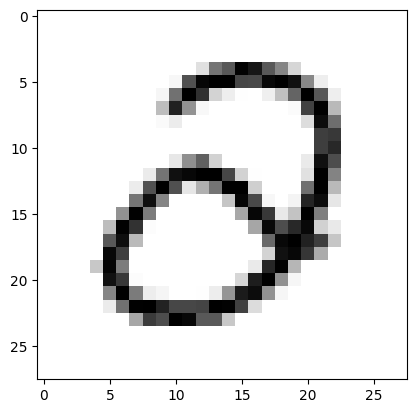

y = 2, predicted=0


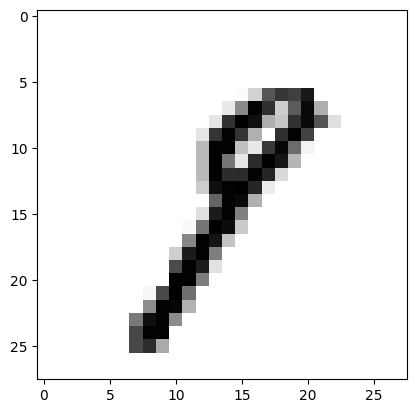

y = 9, predicted=8


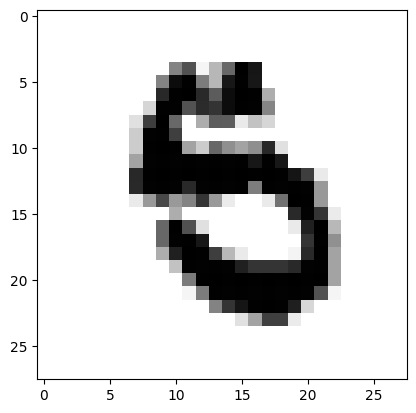

y = 5, predicted=6


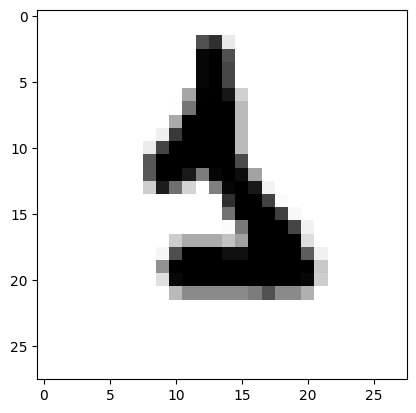

y = 1, predicted=5


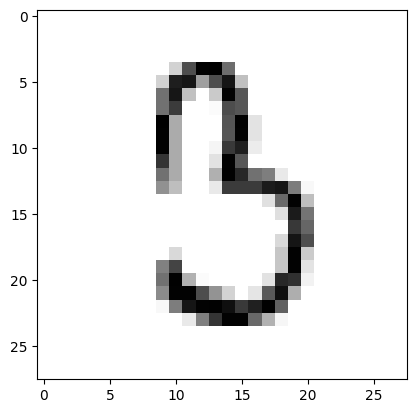

y = 3, predicted=5


y = 3, predicted=2


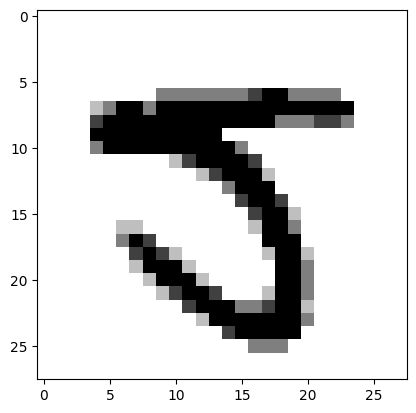

y = 5, predicted=3


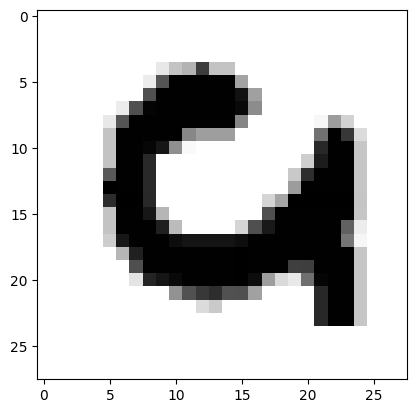

y = 9, predicted=6


y = 1, predicted=0


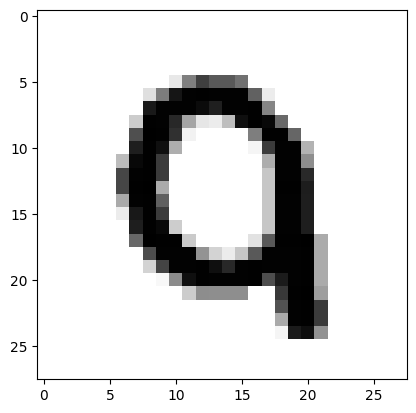

y = 9, predicted=0


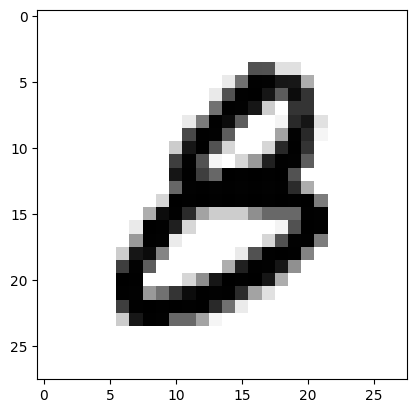

y = 8, predicted=6


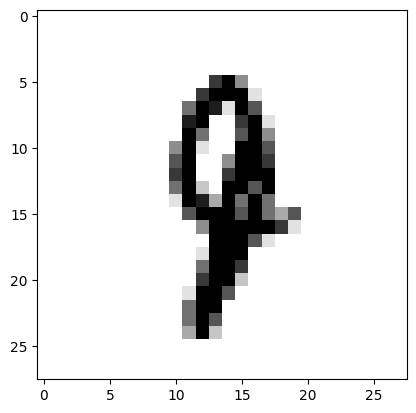

y = 9, predicted=4


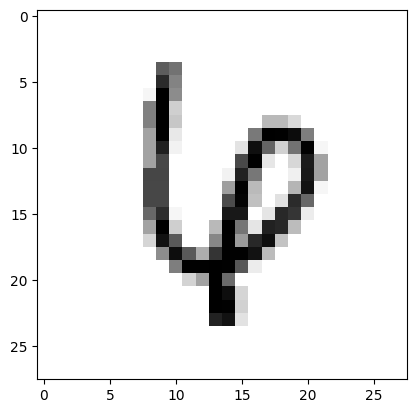

y = 6, predicted=4


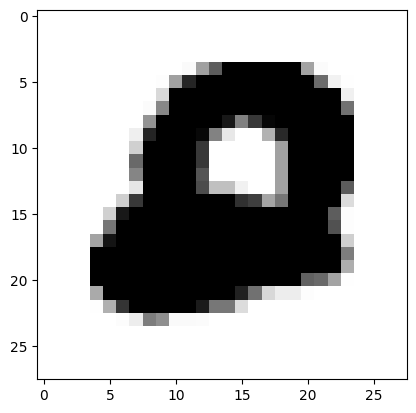

y = 2, predicted=6


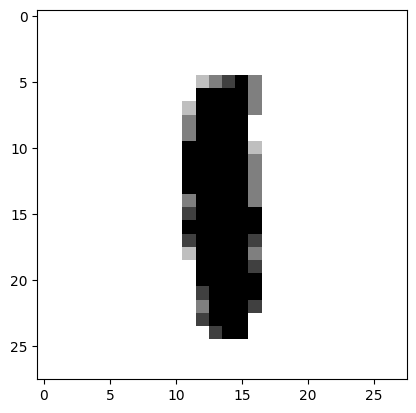

y = 1, predicted=8


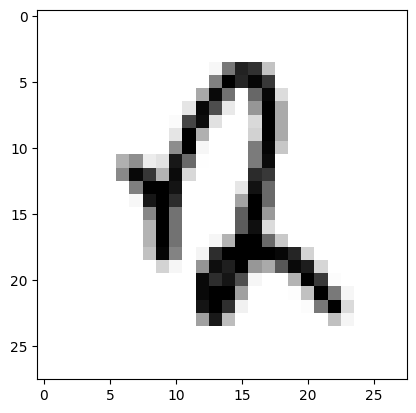

y = 2, predicted=4


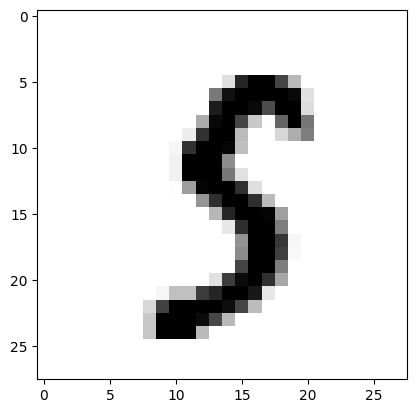

y = 5, predicted=3


y = 5, predicted=3


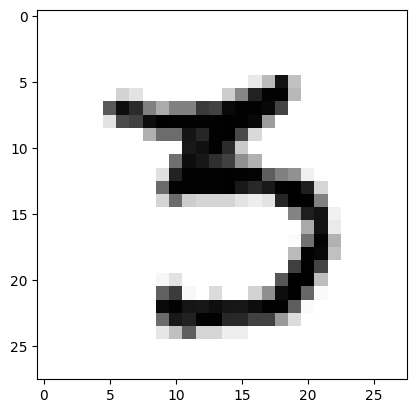

y = 3, predicted=5


y = 3, predicted=2


y = 5, predicted=1


y = 7, predicted=8


y = 2, predicted=8


y = 6, predicted=1


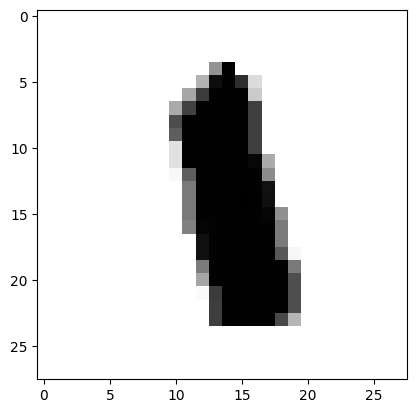

y = 1, predicted=8


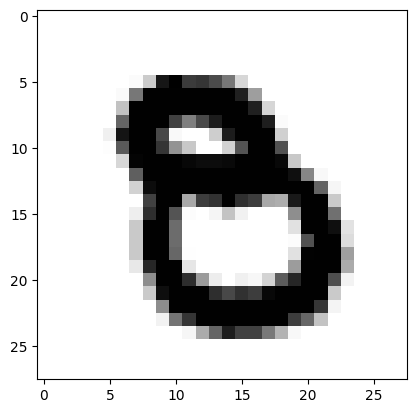

y = 8, predicted=3


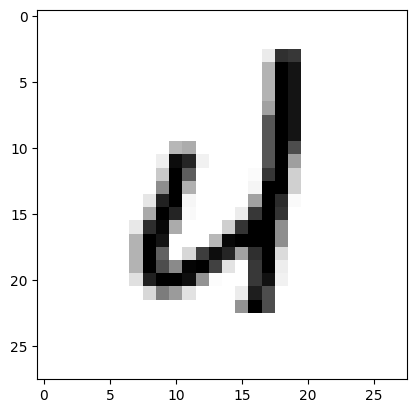

y = 4, predicted=0


y = 5, predicted=3


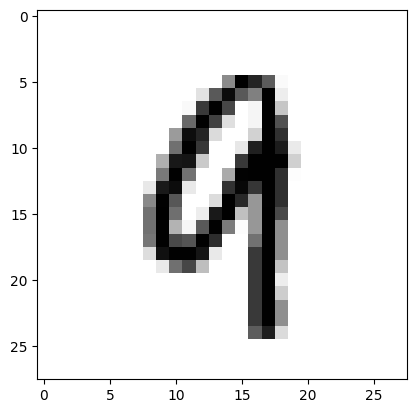

y = 9, predicted=4


y = 8, predicted=6


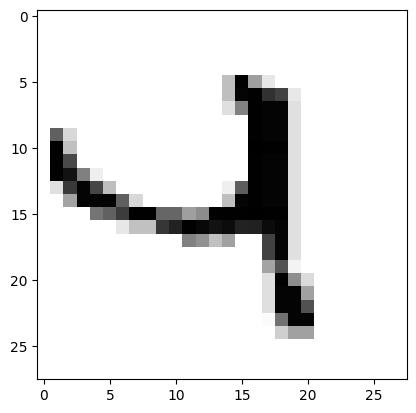

y = 4, predicted=9


y = 9, predicted=4


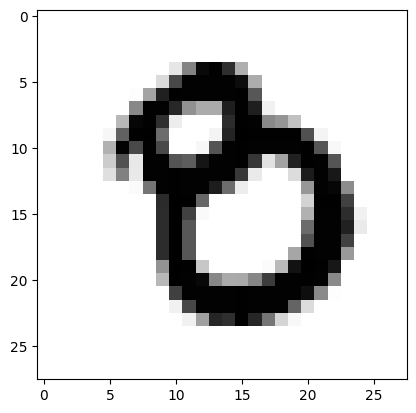

y = 8, predicted=0


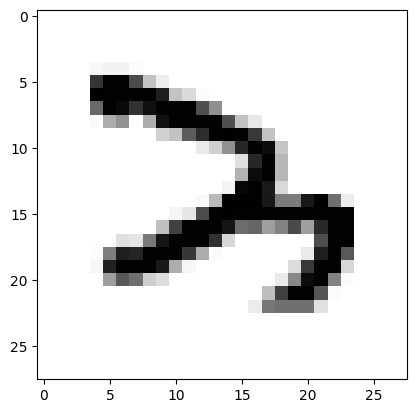

y = 3, predicted=2


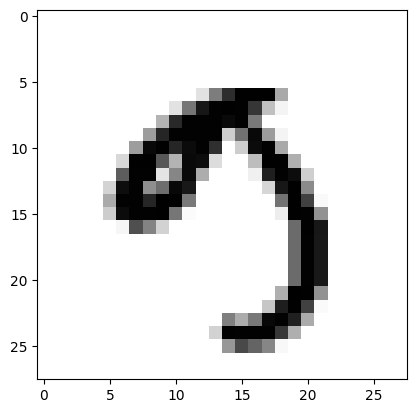

y = 9, predicted=0


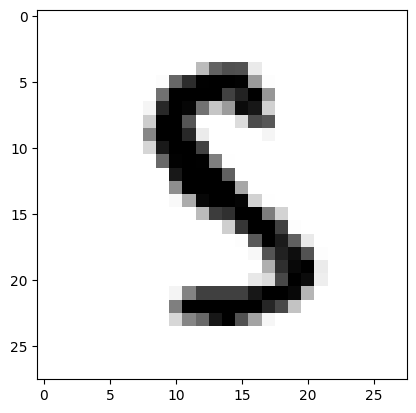

y = 5, predicted=9


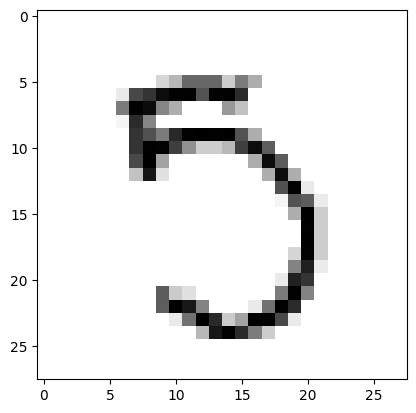

y = 5, predicted=3


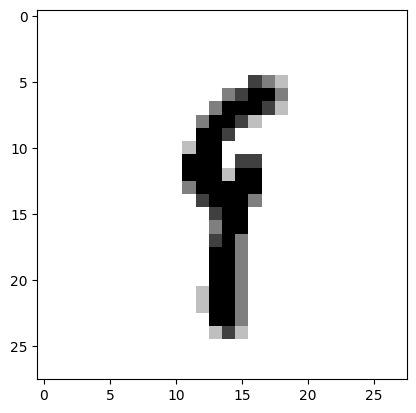

y = 9, predicted=0


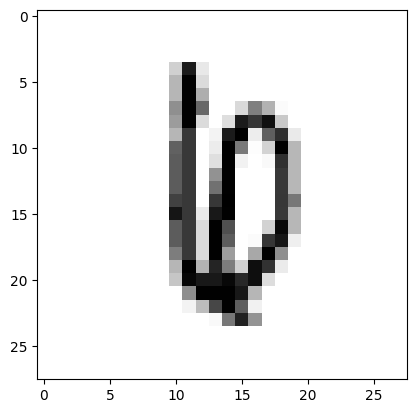

y = 6, predicted=0


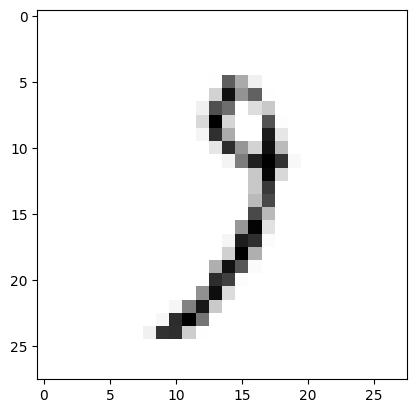

y = 9, predicted=7


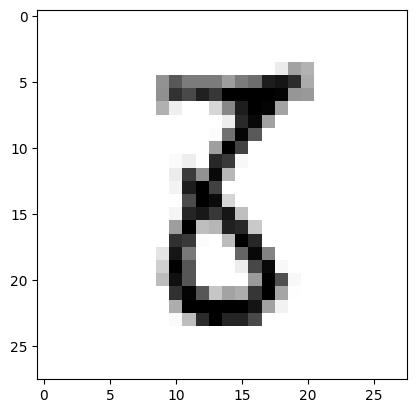

y = 8, predicted=6


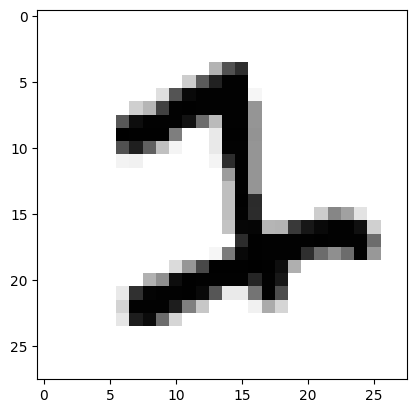

y = 1, predicted=2


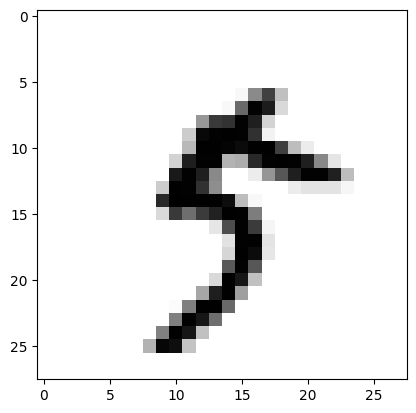

y = 5, predicted=0


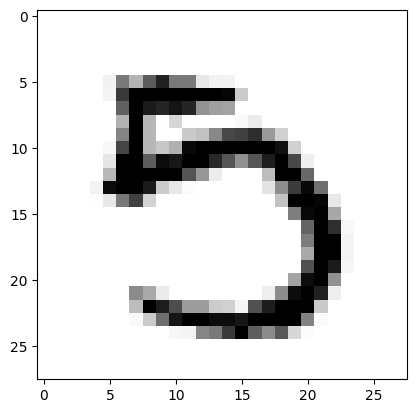

y = 5, predicted=3


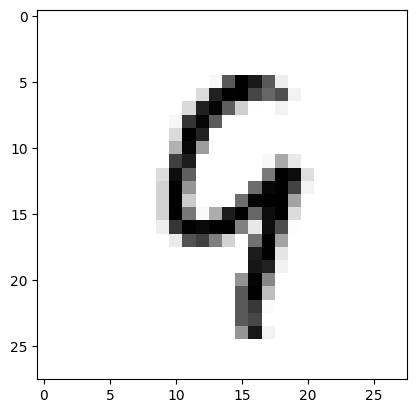

y = 9, predicted=4


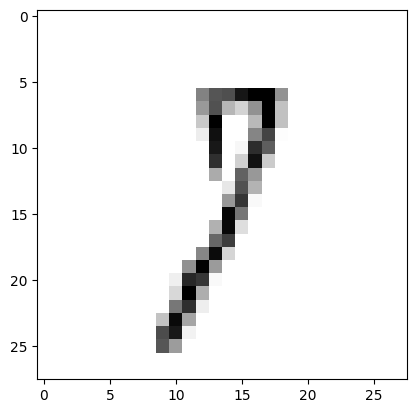

y = 7, predicted=9


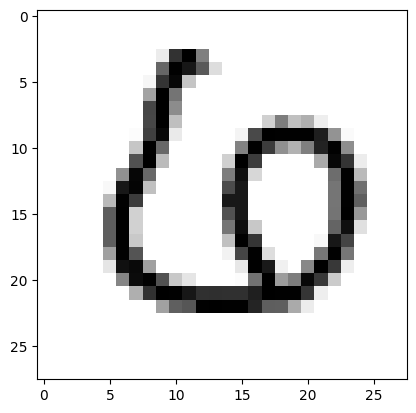

y = 6, predicted=0


y = 4, predicted=9


y = 8, predicted=3


y = 7, predicted=4


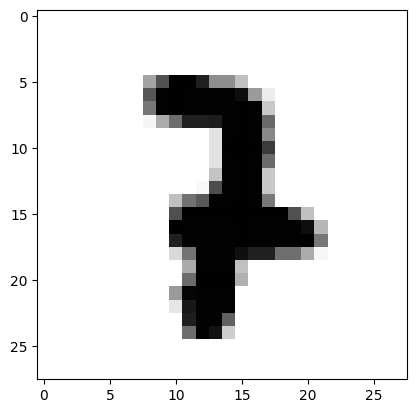

y = 7, predicted=3


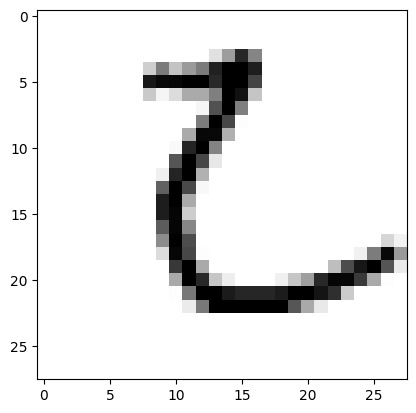

y = 2, predicted=6


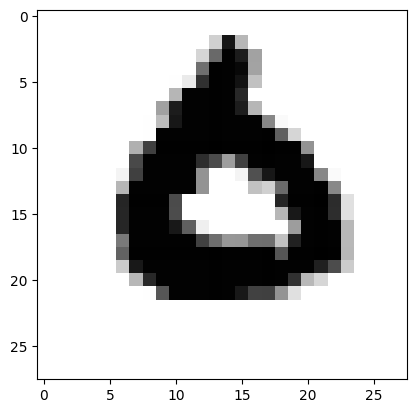

y = 6, predicted=0


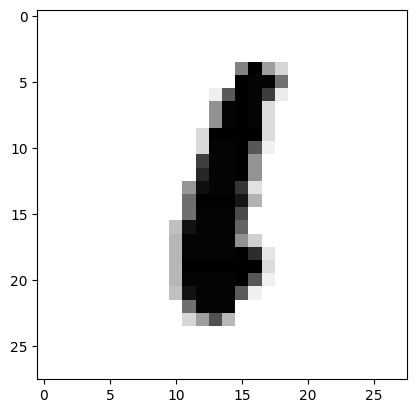

y = 1, predicted=0


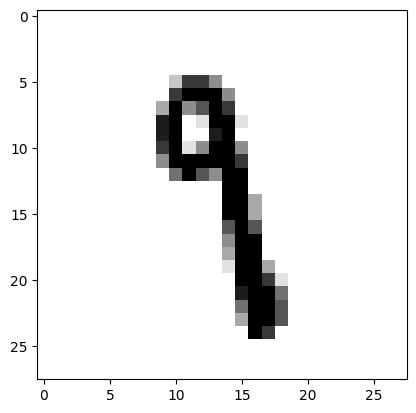

y = 9, predicted=1


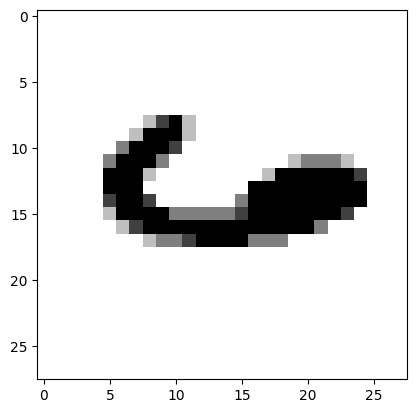

y = 6, predicted=4


y = 7, predicted=3


y = 4, predicted=8


y = 3, predicted=2


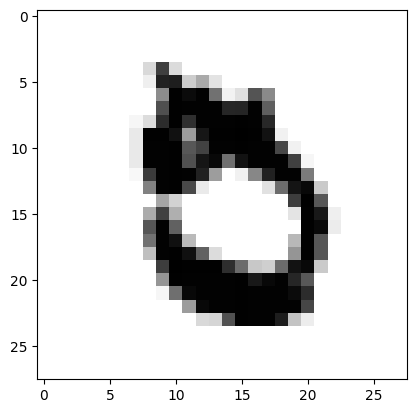

y = 5, predicted=0


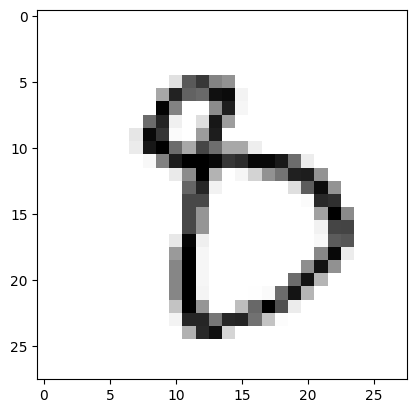

y = 8, predicted=0


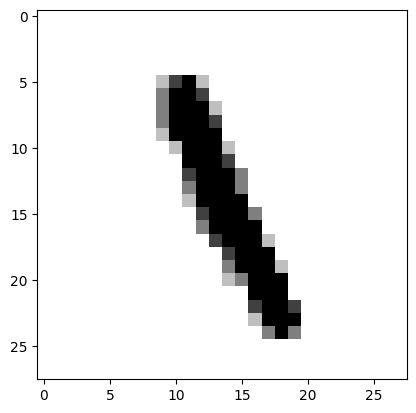

y = 1, predicted=8


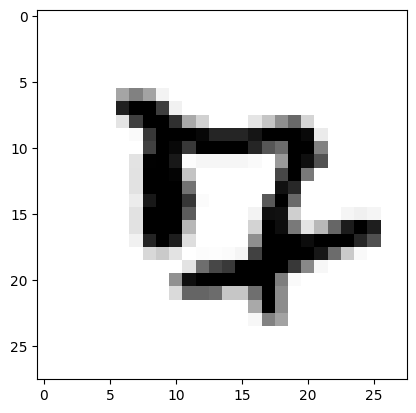

y = 7, predicted=9


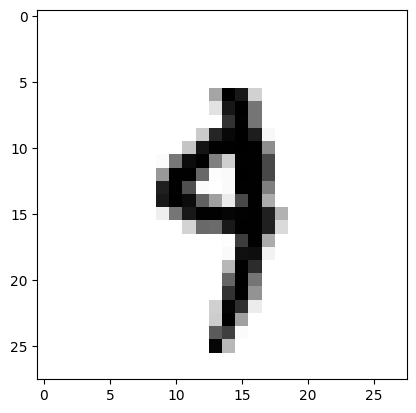

y = 4, predicted=9


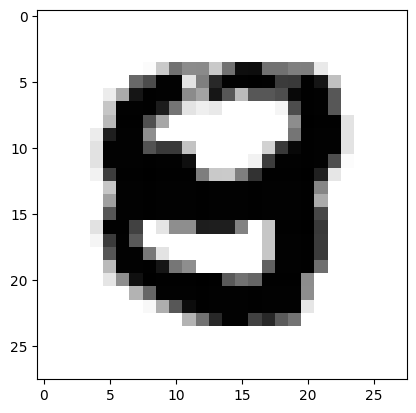

y = 8, predicted=9


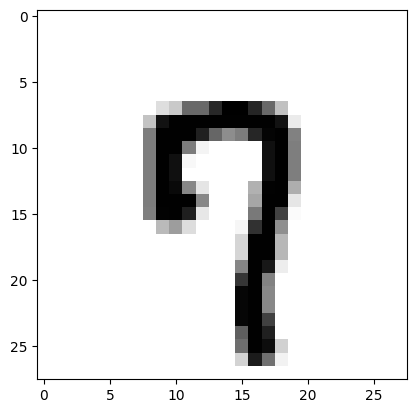

y = 7, predicted=9


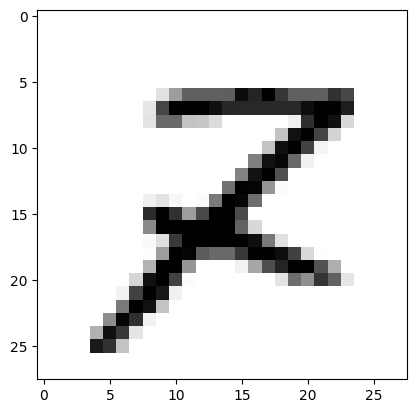

y = 7, predicted=9


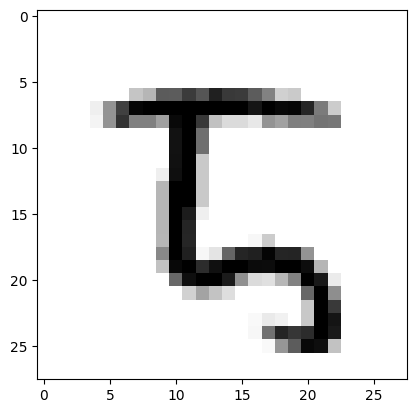

y = 5, predicted=2


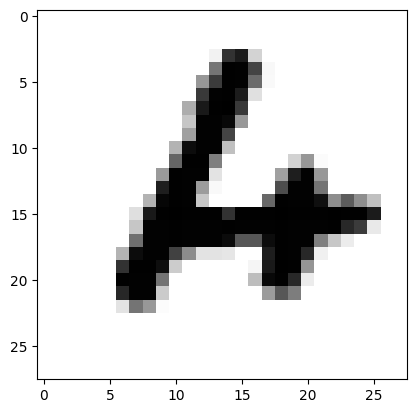

y = 4, predicted=6


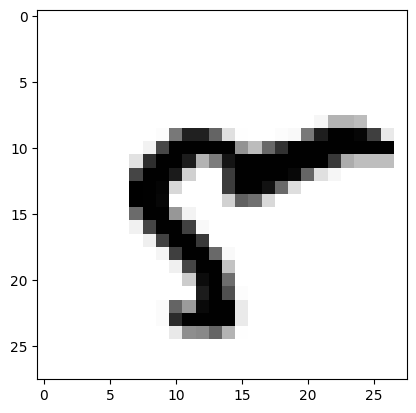

y = 5, predicted=8


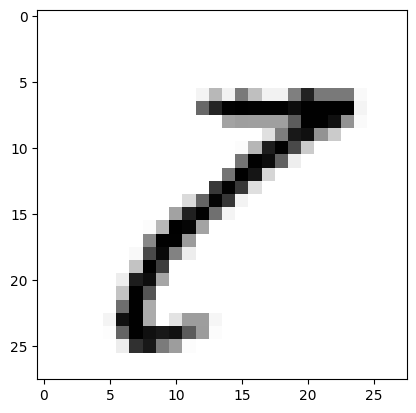

y = 7, predicted=8


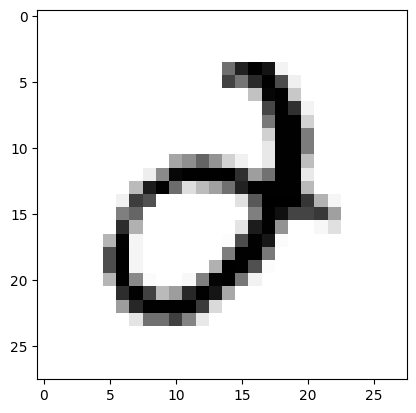

y = 2, predicted=3


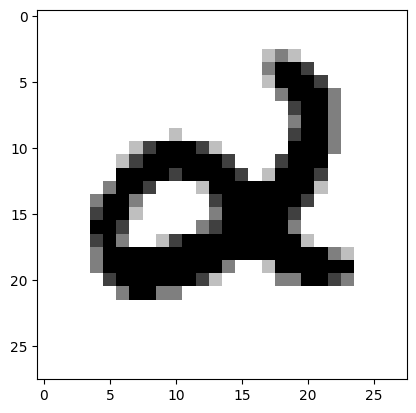

y = 2, predicted=1


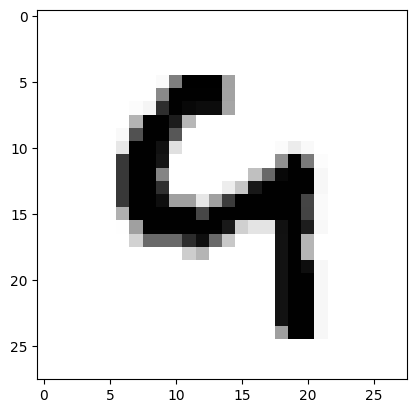

y = 9, predicted=4


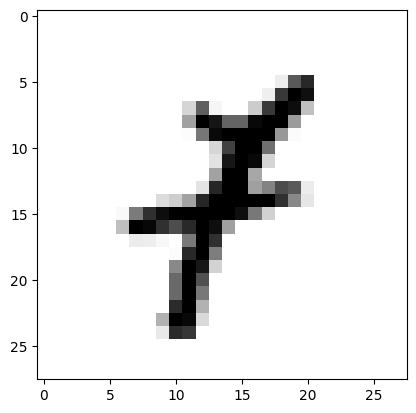

y = 7, predicted=8


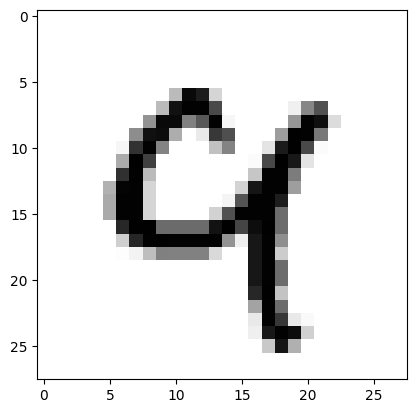

y = 9, predicted=4


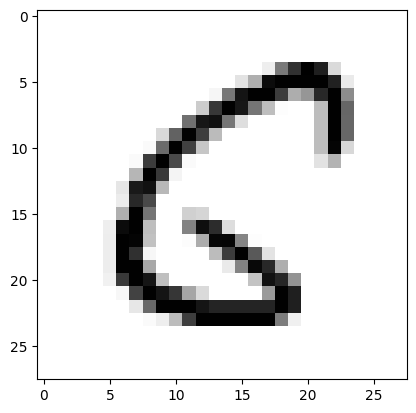

y = 6, predicted=0


y = 5, predicted=0


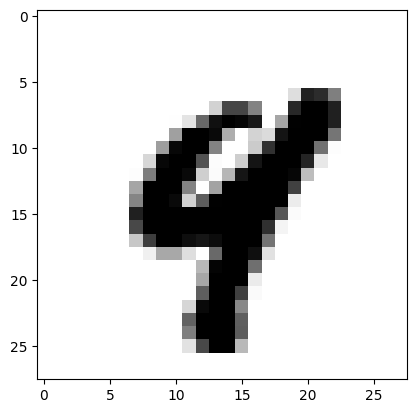

y = 9, predicted=4


y = 8, predicted=3


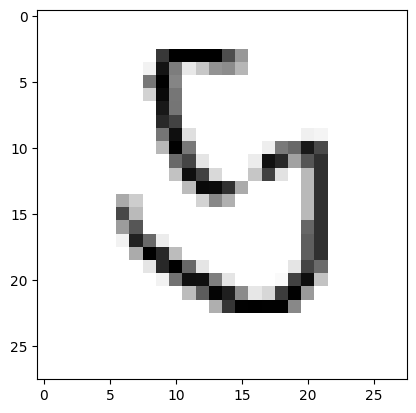

y = 5, predicted=6


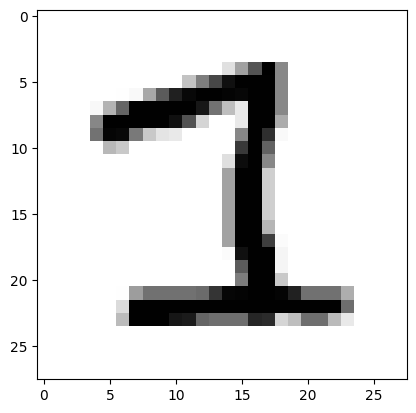

y = 1, predicted=3


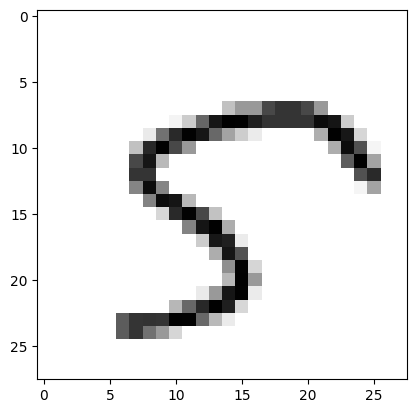

y = 5, predicted=0


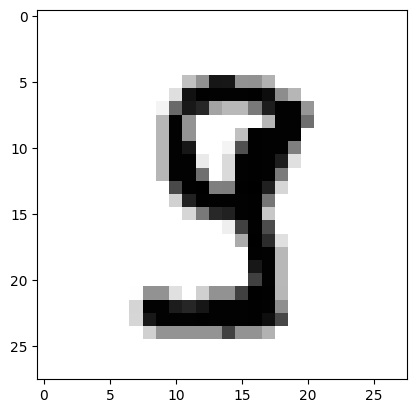

y = 9, predicted=8


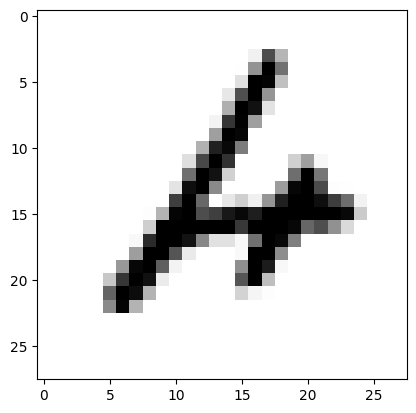

y = 4, predicted=6


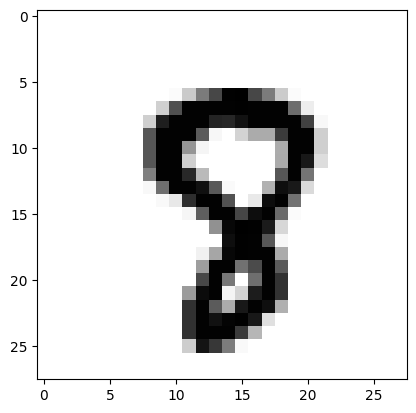

y = 8, predicted=3


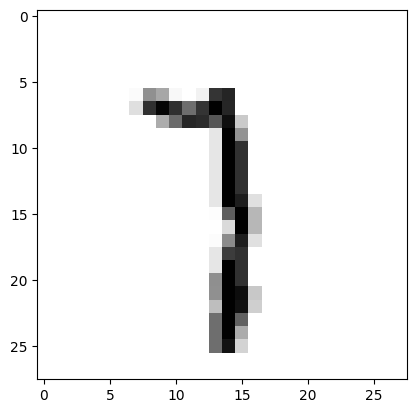

y = 7, predicted=1


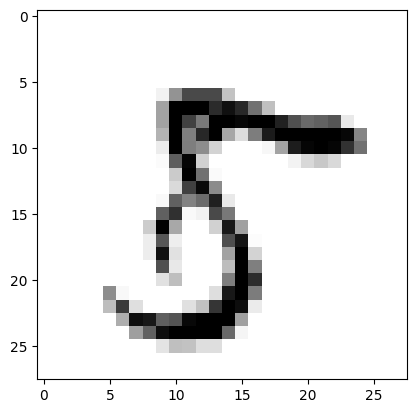

y = 5, predicted=0


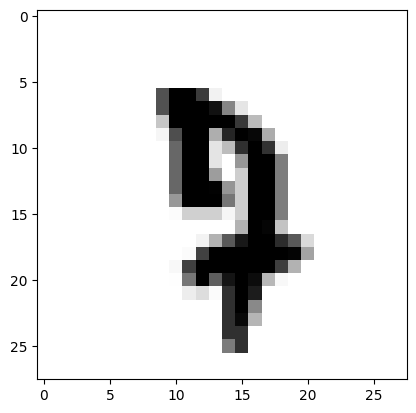

y = 7, predicted=9


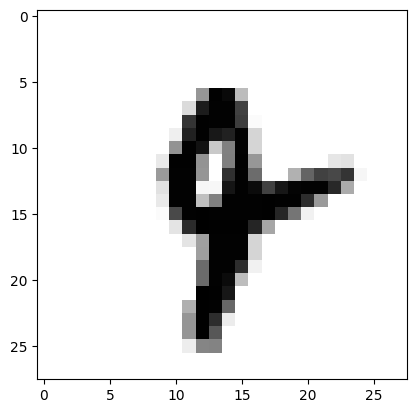

y = 4, predicted=8


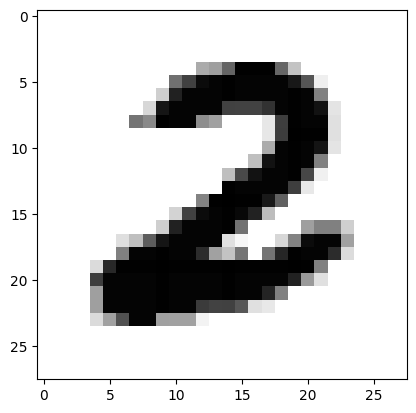

y = 2, predicted=6


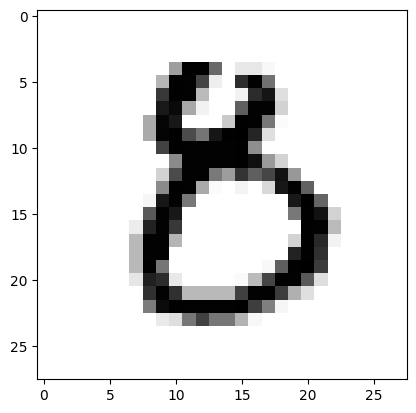

y = 8, predicted=0


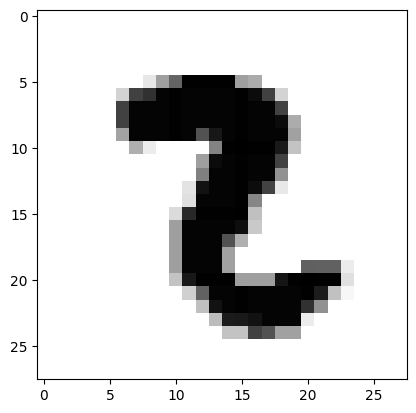

y = 2, predicted=0


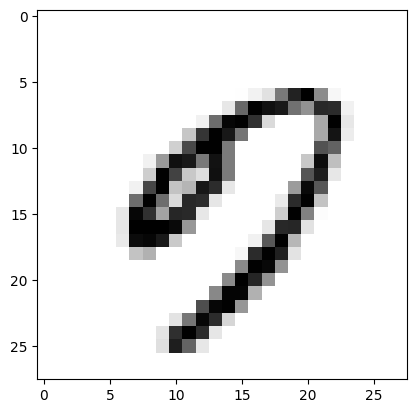

y = 9, predicted=0


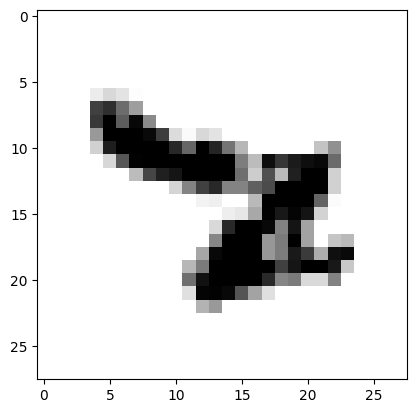

y = 2, predicted=7


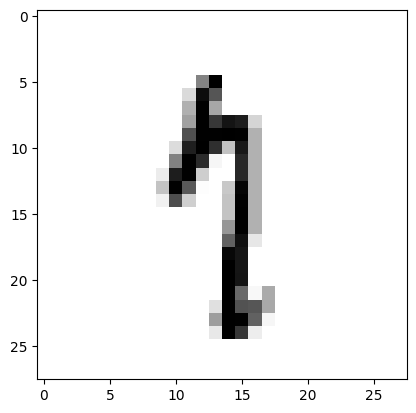

y = 1, predicted=0


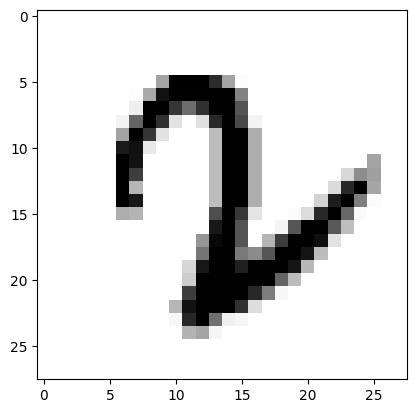

y = 2, predicted=0


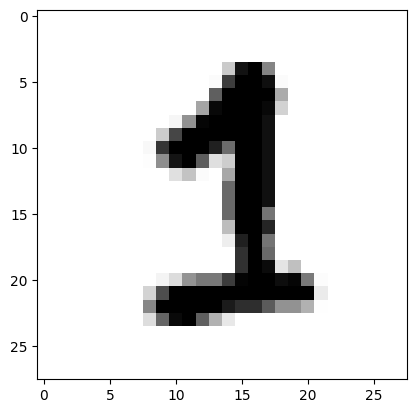

y = 1, predicted=2


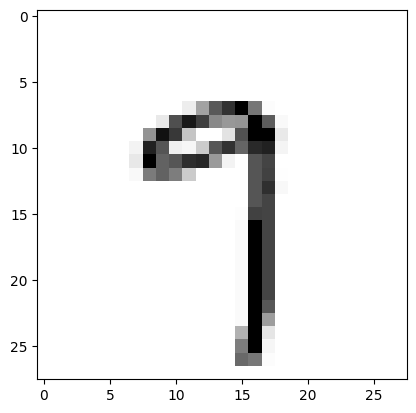

y = 9, predicted=7


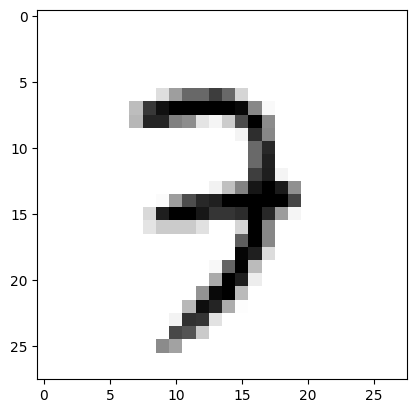

y = 7, predicted=3


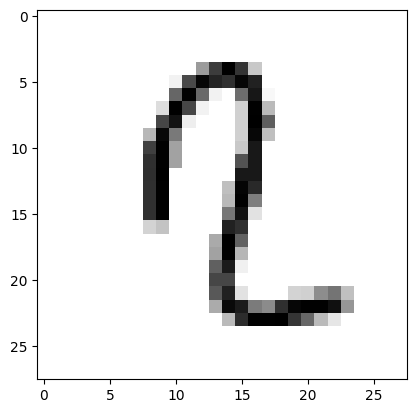

y = 2, predicted=1


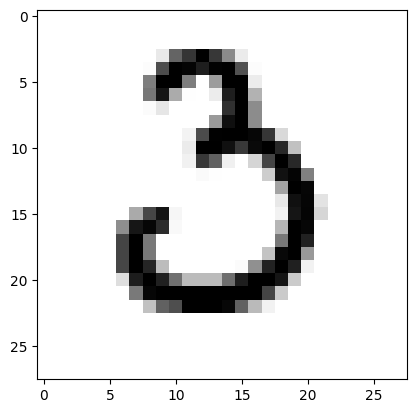

y = 3, predicted=2


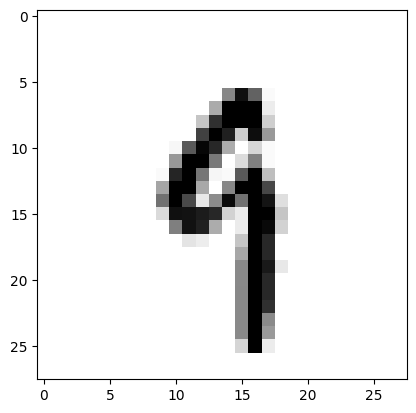

y = 9, predicted=4


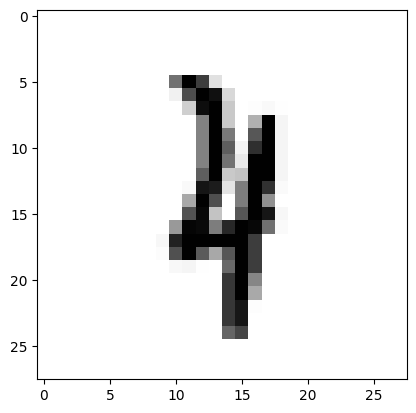

y = 4, predicted=7


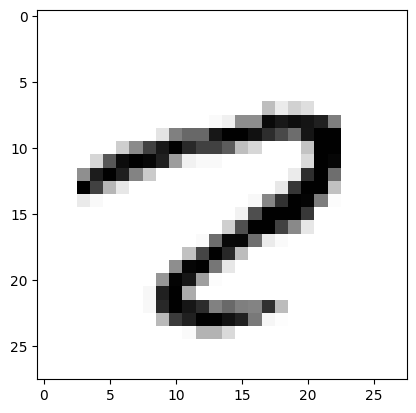

y = 2, predicted=1


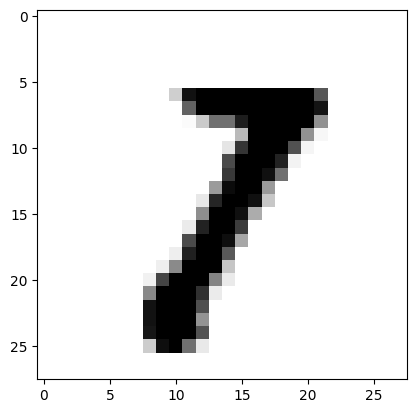

y = 7, predicted=1


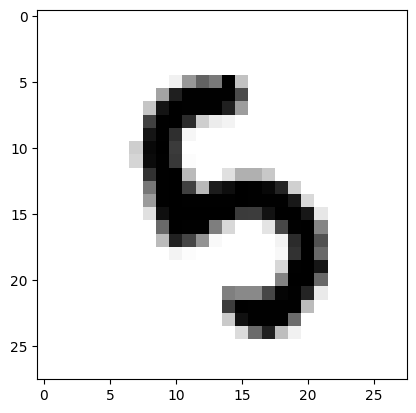

y = 5, predicted=6


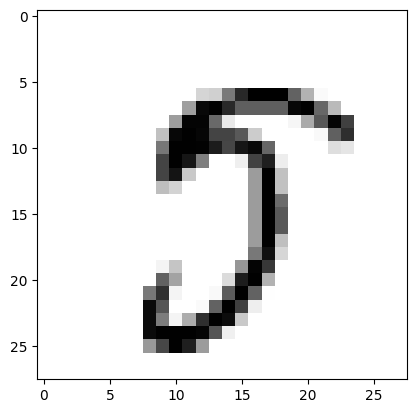

y = 5, predicted=7


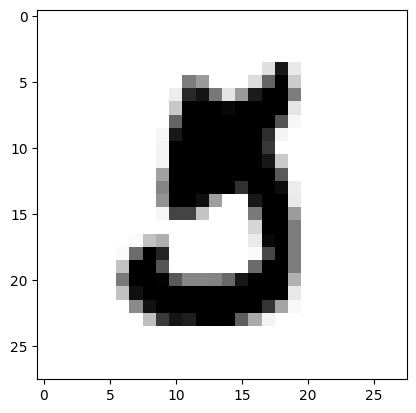

y = 5, predicted=0


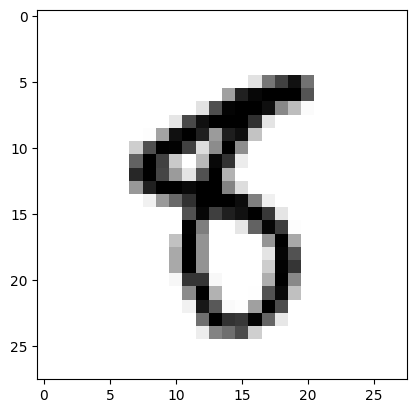

y = 8, predicted=6


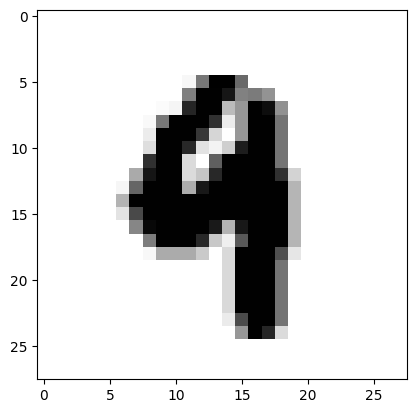

y = 9, predicted=4


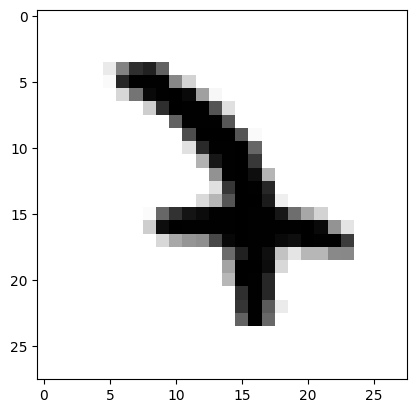

y = 7, predicted=9


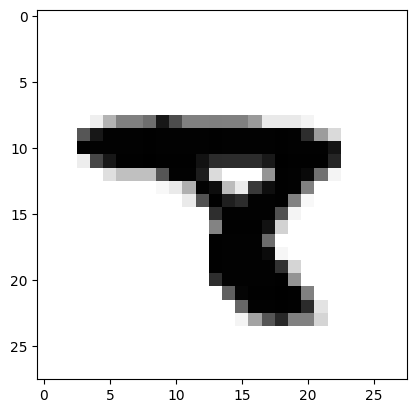

y = 8, predicted=7


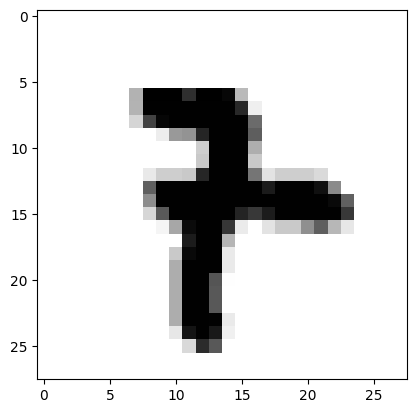

y = 7, predicted=8


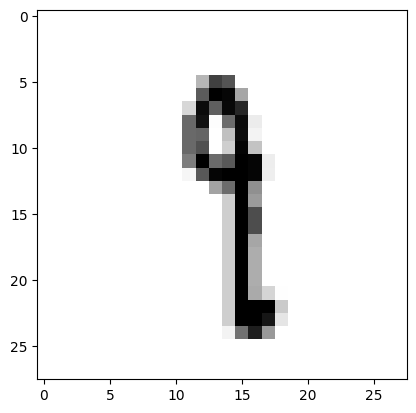

y = 9, predicted=1


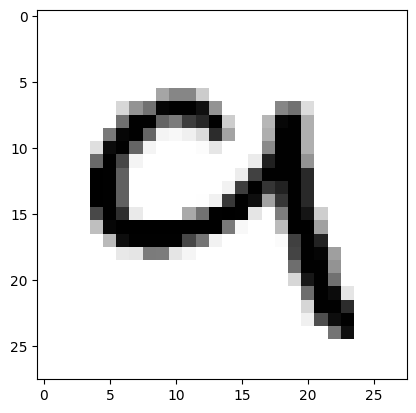

y = 9, predicted=4


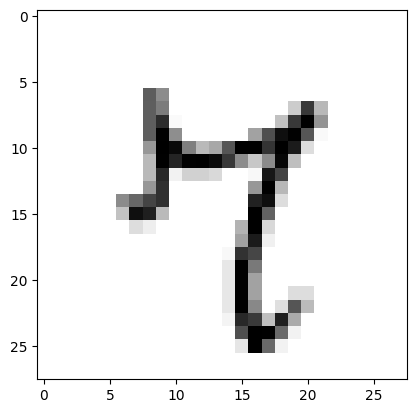

y = 7, predicted=4


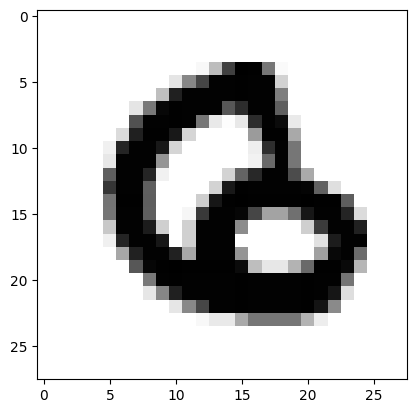

y = 6, predicted=0


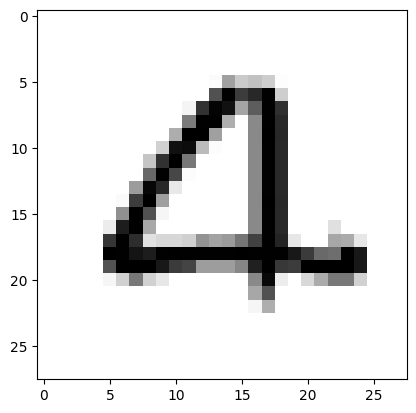

y = 4, predicted=0


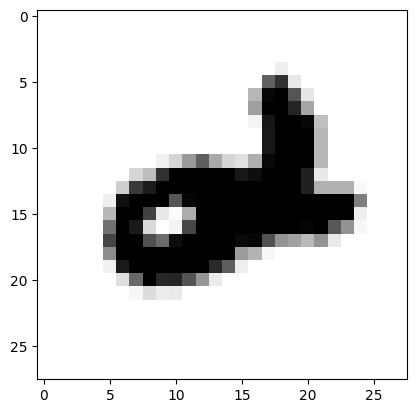

y = 2, predicted=0


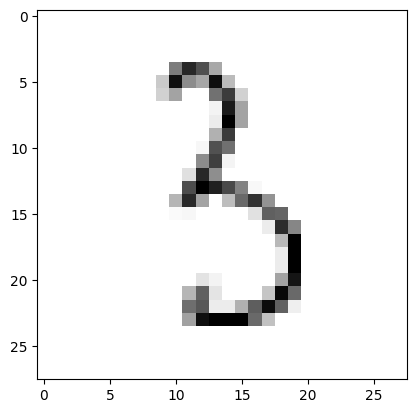

y = 3, predicted=5


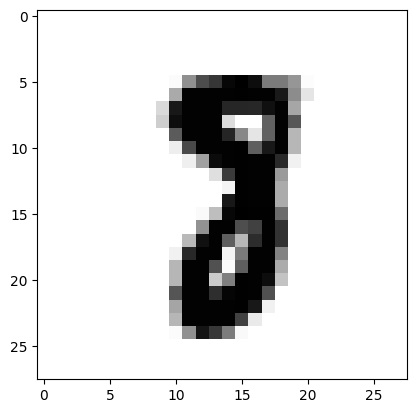

y = 8, predicted=9


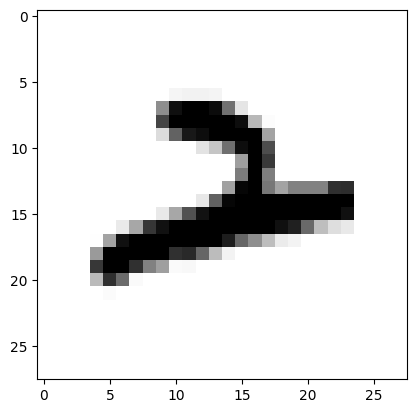

y = 2, predicted=7


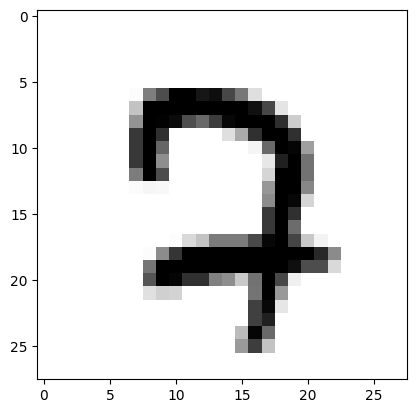

y = 7, predicted=2


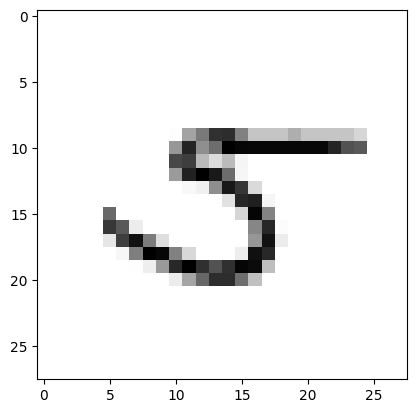

y = 5, predicted=3


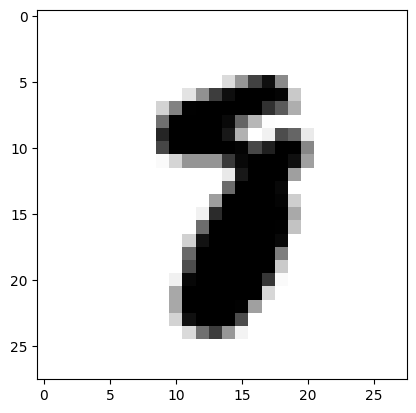

y = 8, predicted=3


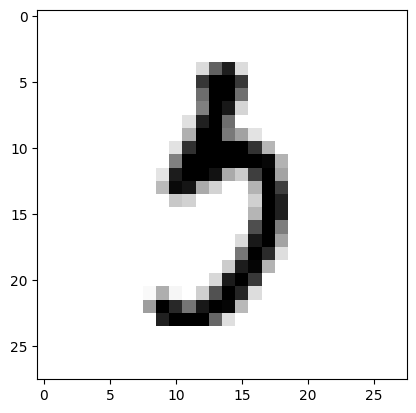

y = 3, predicted=5


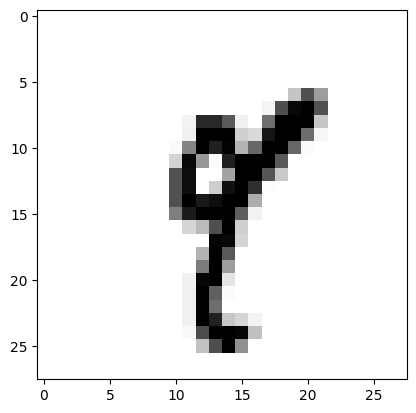

y = 9, predicted=4


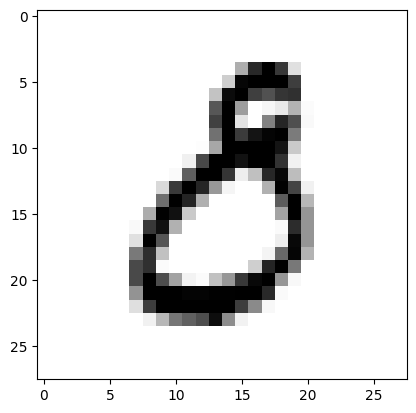

y = 8, predicted=0


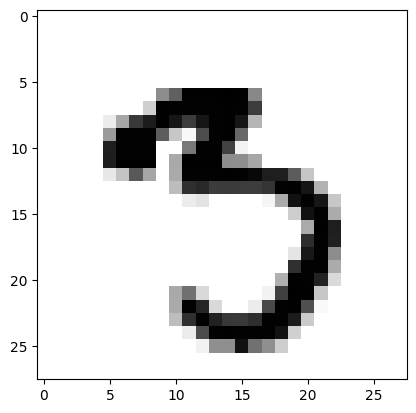

y = 3, predicted=5


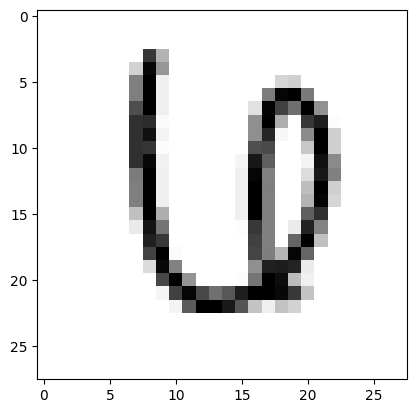

y = 6, predicted=0


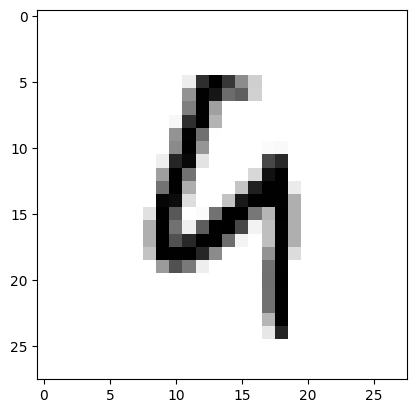

y = 9, predicted=6


y = 5, predicted=6


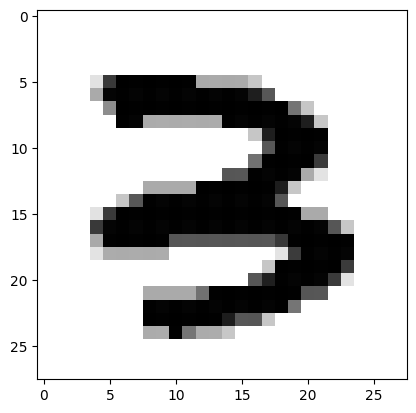

y = 3, predicted=2


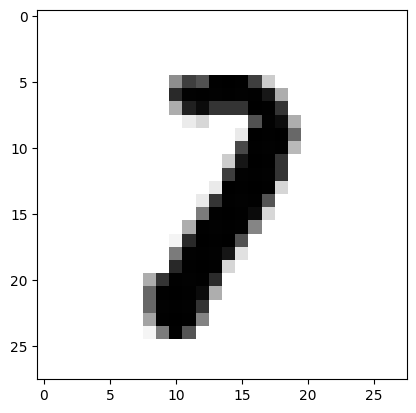

y = 7, predicted=1


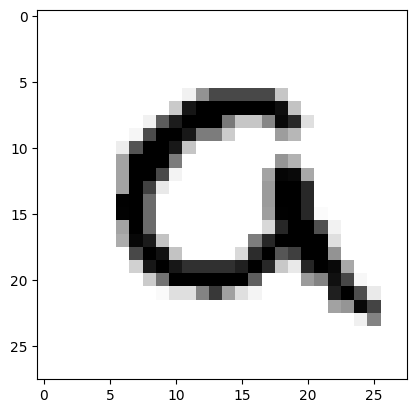

y = 9, predicted=0


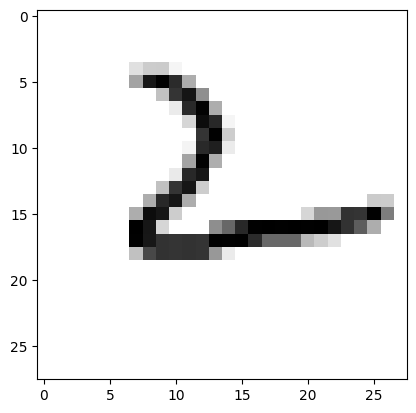

y = 2, predicted=4


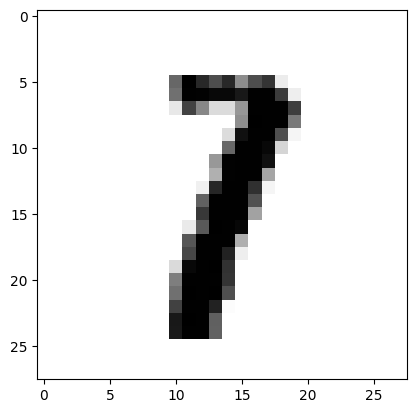

y = 7, predicted=1


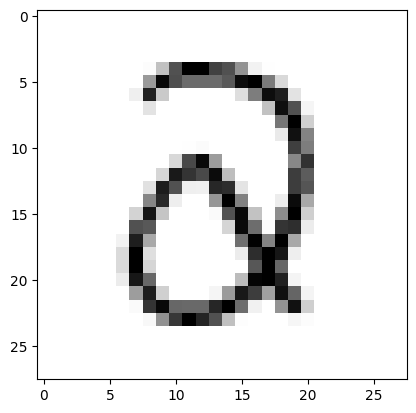

y = 2, predicted=0


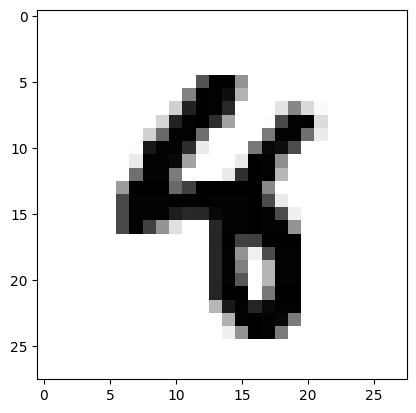

y = 8, predicted=4


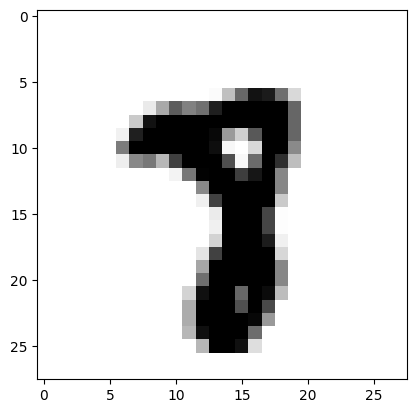

y = 8, predicted=3


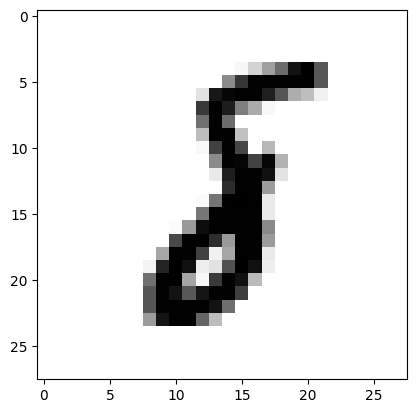

y = 8, predicted=2


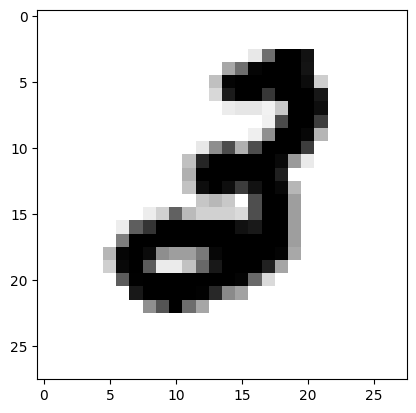

y = 3, predicted=6


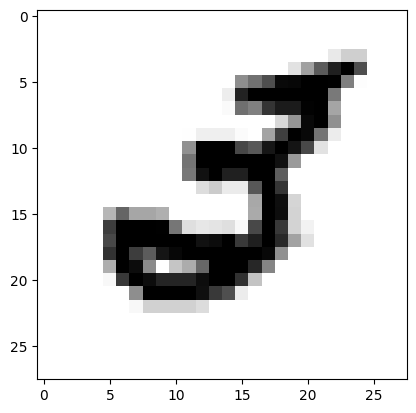

y = 3, predicted=5


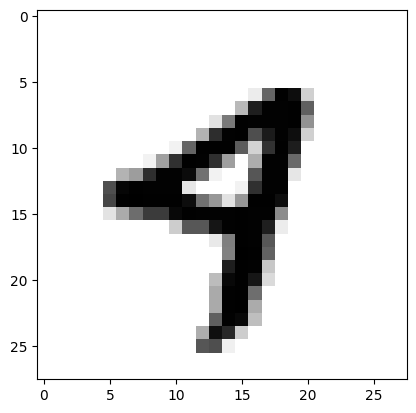

y = 4, predicted=9


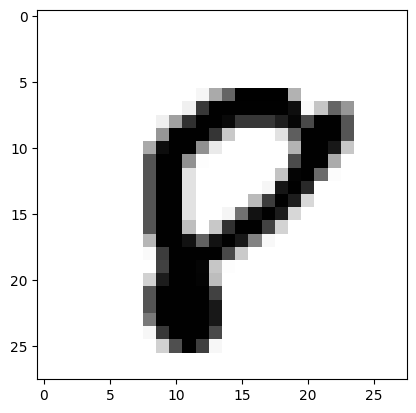

y = 8, predicted=0


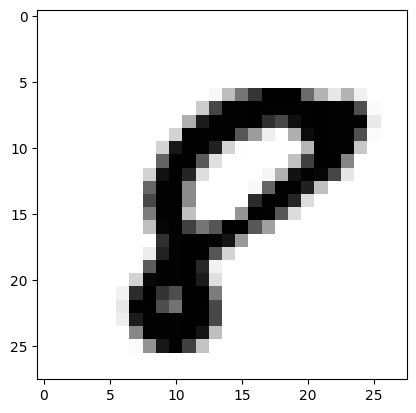

y = 8, predicted=0


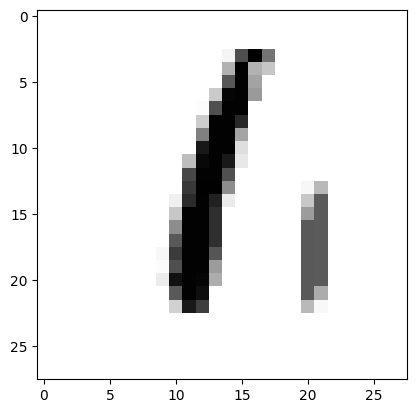

y = 1, predicted=0


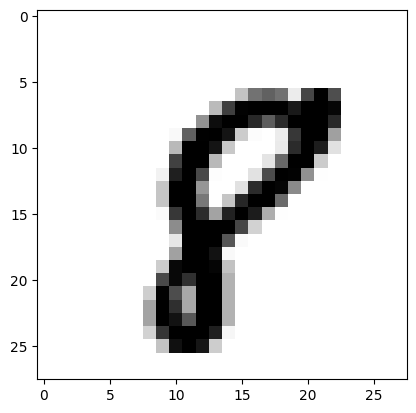

y = 8, predicted=4


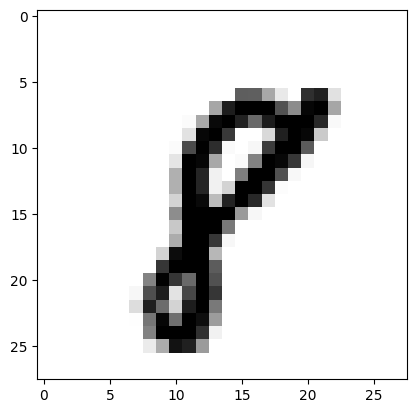

y = 8, predicted=4


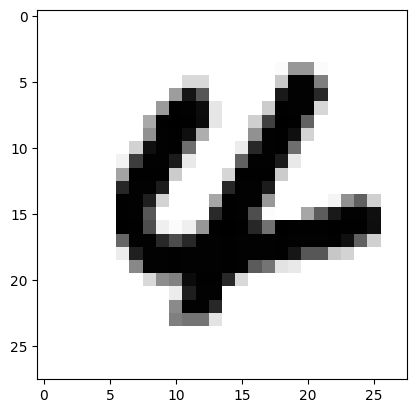

y = 4, predicted=6


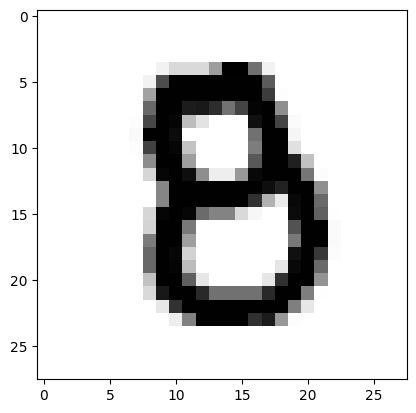

y = 8, predicted=0


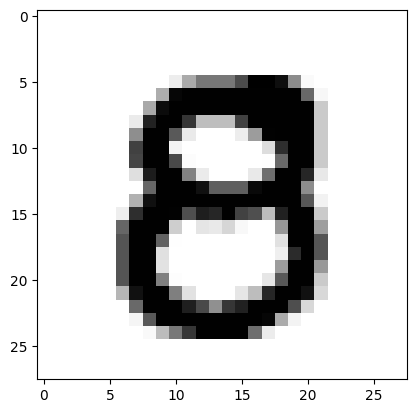

y = 8, predicted=0


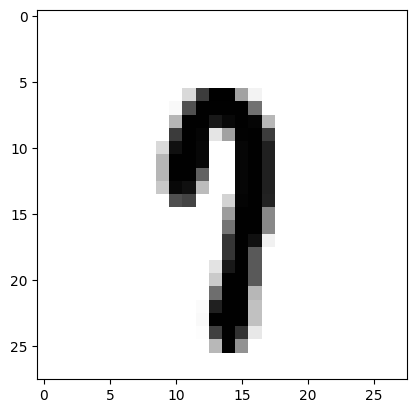

y = 7, predicted=9


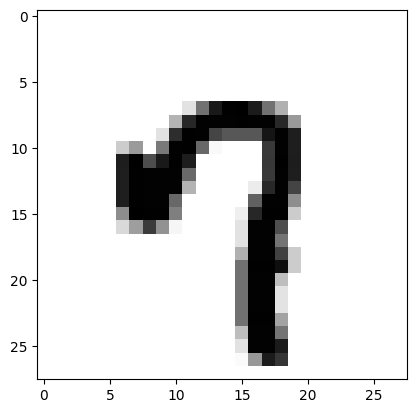

y = 7, predicted=9


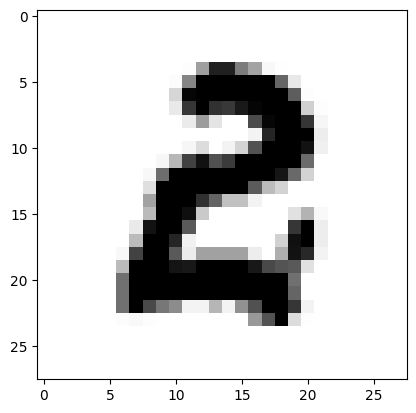

y = 2, predicted=6


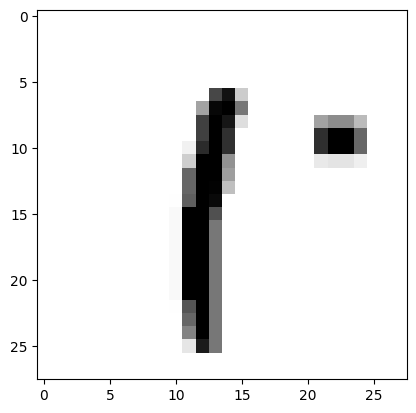

y = 1, predicted=0


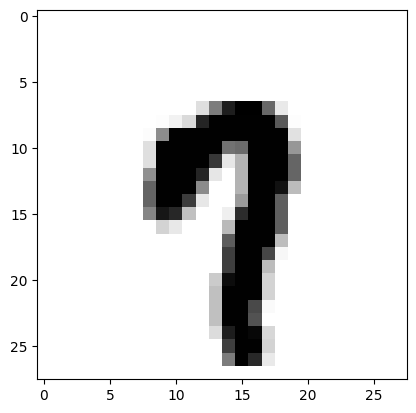

y = 7, predicted=9


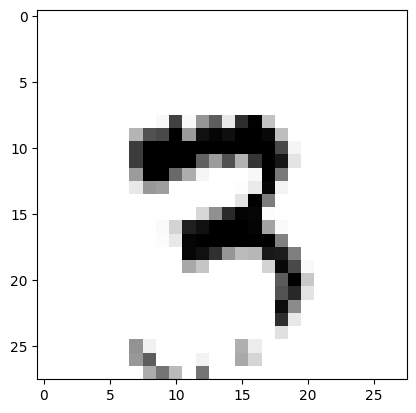

y = 3, predicted=7


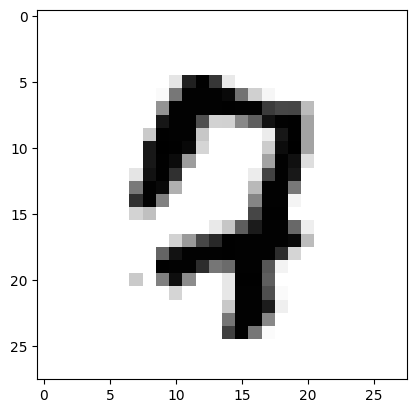

y = 7, predicted=9


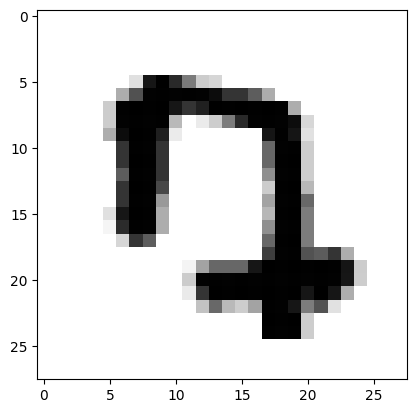

y = 7, predicted=9


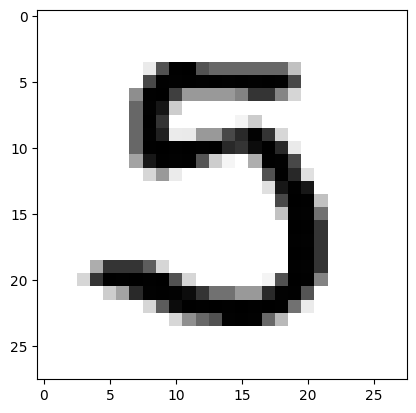

y = 5, predicted=3


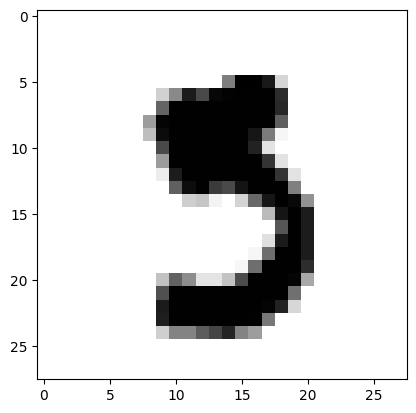

y = 5, predicted=3


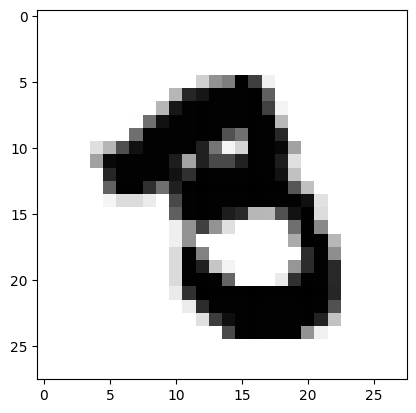

y = 3, predicted=8


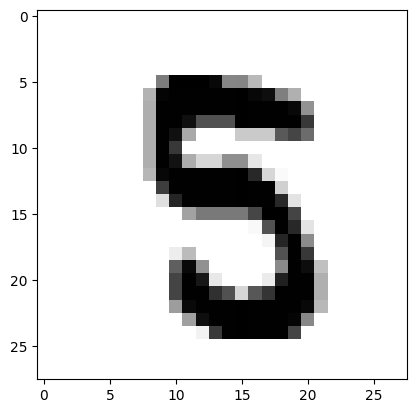

y = 5, predicted=3


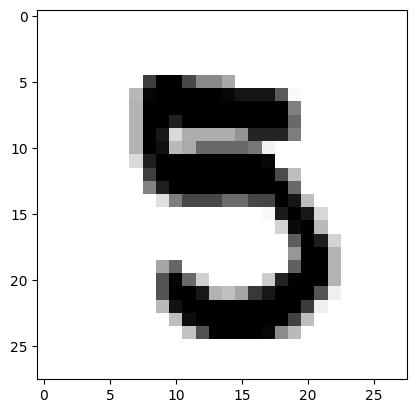

y = 5, predicted=3


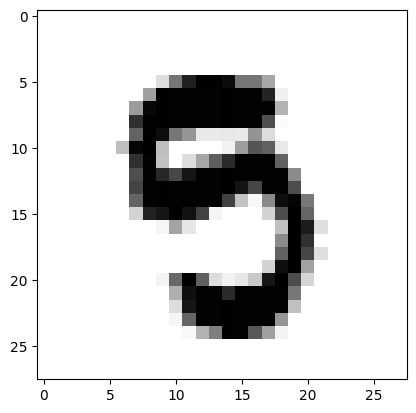

y = 5, predicted=3


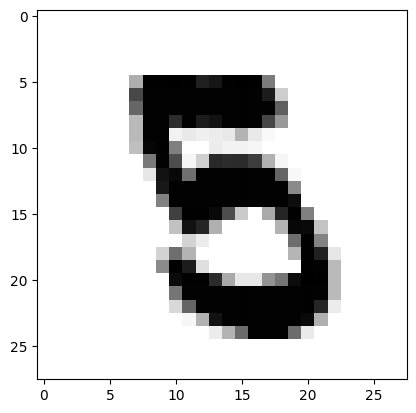

y = 5, predicted=3


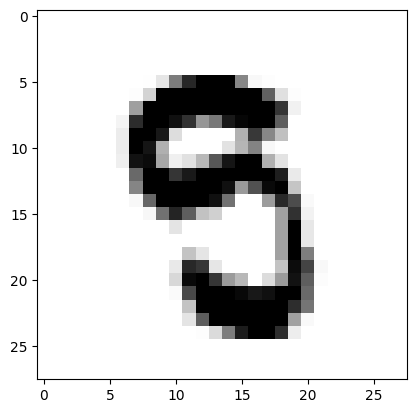

y = 5, predicted=3


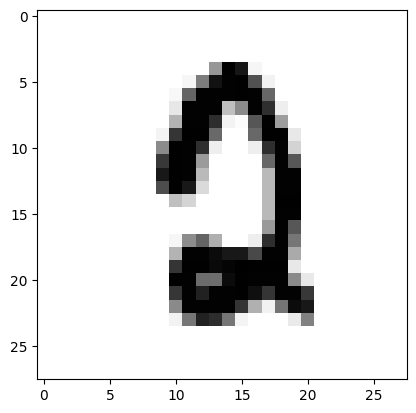

y = 2, predicted=0


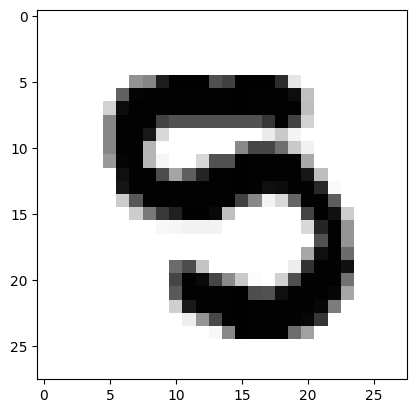

y = 5, predicted=3


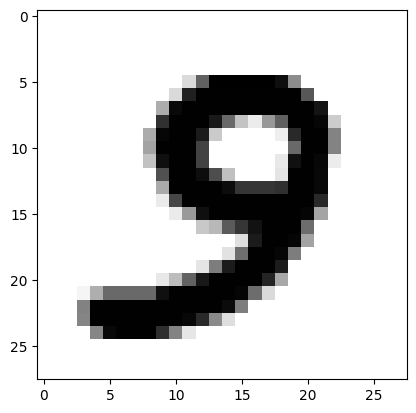

y = 9, predicted=3


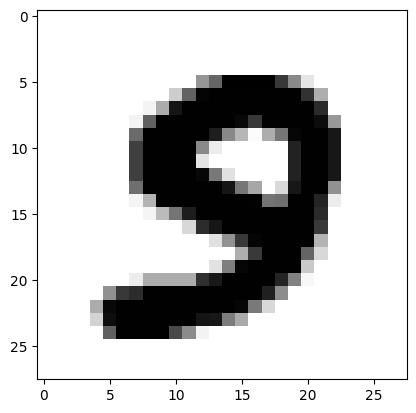

y = 9, predicted=3


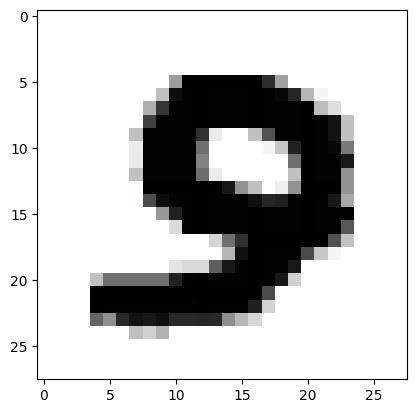

y = 9, predicted=3


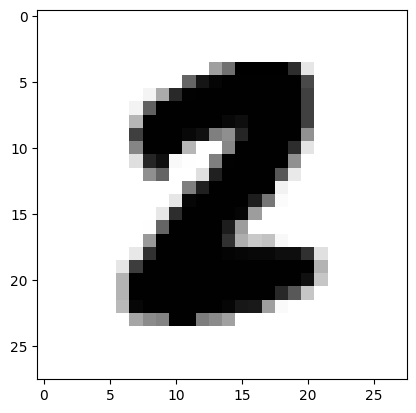

y = 2, predicted=8


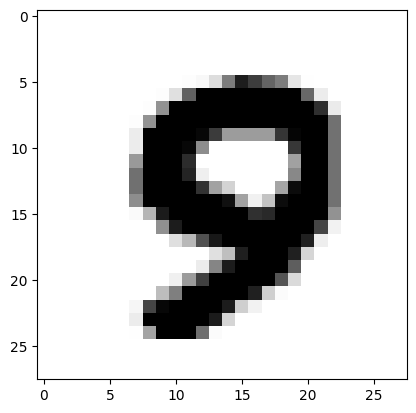

y = 9, predicted=3


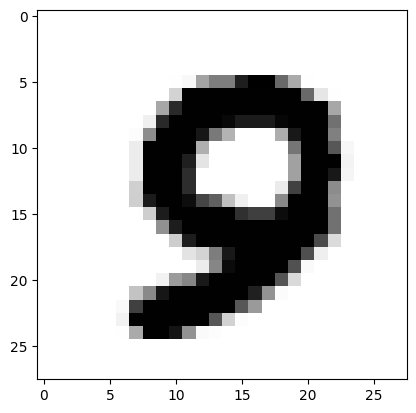

y = 9, predicted=5


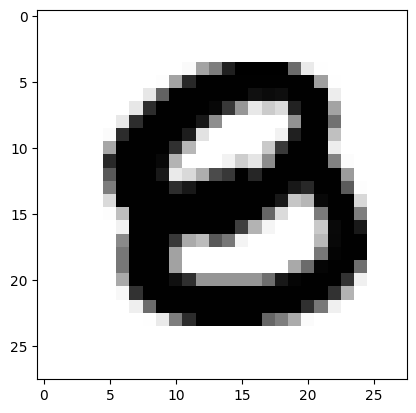

y = 8, predicted=0


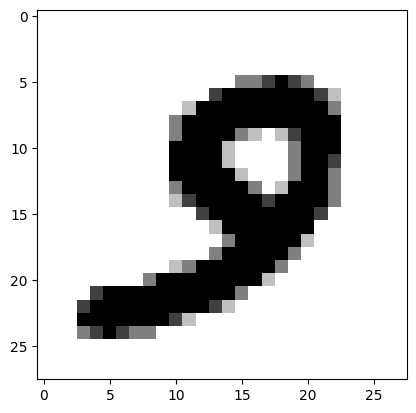

y = 9, predicted=3


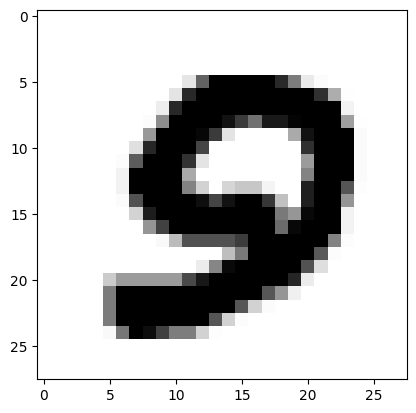

y = 9, predicted=0


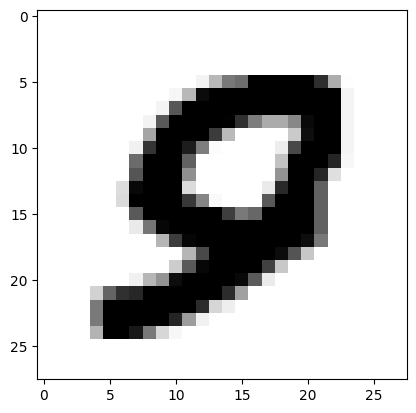

y = 9, predicted=5


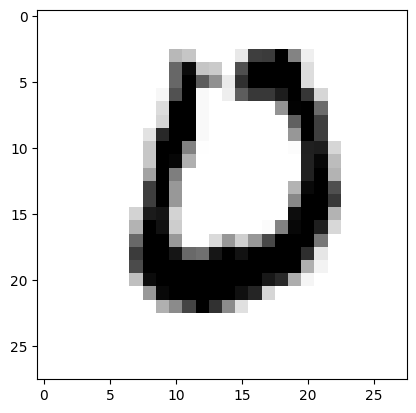

y = 0, predicted=6


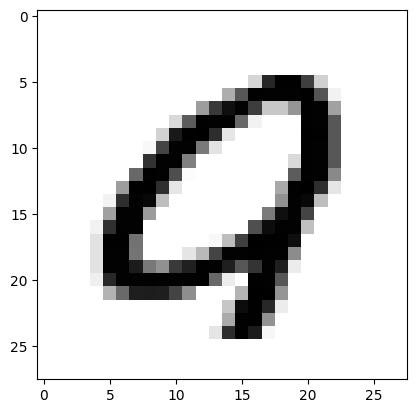

y = 9, predicted=0


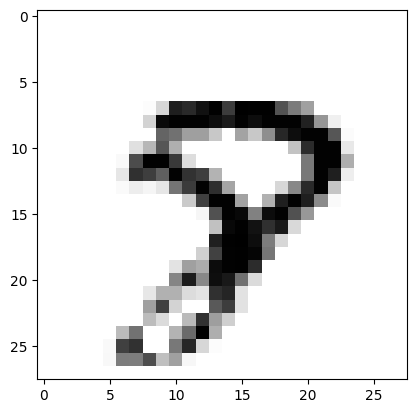

y = 8, predicted=9


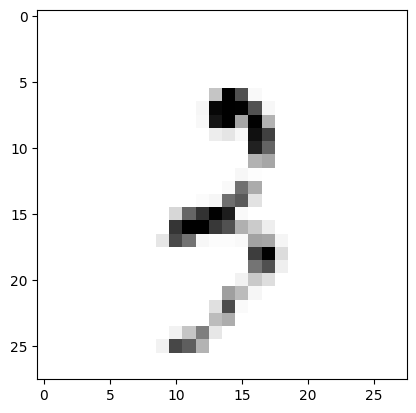

y = 3, predicted=2


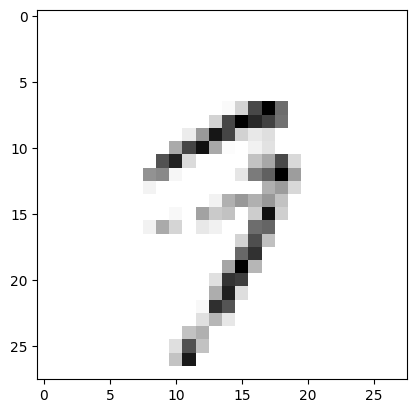

y = 9, predicted=7


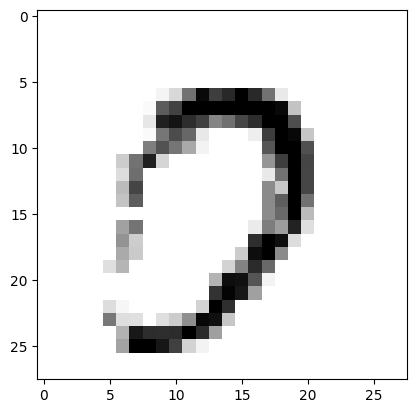

y = 0, predicted=3


y = 5, predicted=0


y = 8, predicted=4


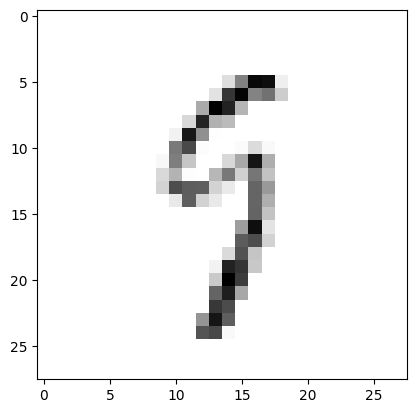

y = 9, predicted=5


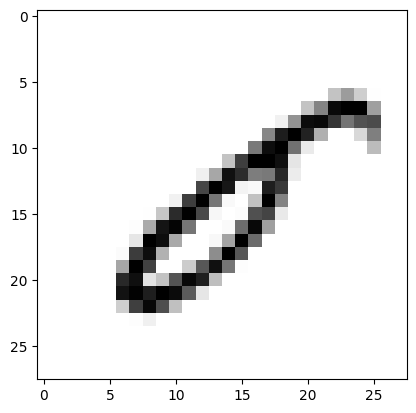

y = 0, predicted=2


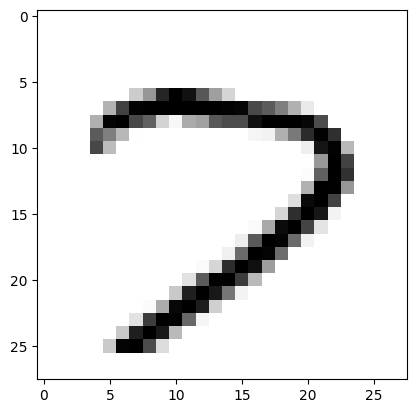

y = 7, predicted=3


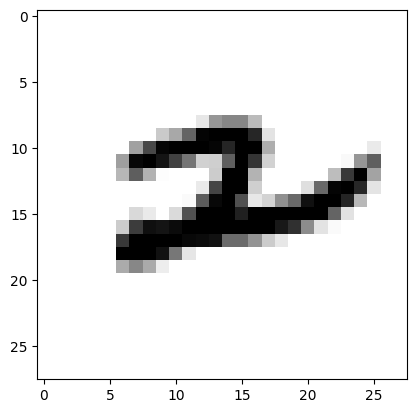

y = 2, predicted=7


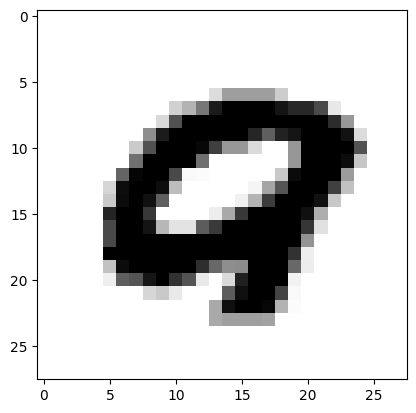

y = 9, predicted=0


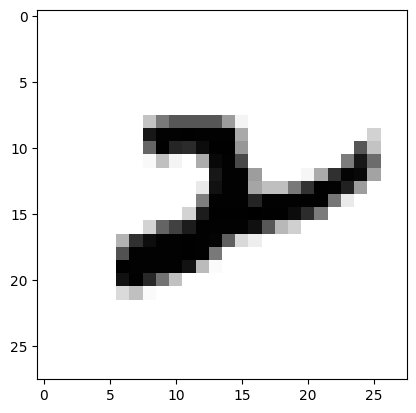

y = 2, predicted=1


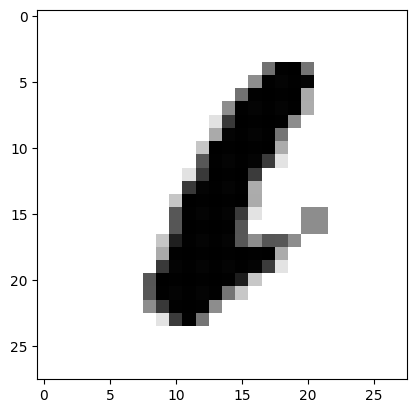

y = 1, predicted=8


y = 1, predicted=2


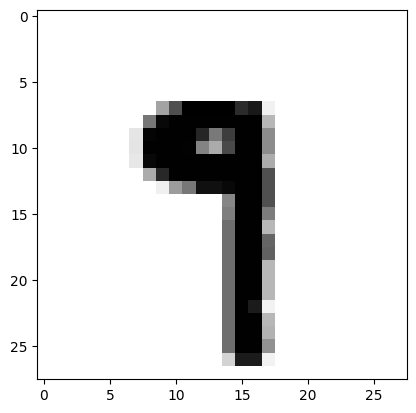

y = 9, predicted=7


y = 2, predicted=6


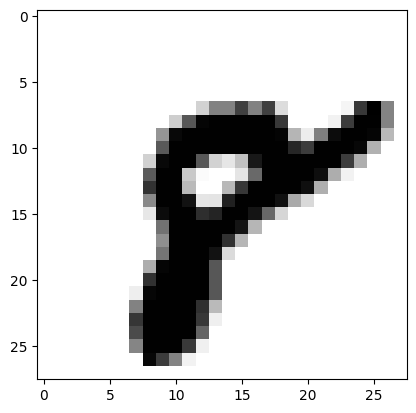

y = 8, predicted=9


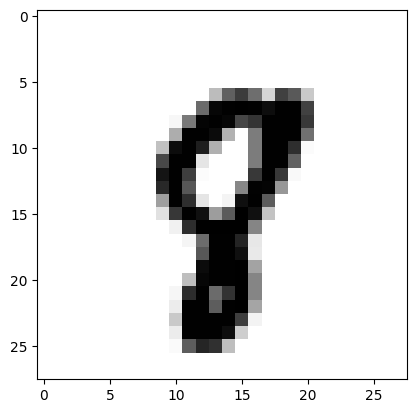

y = 8, predicted=9


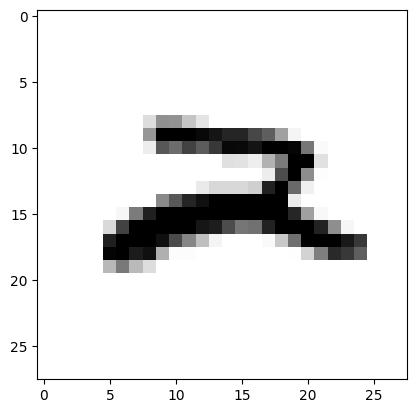

y = 2, predicted=7


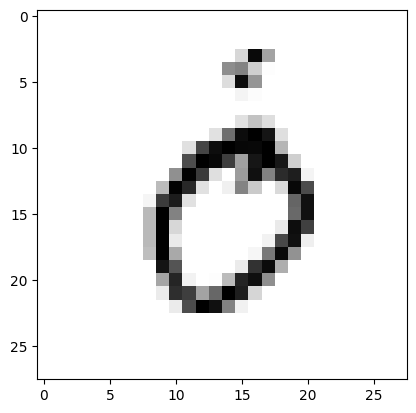

y = 0, predicted=6


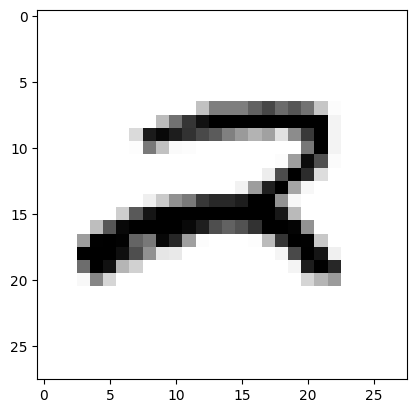

y = 2, predicted=3


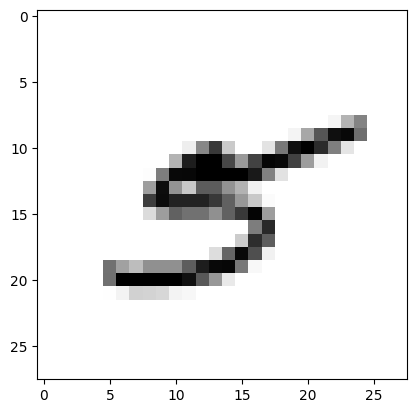

y = 5, predicted=6


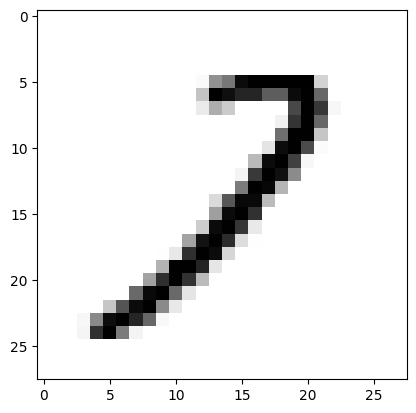

y = 7, predicted=3


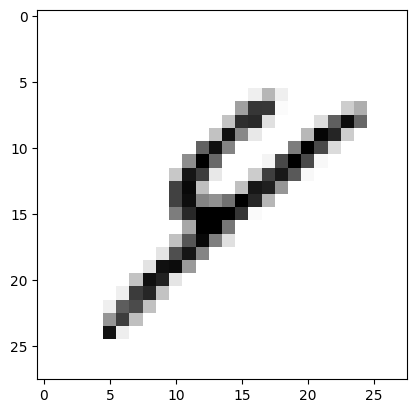

y = 4, predicted=9


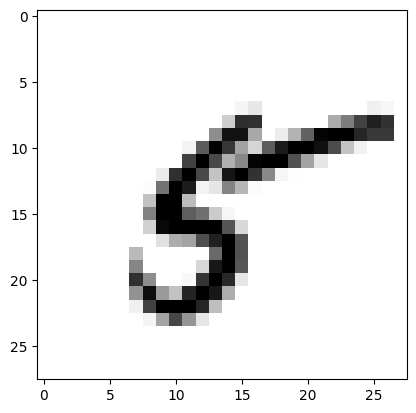

y = 5, predicted=6


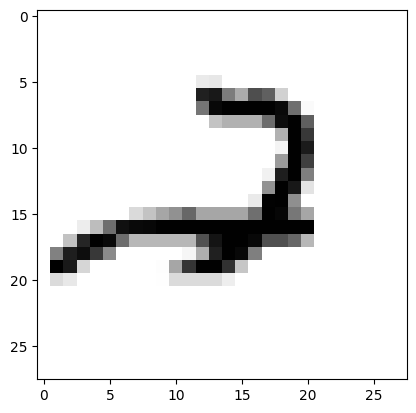

y = 2, predicted=7


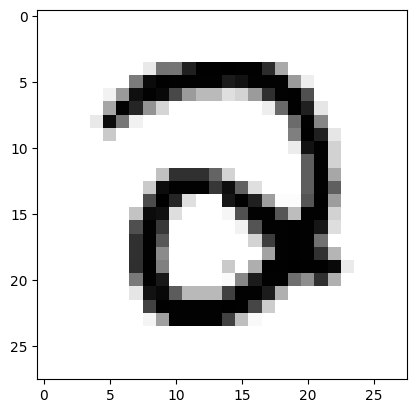

y = 2, predicted=6


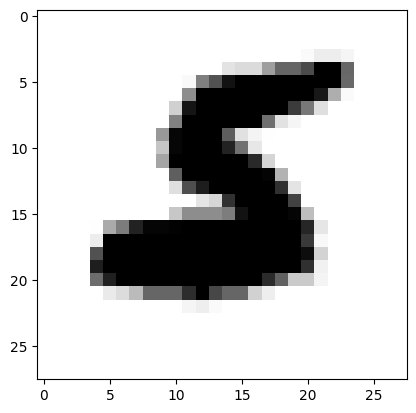

y = 5, predicted=6


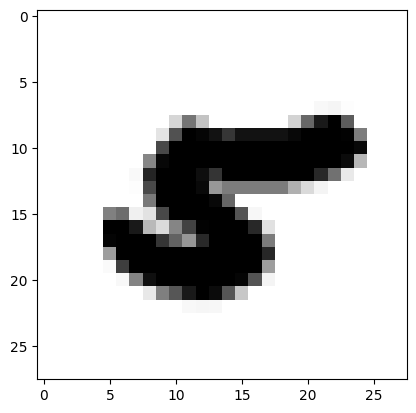

y = 5, predicted=8


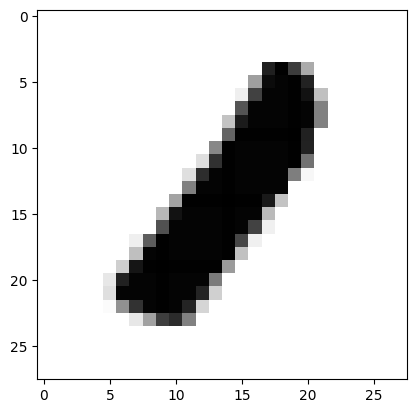

y = 1, predicted=8


y = 3, predicted=9


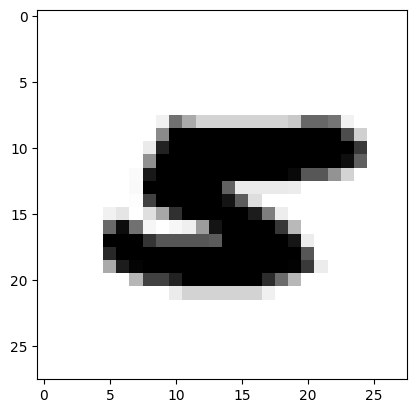

y = 5, predicted=8


y = 1, predicted=8


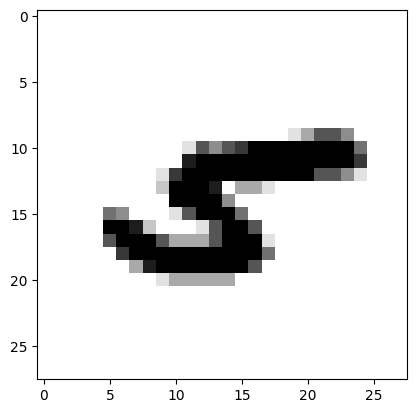

y = 5, predicted=6


y = 1, predicted=8


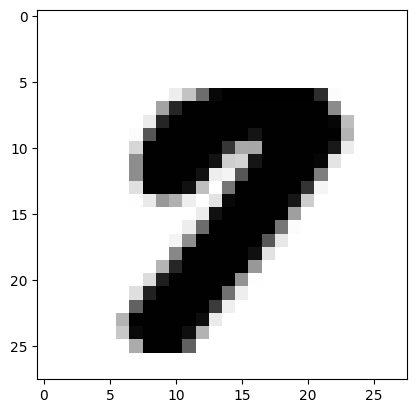

y = 7, predicted=9


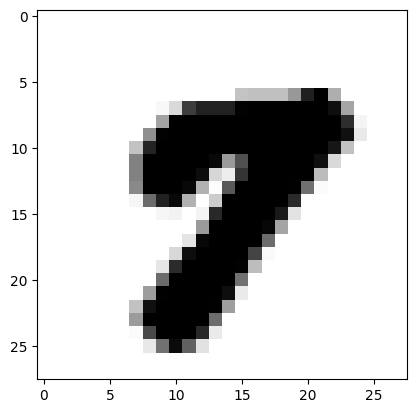

y = 7, predicted=9


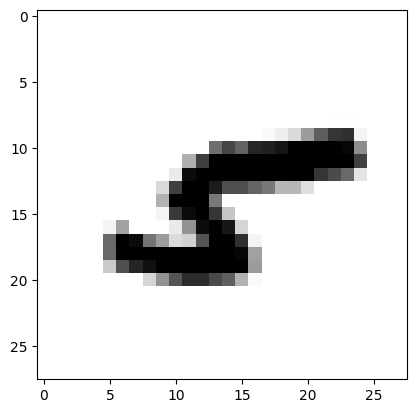

y = 5, predicted=8


y = 1, predicted=8


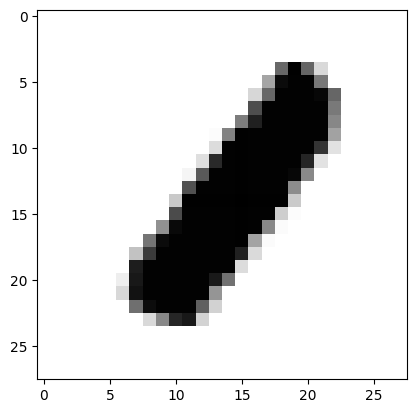

y = 1, predicted=8


y = 4, predicted=0


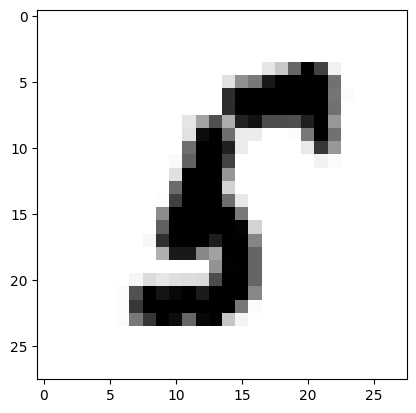

y = 5, predicted=0


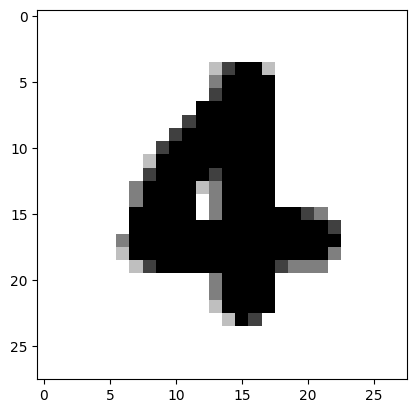

y = 4, predicted=0


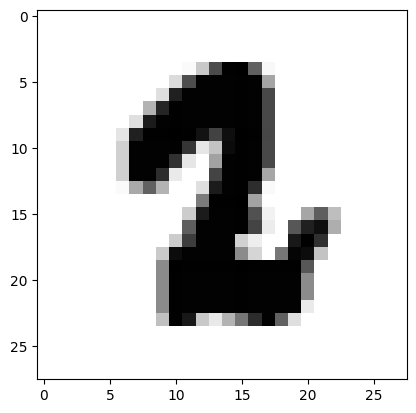

y = 2, predicted=1


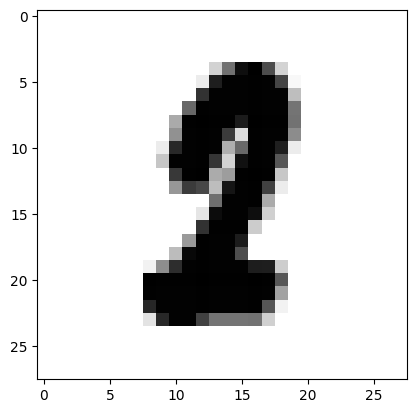

y = 2, predicted=0


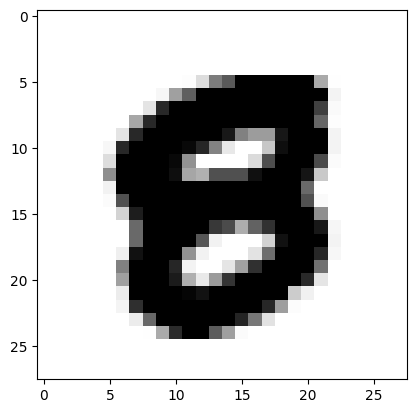

y = 8, predicted=0


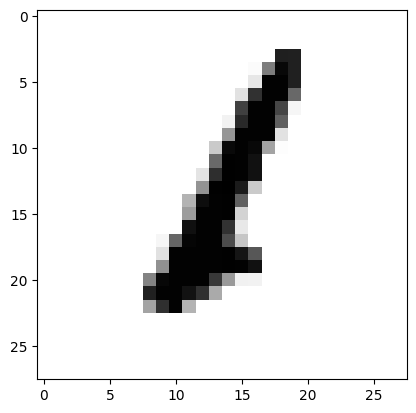

y = 1, predicted=0


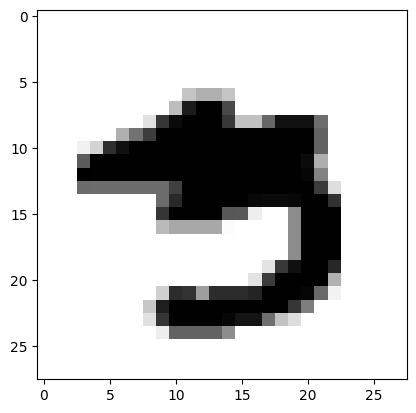

y = 3, predicted=9


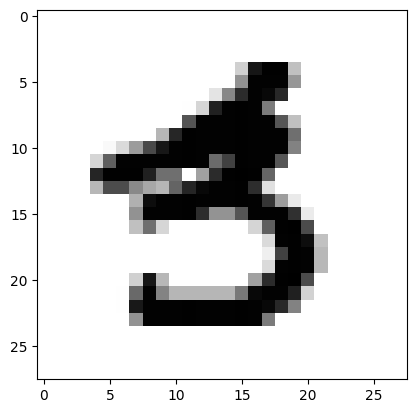

y = 3, predicted=8


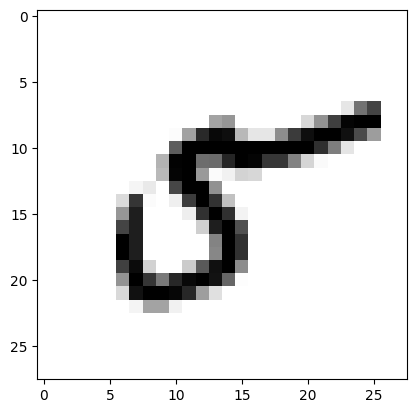

y = 5, predicted=0


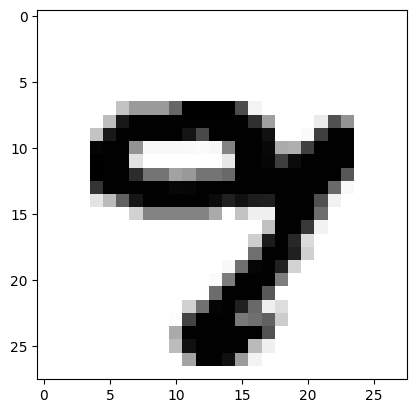

y = 9, predicted=7


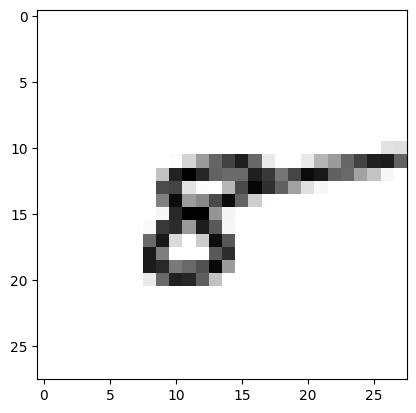

y = 8, predicted=6


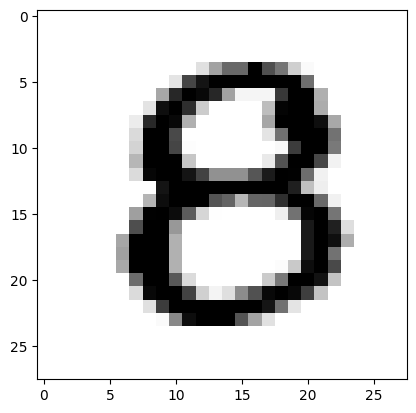

y = 8, predicted=0


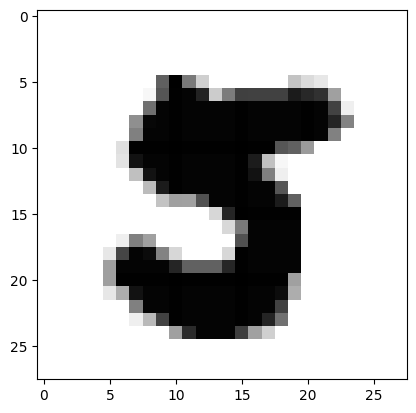

y = 5, predicted=3


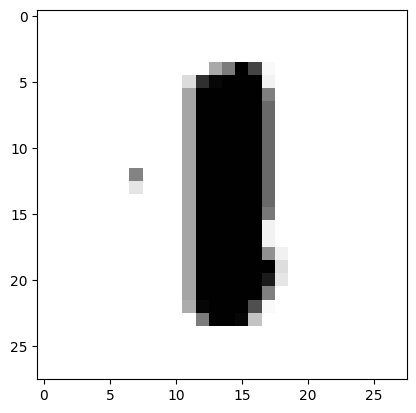

y = 1, predicted=8


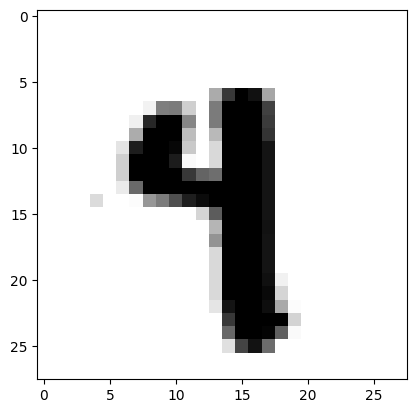

y = 4, predicted=9


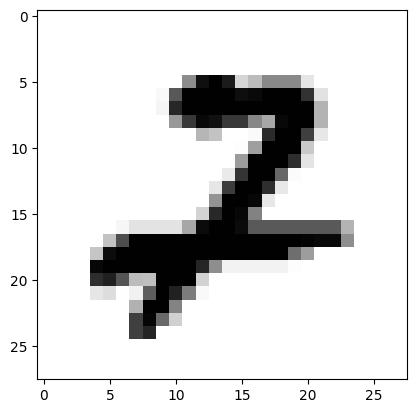

y = 7, predicted=2


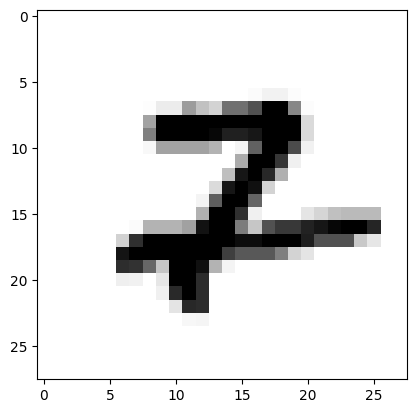

y = 7, predicted=2


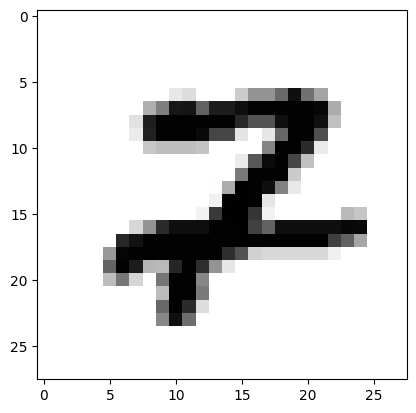

y = 7, predicted=2


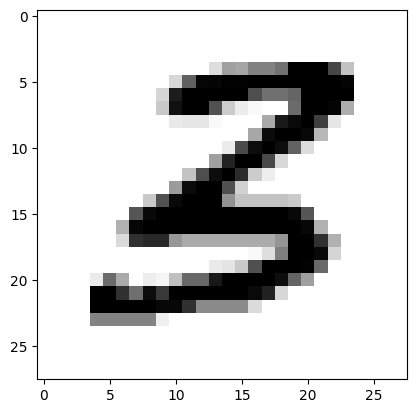

y = 3, predicted=2


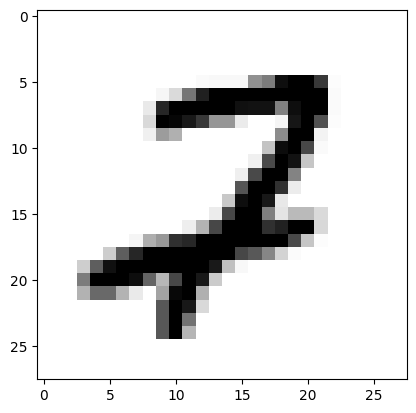

y = 7, predicted=3


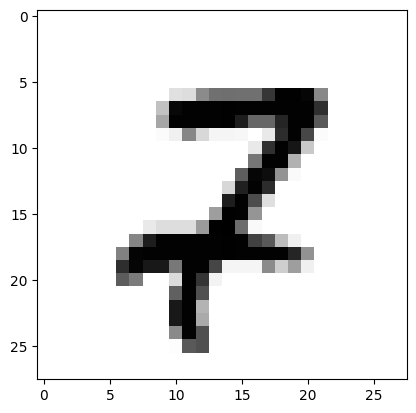

y = 7, predicted=2


y = 7, predicted=3


y = 1, predicted=8


y = 5, predicted=0


y = 5, predicted=0


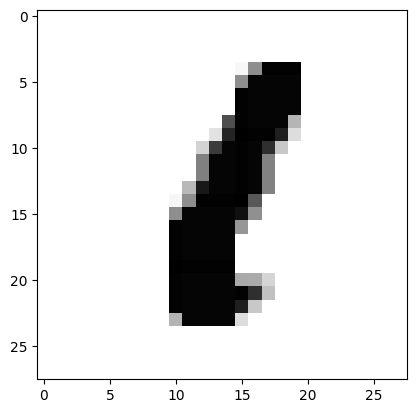

y = 1, predicted=8


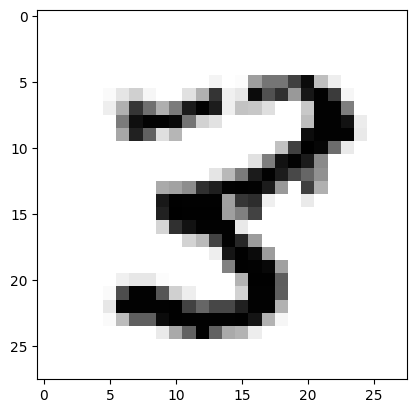

y = 3, predicted=8


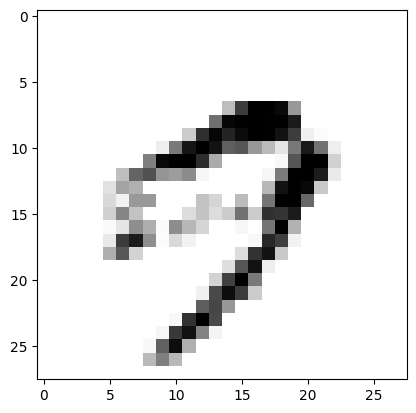

y = 9, predicted=7


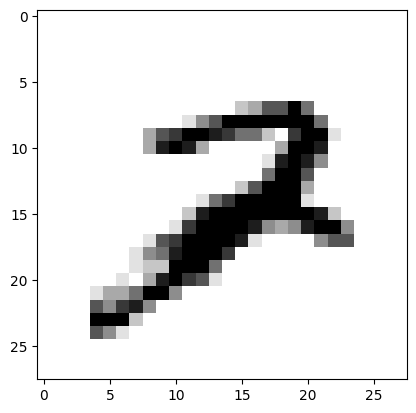

y = 2, predicted=7


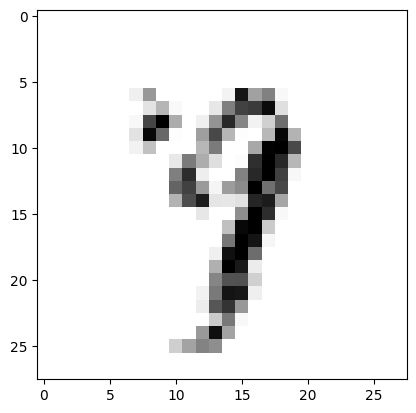

y = 9, predicted=7


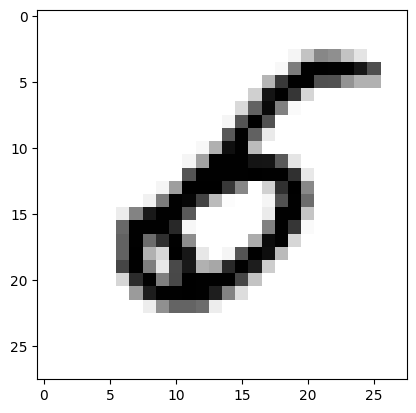

y = 5, predicted=6


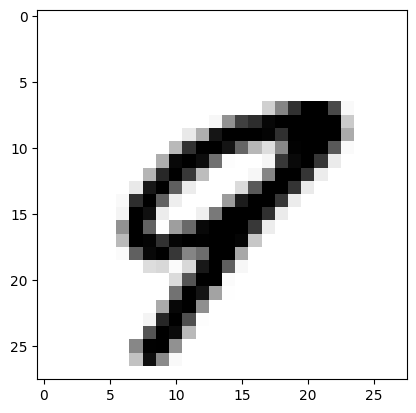

y = 9, predicted=7


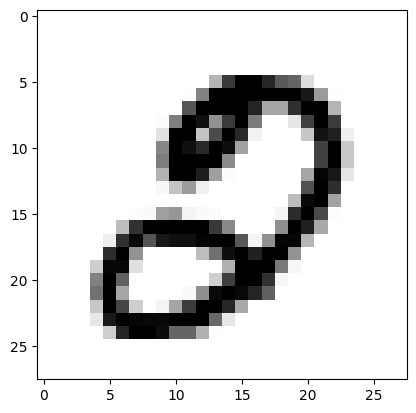

y = 2, predicted=0


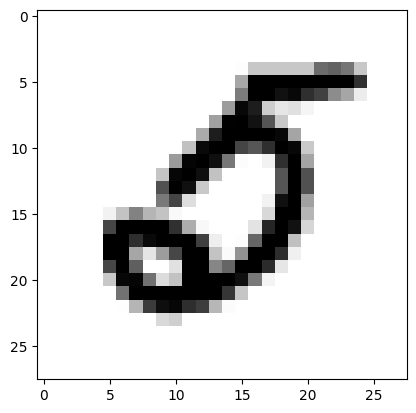

y = 5, predicted=0


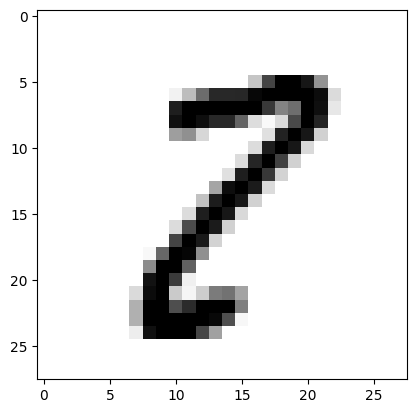

y = 2, predicted=3


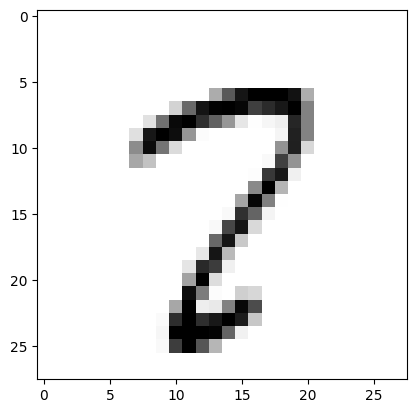

y = 2, predicted=3


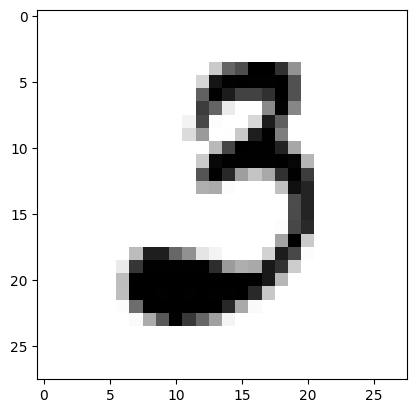

y = 3, predicted=0


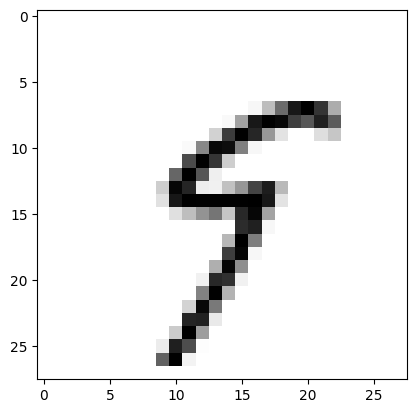

y = 9, predicted=5


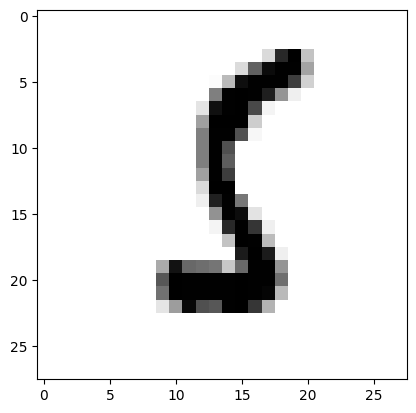

y = 5, predicted=6


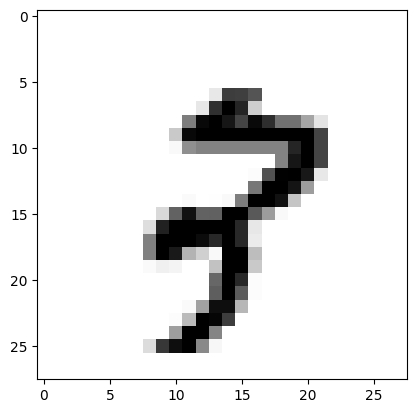

y = 3, predicted=7


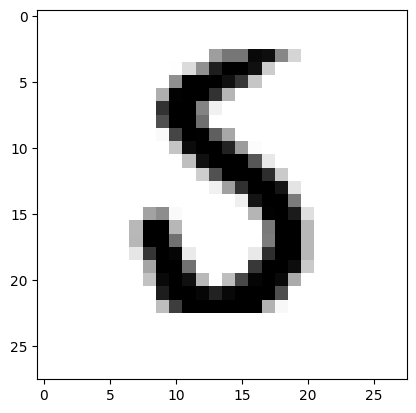

y = 5, predicted=6


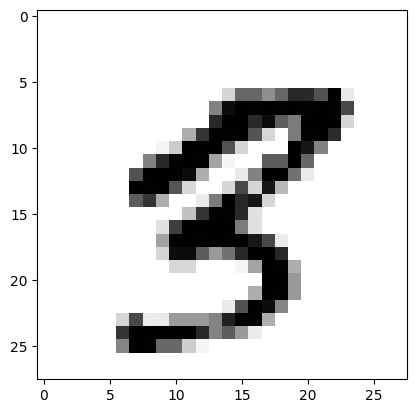

y = 3, predicted=8


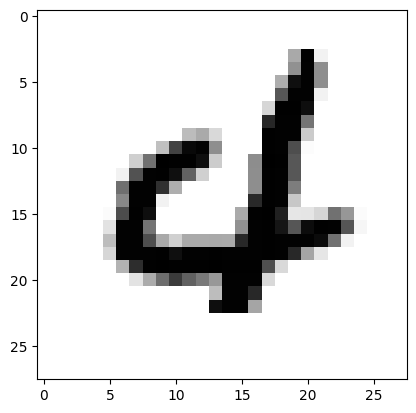

y = 4, predicted=0


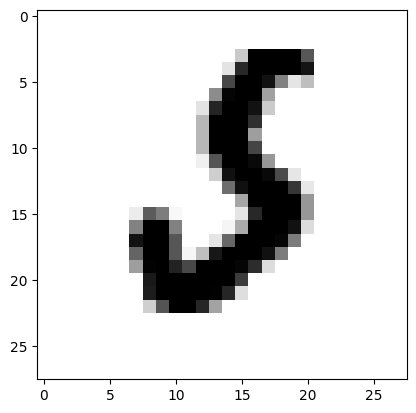

y = 5, predicted=6


In [ ]:
for i in range(len(test_y)):
  if test_y[i]==predicted[i]: continue

  plt.imshow(test_x[i].reshape((28,28)), cmap=plt.cm.binary)
  plt.show()
  print("y = {}, predicted={}".format(test_y[i], predicted[i]))

y = 5, predicted=6


y = 3, predicted=8


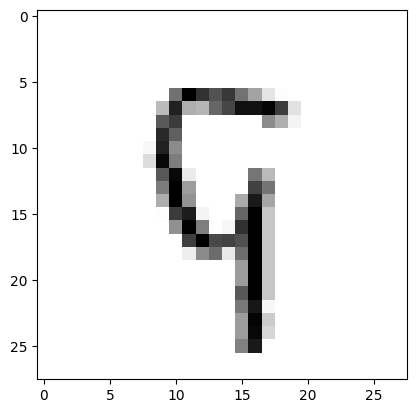

y = 9, predicted=5


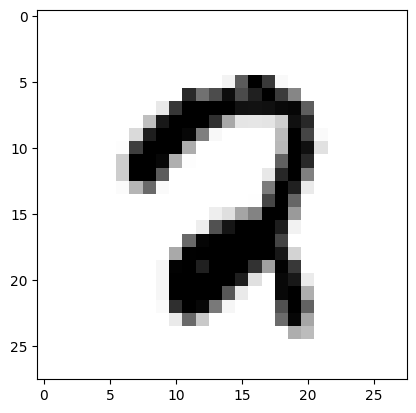

y = 2, predicted=9


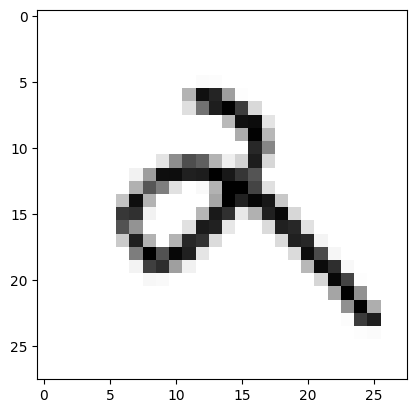

y = 2, predicted=9


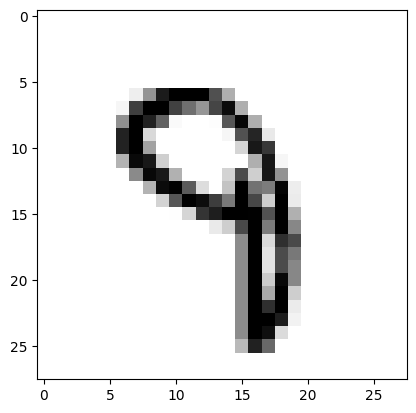

y = 9, predicted=8


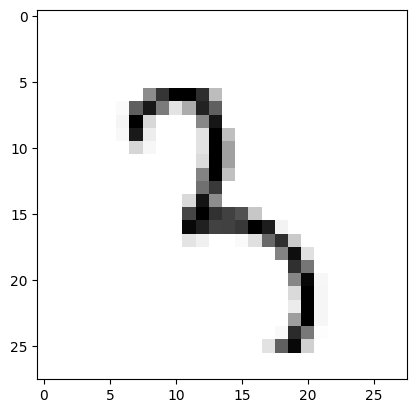

y = 3, predicted=9


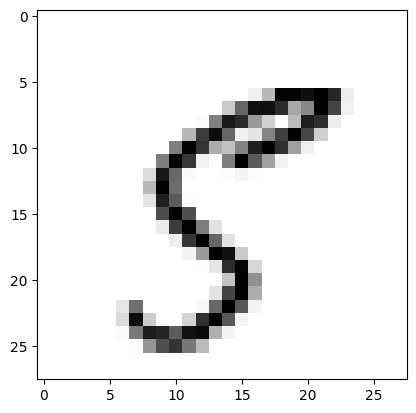

y = 5, predicted=8


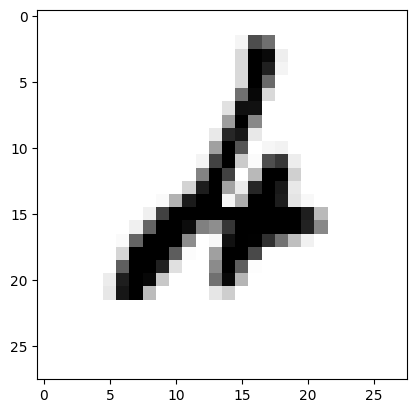

y = 4, predicted=6


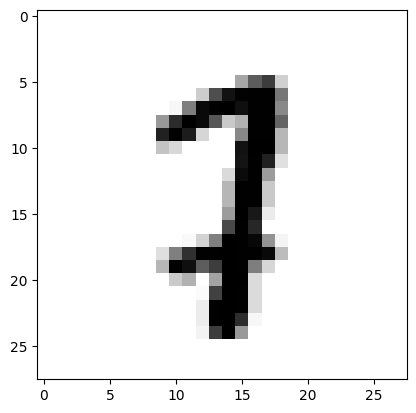

y = 7, predicted=3


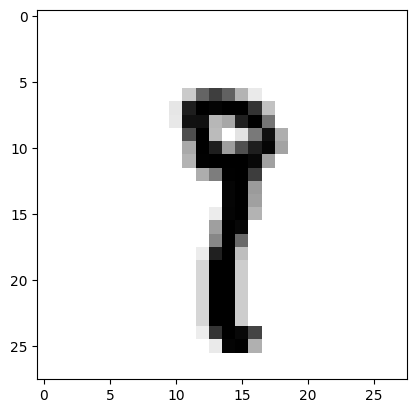

y = 9, predicted=1


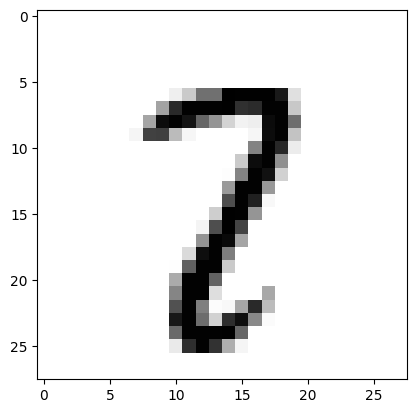

y = 2, predicted=3


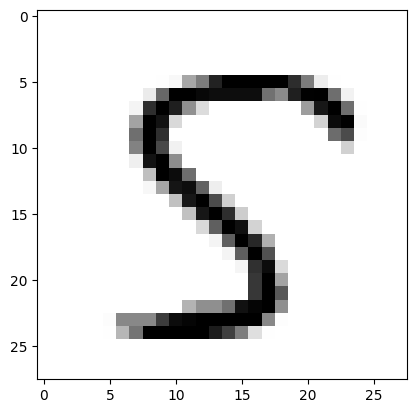

y = 5, predicted=0


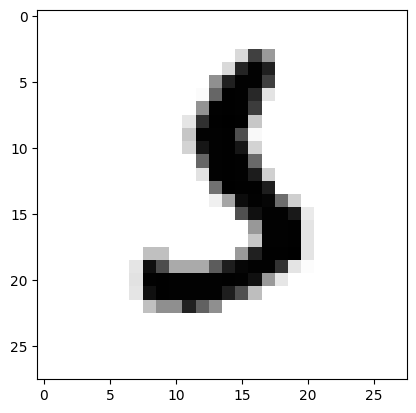

y = 5, predicted=6


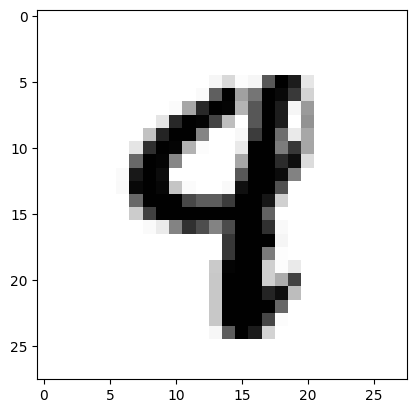

y = 9, predicted=4


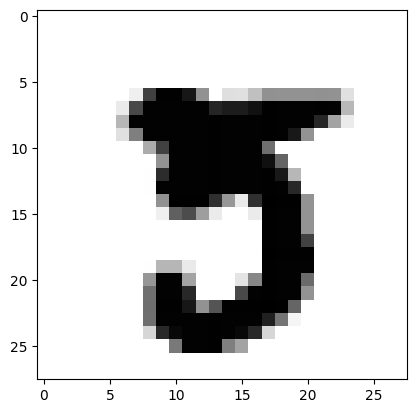

y = 5, predicted=3


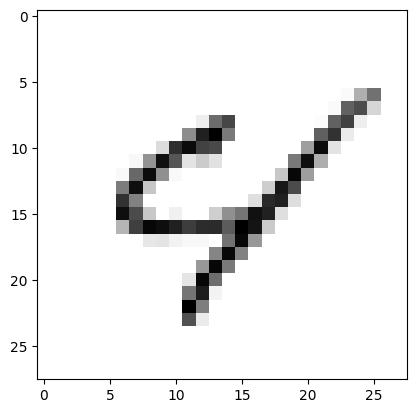

y = 4, predicted=7


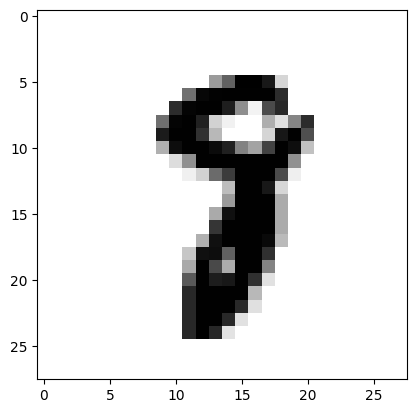

y = 8, predicted=9


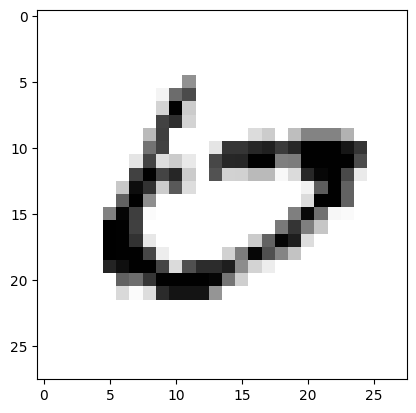

y = 6, predicted=0


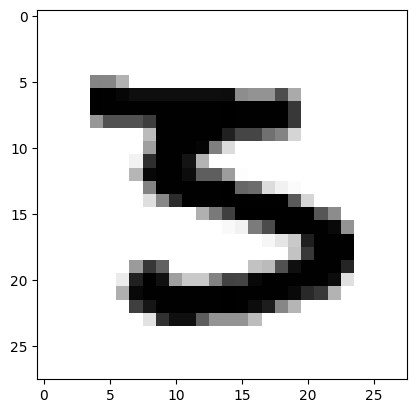

y = 3, predicted=9


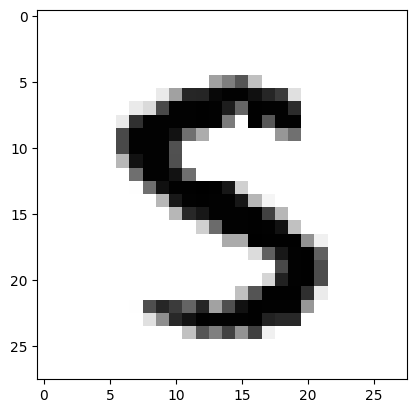

y = 5, predicted=3


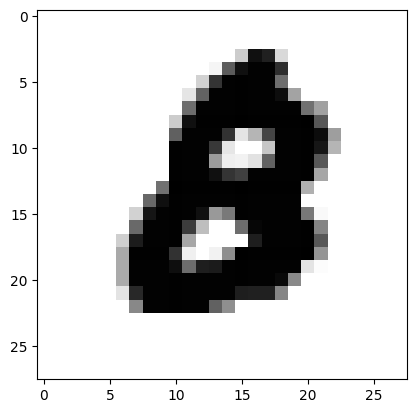

y = 8, predicted=6


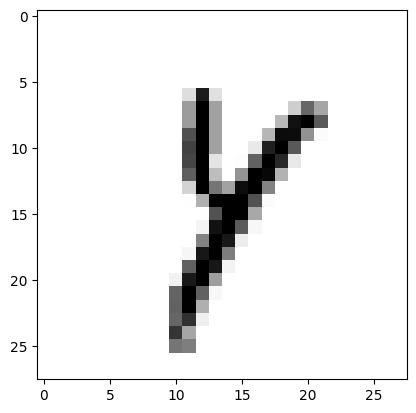

y = 4, predicted=8


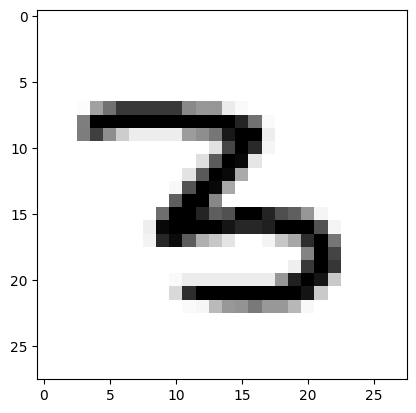

y = 3, predicted=2


y = 7, predicted=9


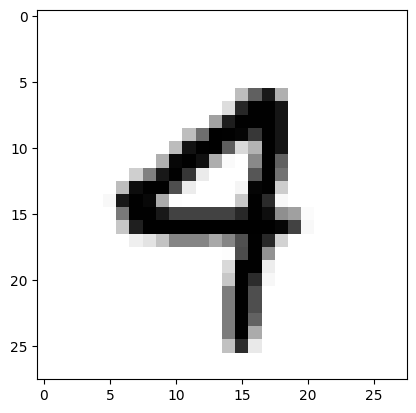

y = 4, predicted=9


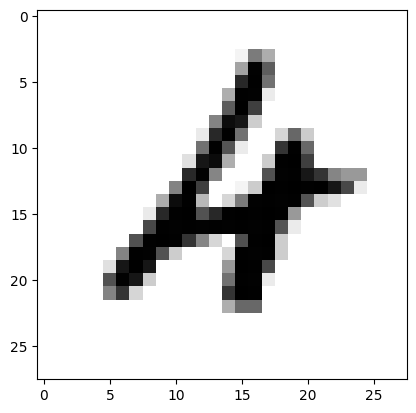

y = 4, predicted=6


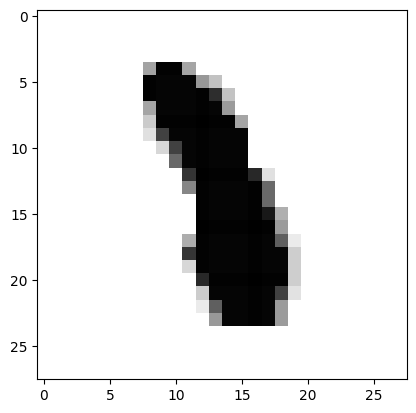

y = 1, predicted=8


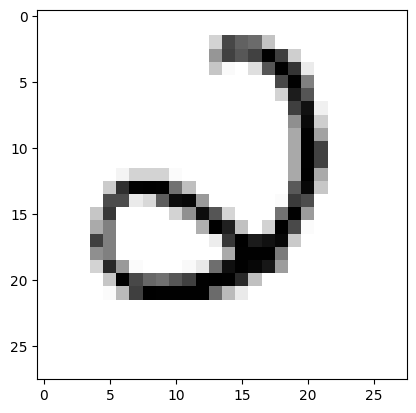

y = 2, predicted=1


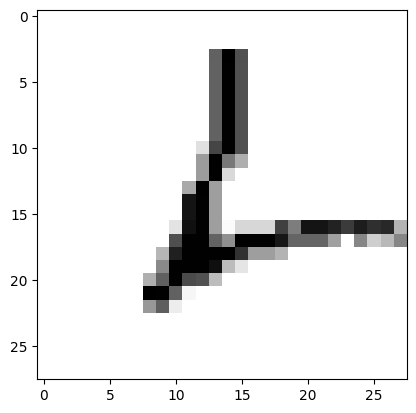

y = 2, predicted=6


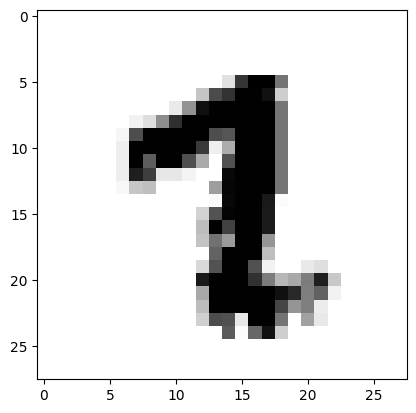

y = 2, predicted=7


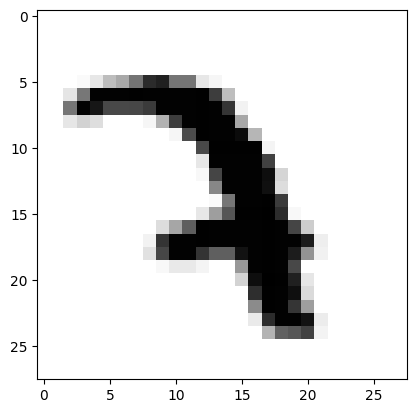

y = 7, predicted=3


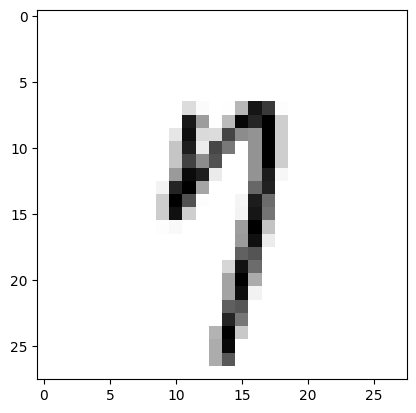

y = 7, predicted=4


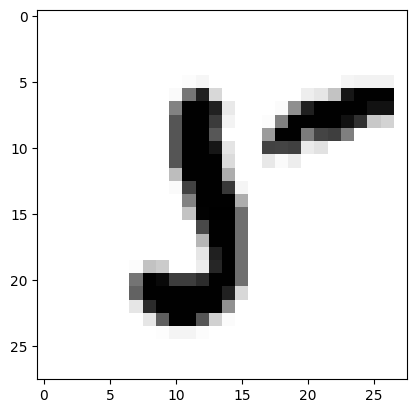

y = 5, predicted=0


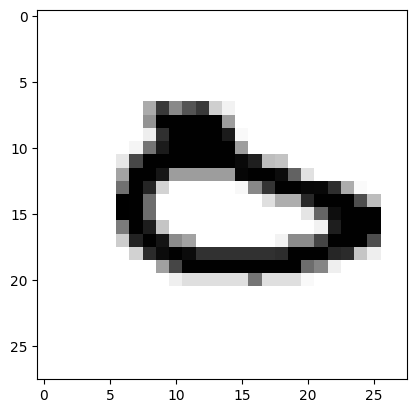

y = 0, predicted=5


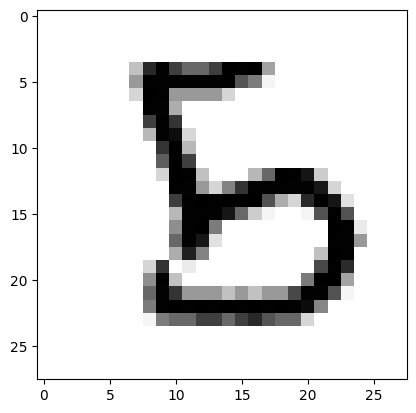

y = 5, predicted=6


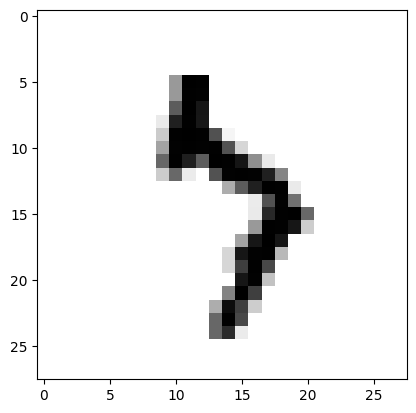

y = 7, predicted=4


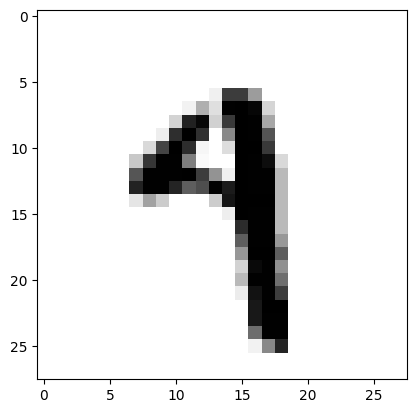

y = 4, predicted=9


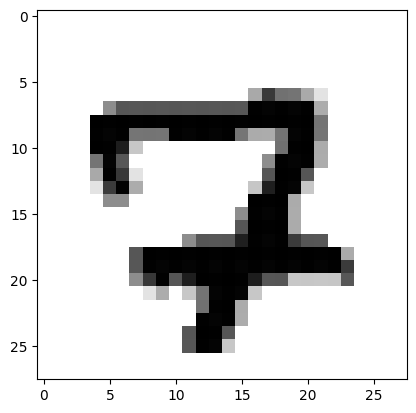

y = 7, predicted=3


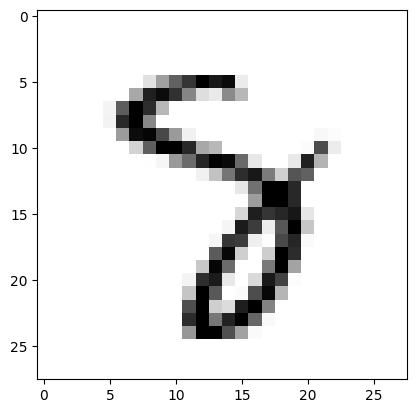

y = 8, predicted=3


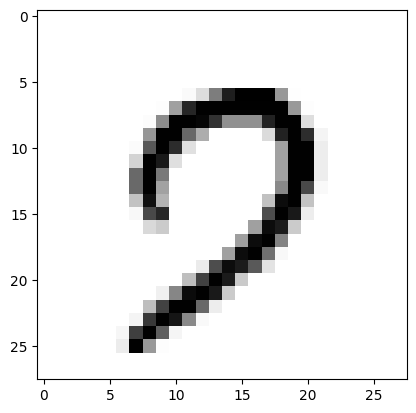

y = 7, predicted=9


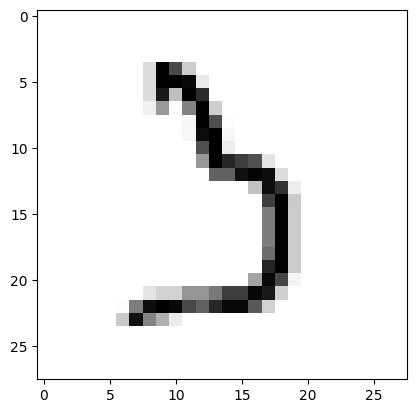

y = 3, predicted=5


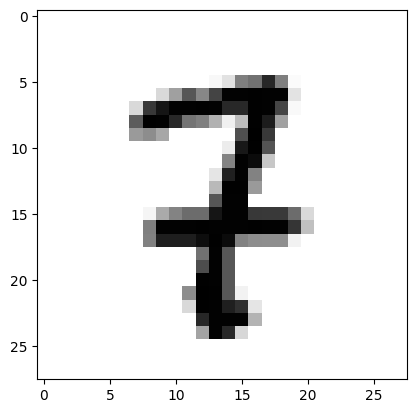

y = 7, predicted=3


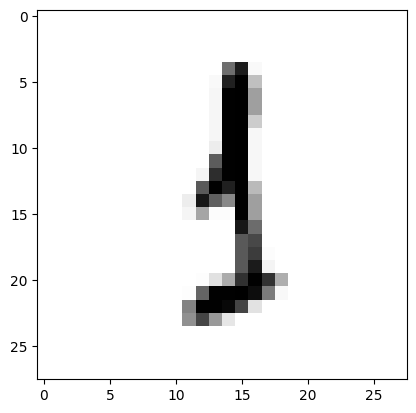

y = 1, predicted=0


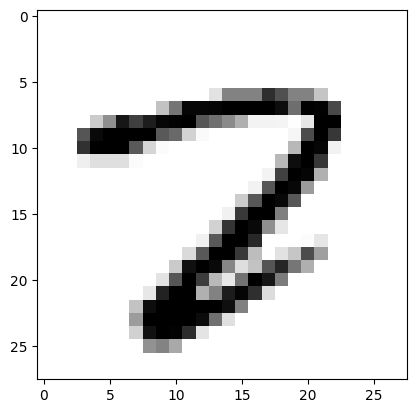

y = 2, predicted=7


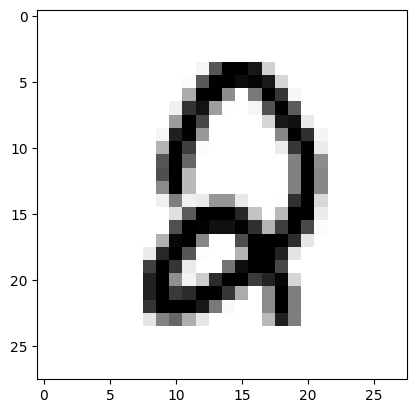

y = 2, predicted=8


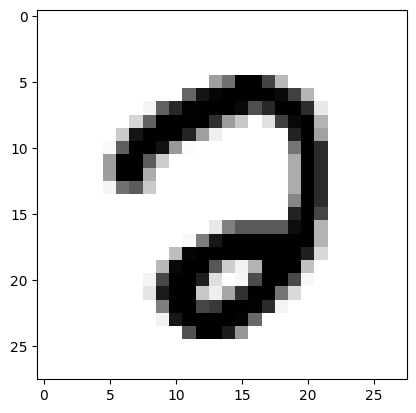

y = 2, predicted=0


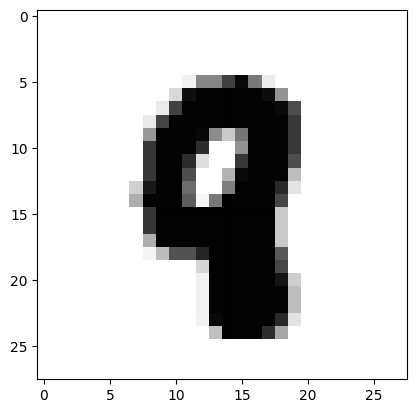

y = 8, predicted=9


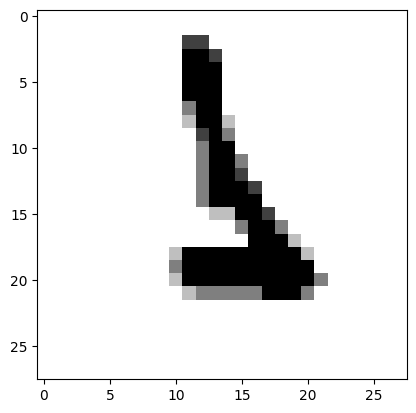

y = 1, predicted=6


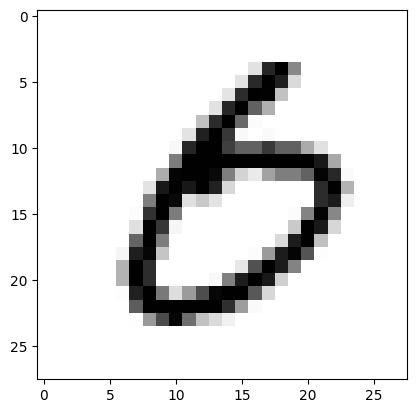

y = 6, predicted=0


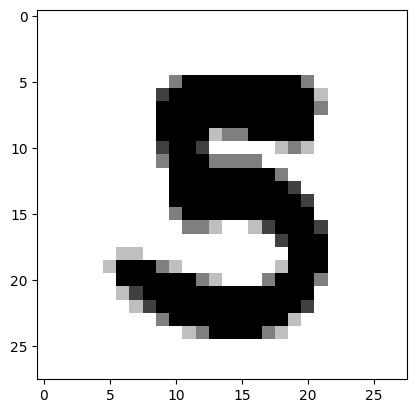

y = 5, predicted=3


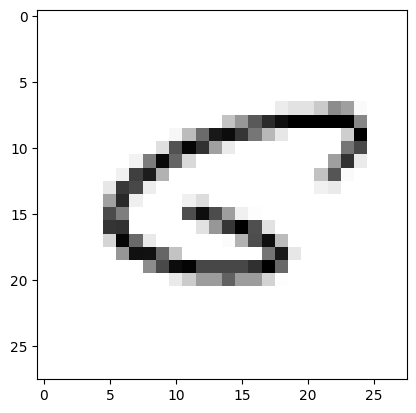

y = 6, predicted=5


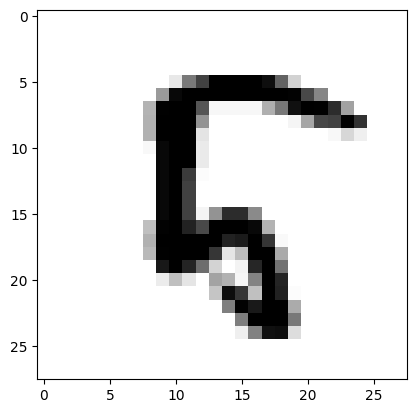

y = 5, predicted=6


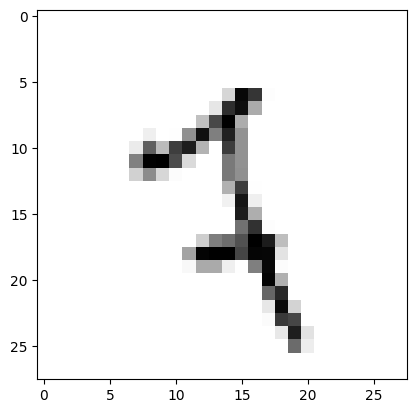

y = 7, predicted=1


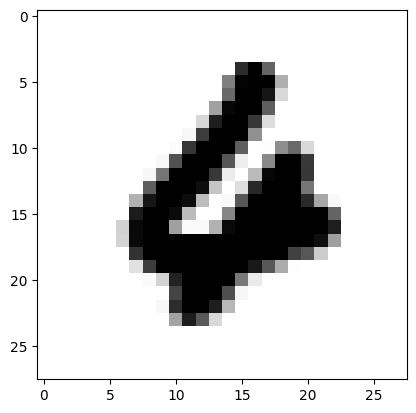

y = 4, predicted=6


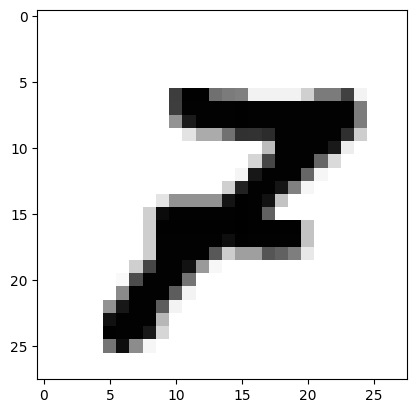

y = 7, predicted=3


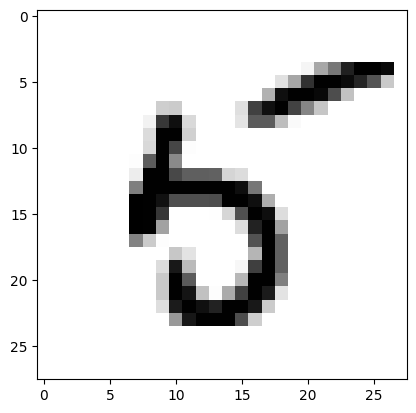

y = 5, predicted=6


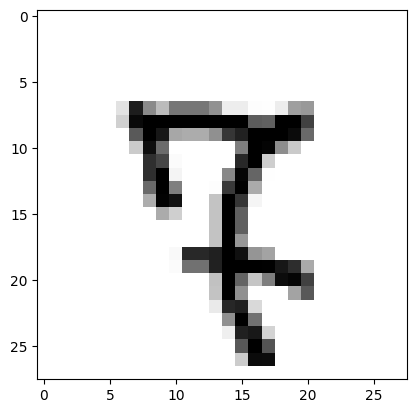

y = 7, predicted=9


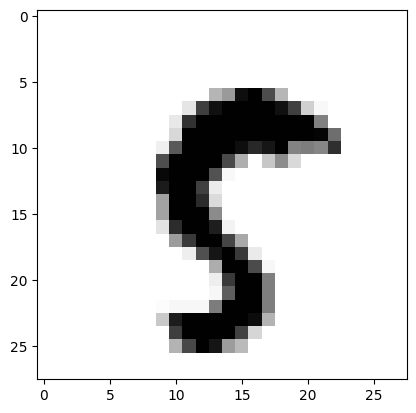

y = 5, predicted=0


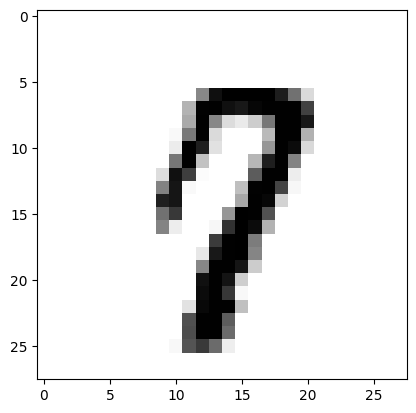

y = 7, predicted=9


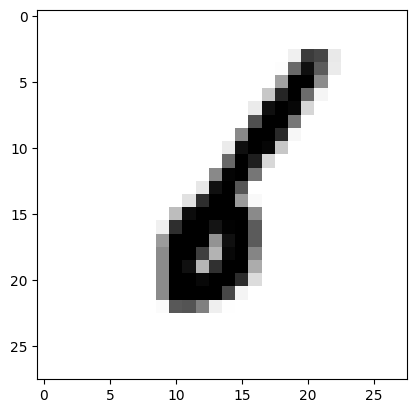

y = 6, predicted=8


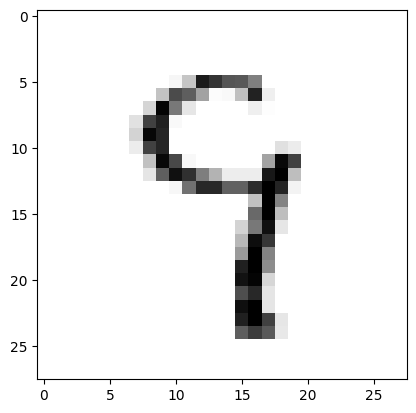

y = 9, predicted=4


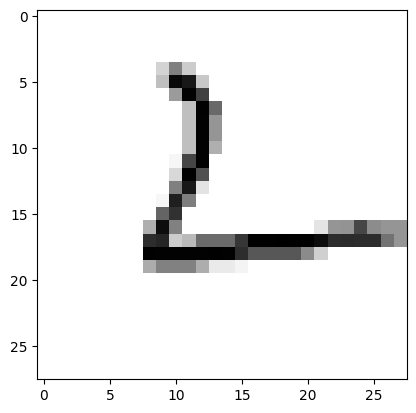

y = 2, predicted=4


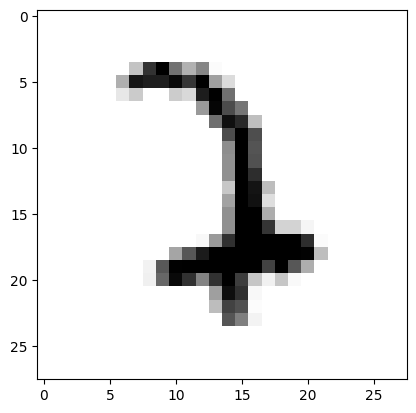

y = 7, predicted=2


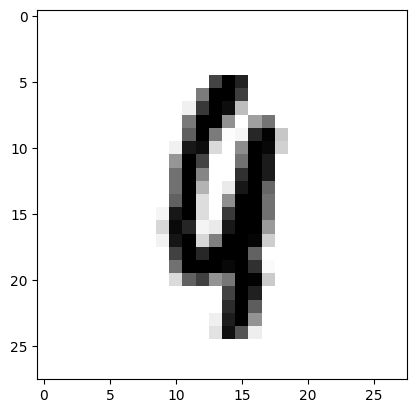

y = 9, predicted=4


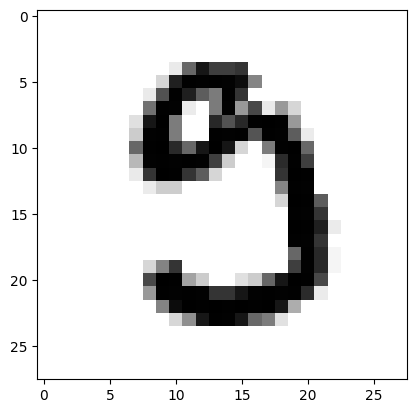

y = 9, predicted=3


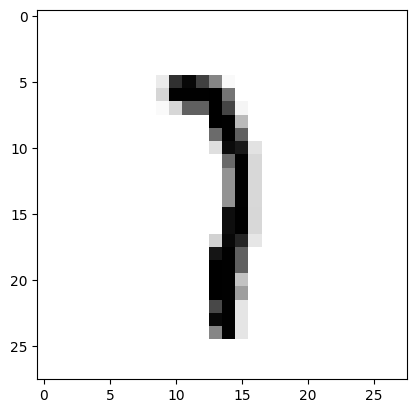

y = 7, predicted=1


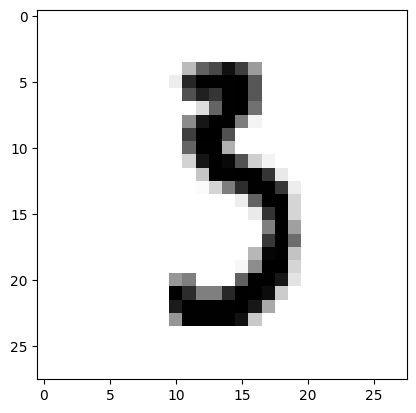

y = 3, predicted=5


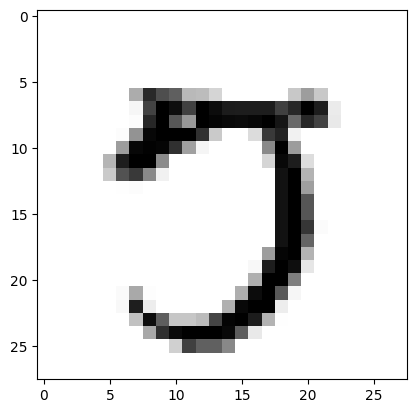

y = 5, predicted=7


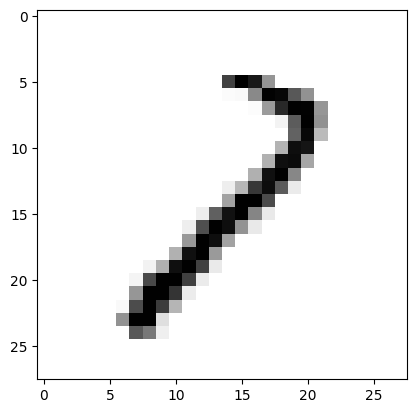

y = 7, predicted=1


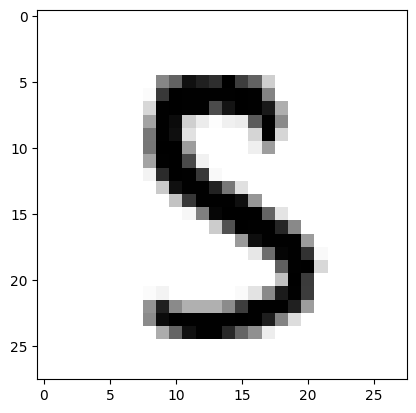

y = 5, predicted=3


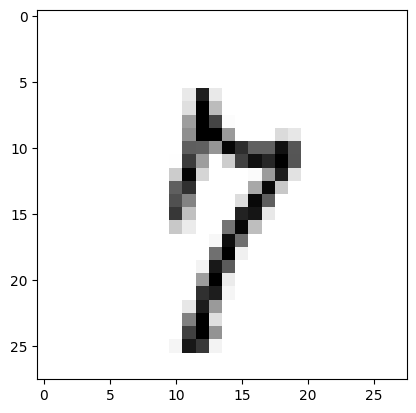

y = 7, predicted=4


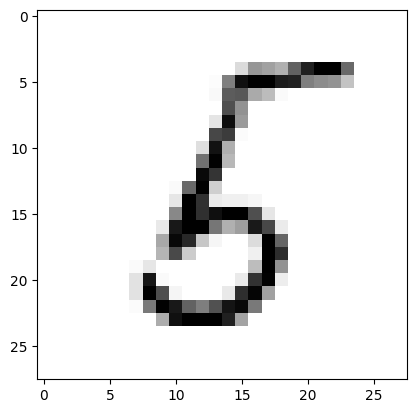

y = 5, predicted=6


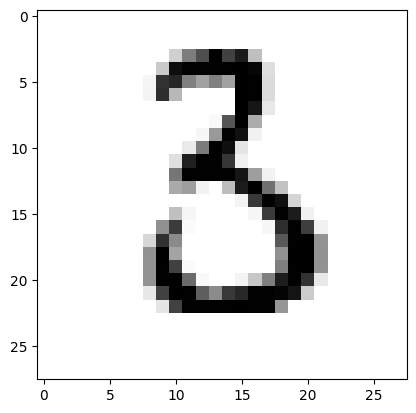

y = 3, predicted=6


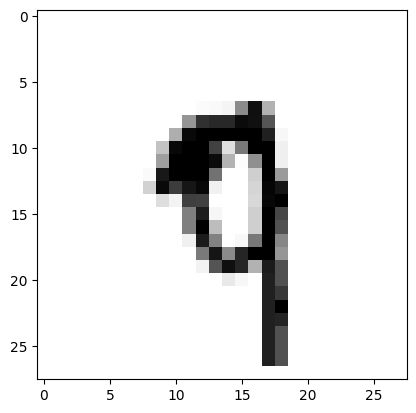

y = 9, predicted=4


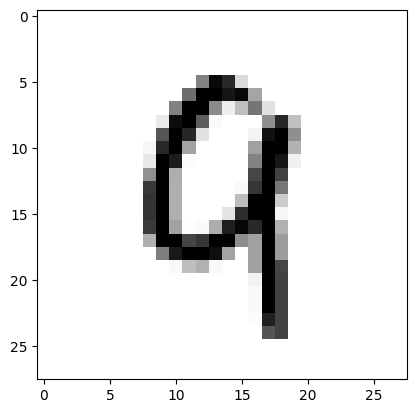

y = 9, predicted=4


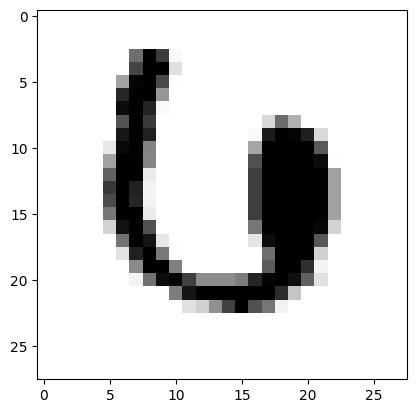

y = 6, predicted=0


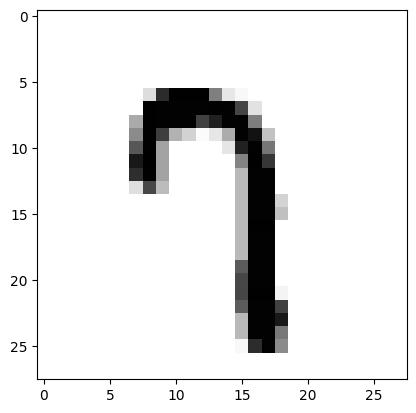

y = 7, predicted=9


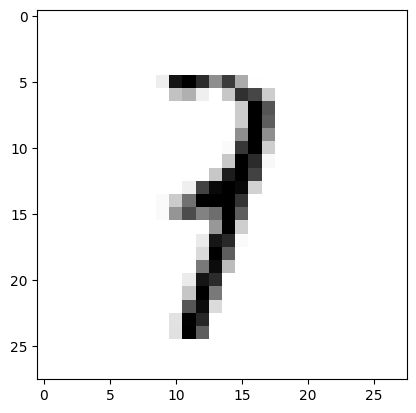

y = 7, predicted=1


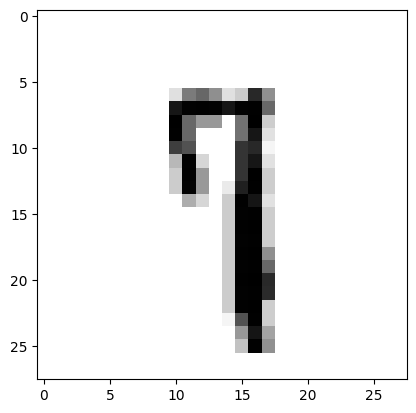

y = 7, predicted=9


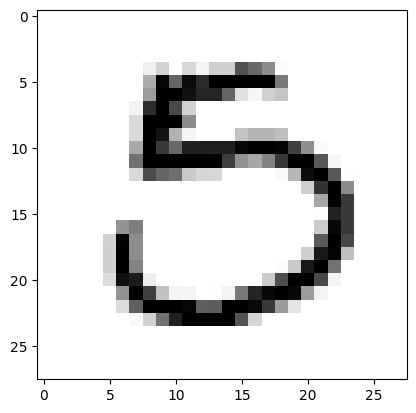

y = 5, predicted=3


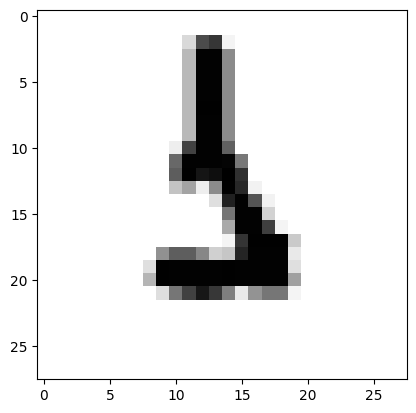

y = 1, predicted=5


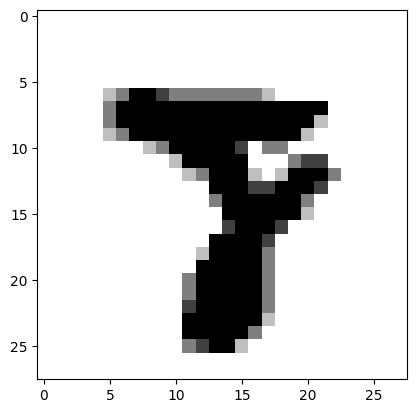

y = 8, predicted=3


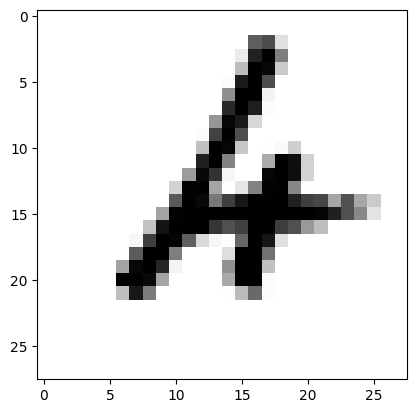

y = 4, predicted=6


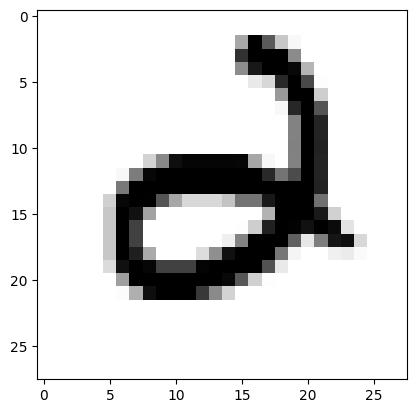

y = 2, predicted=6


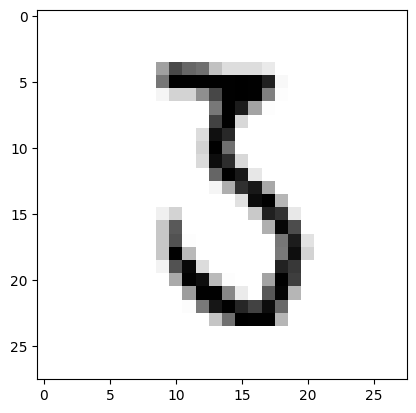

y = 3, predicted=5


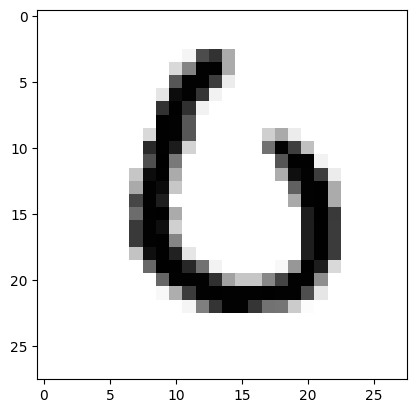

y = 0, predicted=6


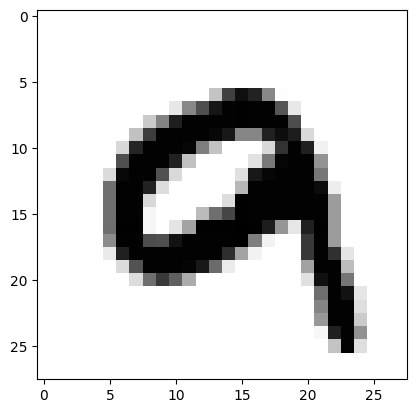

y = 9, predicted=0


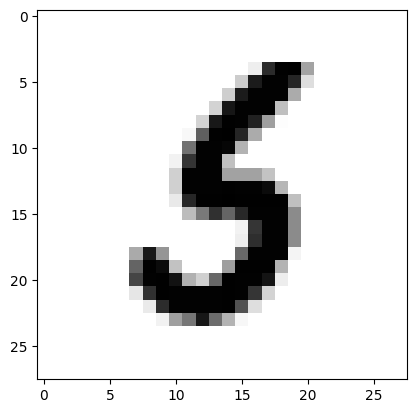

y = 5, predicted=6


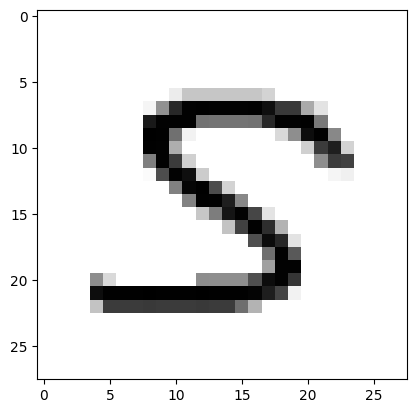

y = 5, predicted=0


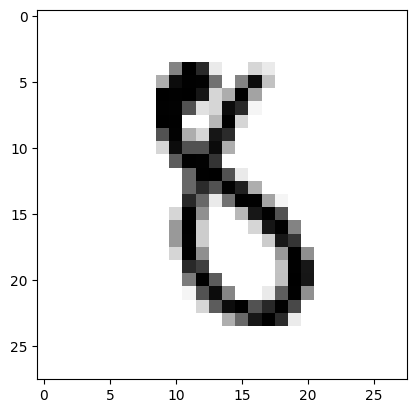

y = 8, predicted=6


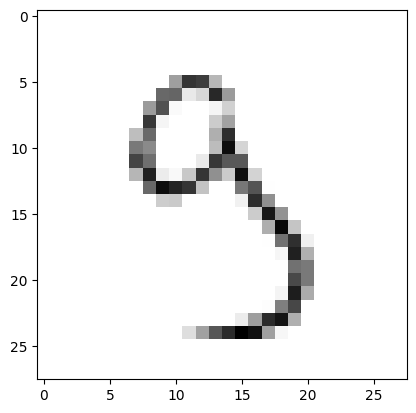

y = 9, predicted=0


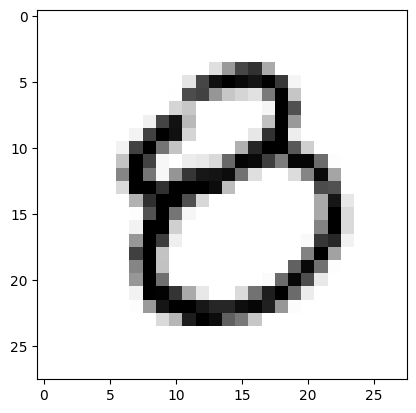

y = 8, predicted=0


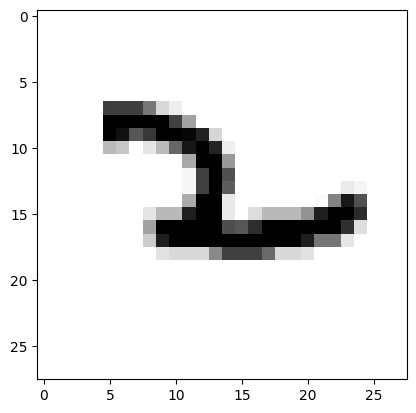

y = 2, predicted=7


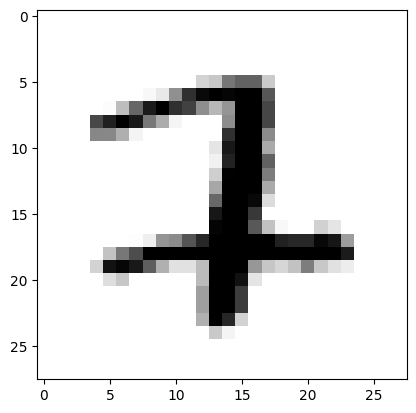

y = 7, predicted=2


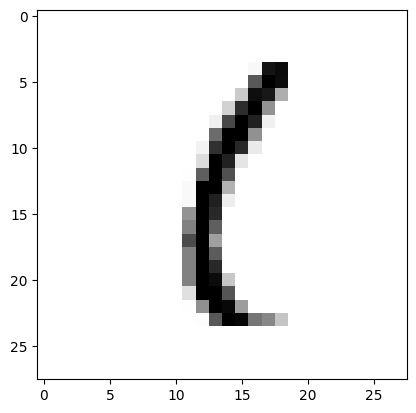

y = 1, predicted=0


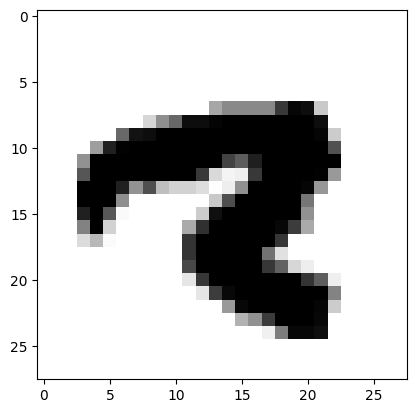

y = 2, predicted=7


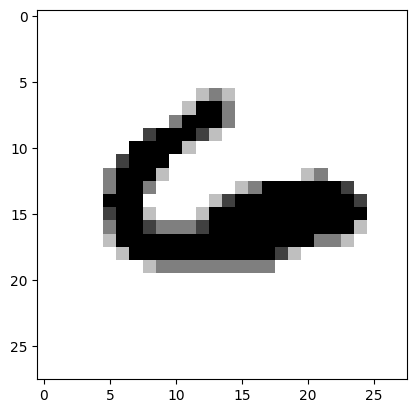

y = 6, predicted=4


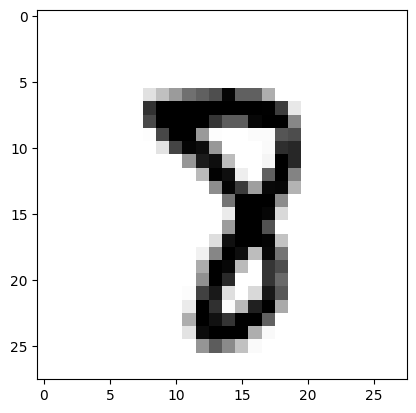

y = 8, predicted=3


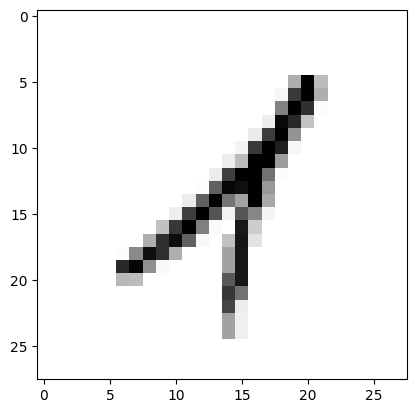

y = 1, predicted=8


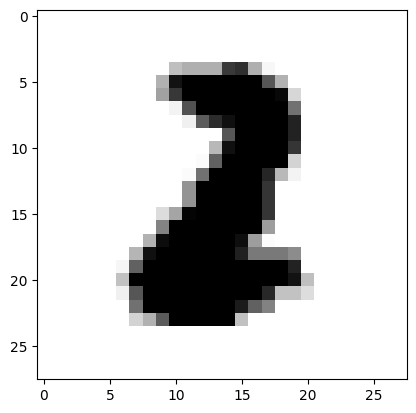

y = 2, predicted=0


y = 9, predicted=4


y = 5, predicted=0


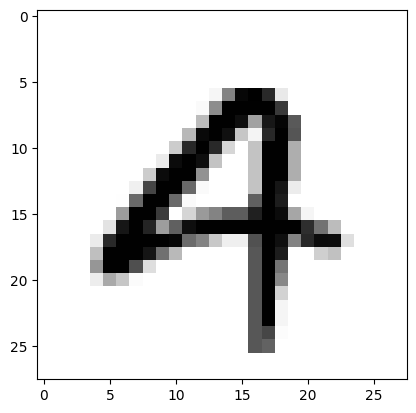

y = 4, predicted=9


y = 3, predicted=8


y = 5, predicted=3


y = 5, predicted=6


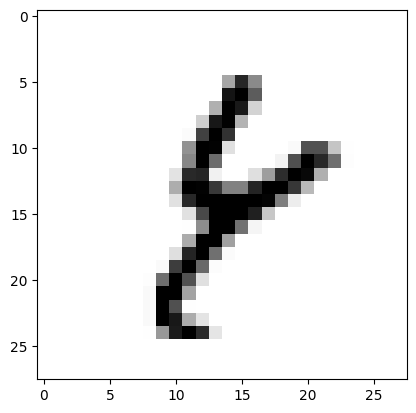

y = 4, predicted=8


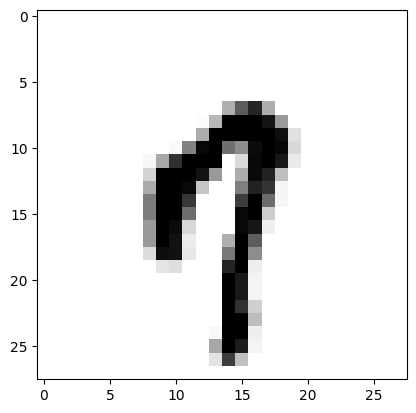

y = 7, predicted=9


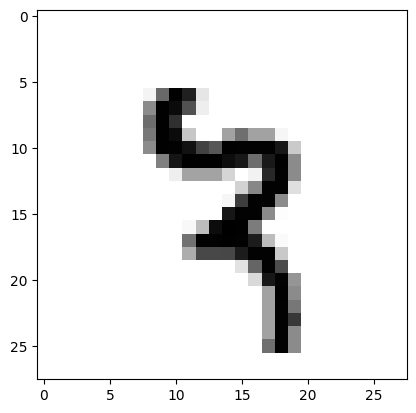

y = 3, predicted=7


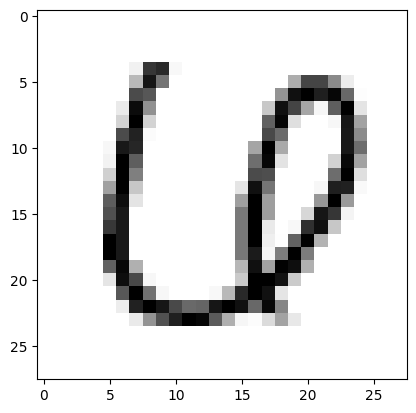

y = 6, predicted=0


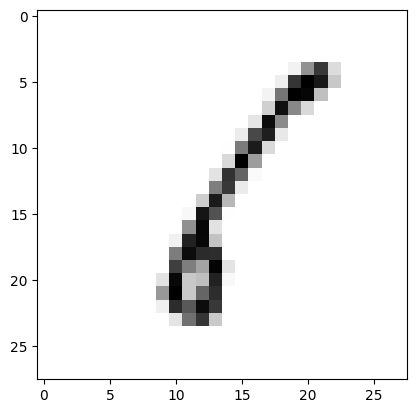

y = 6, predicted=1


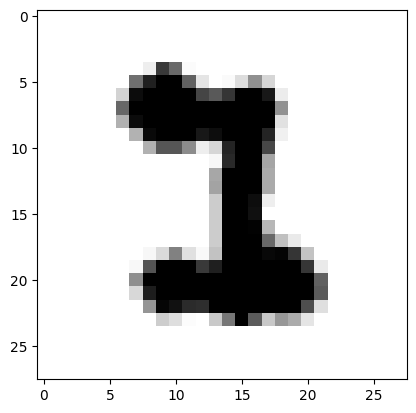

y = 1, predicted=2


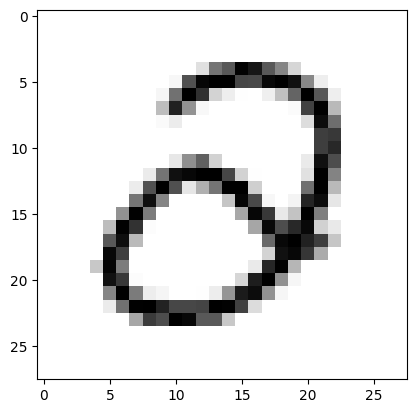

y = 2, predicted=0


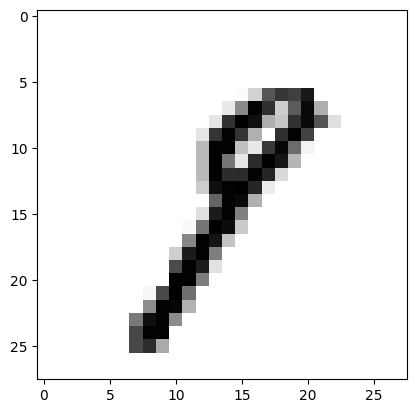

y = 9, predicted=8


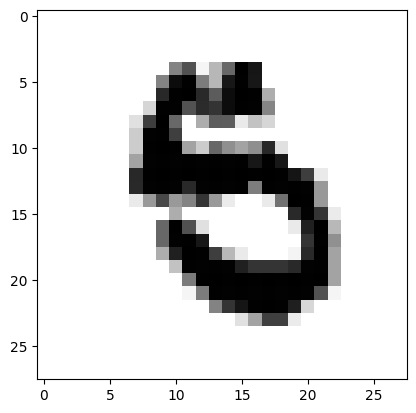

y = 5, predicted=6


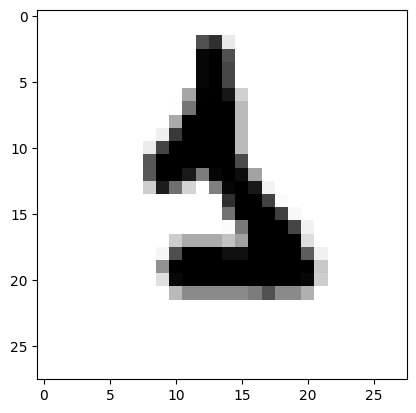

y = 1, predicted=5


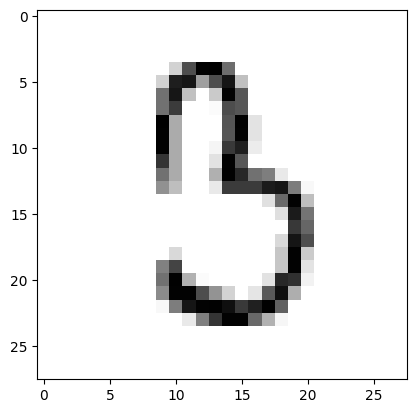

y = 3, predicted=5


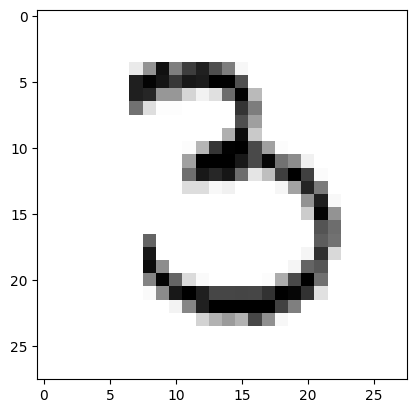

y = 3, predicted=2


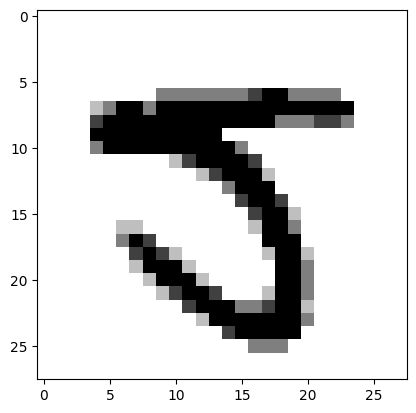

y = 5, predicted=3


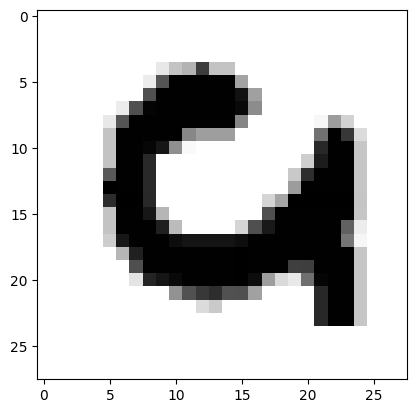

y = 9, predicted=6


y = 1, predicted=0


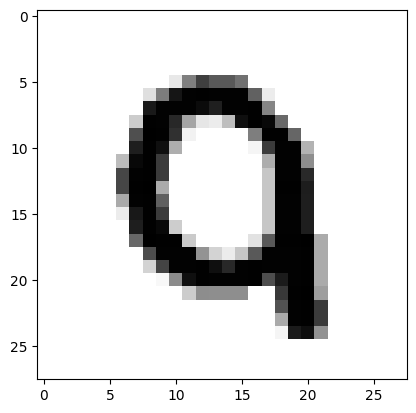

y = 9, predicted=0


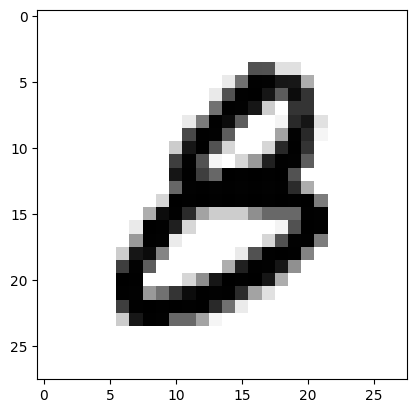

y = 8, predicted=6


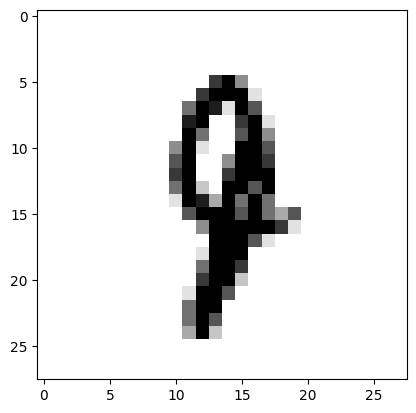

y = 9, predicted=4


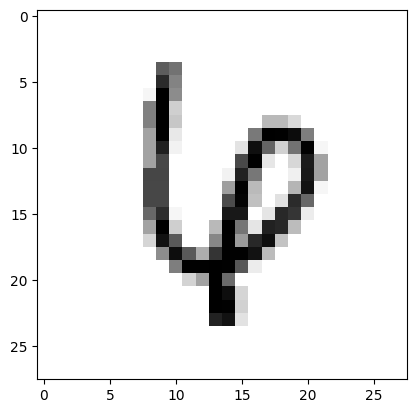

y = 6, predicted=4


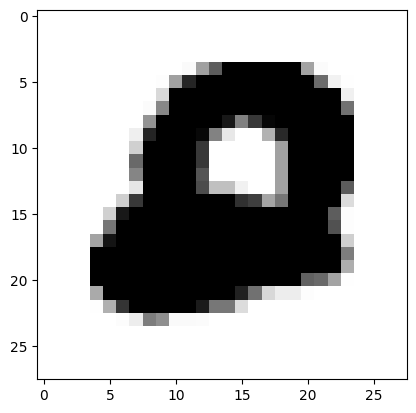

y = 2, predicted=6


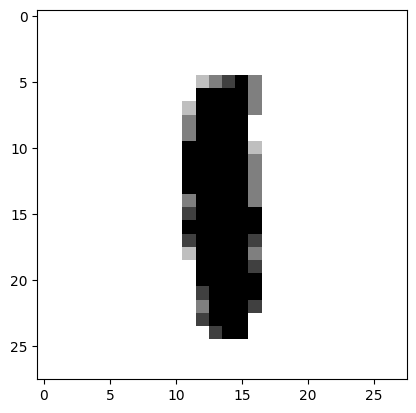

y = 1, predicted=8


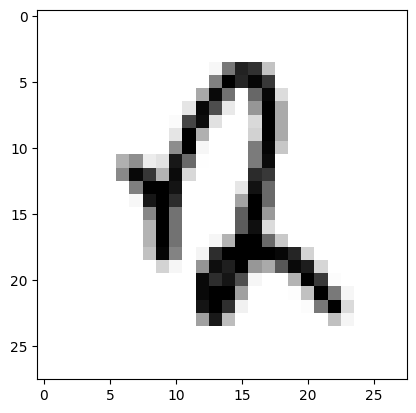

y = 2, predicted=4


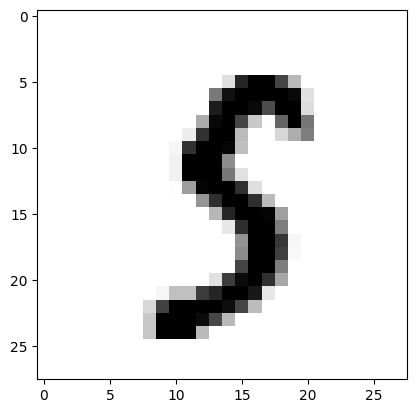

y = 5, predicted=3


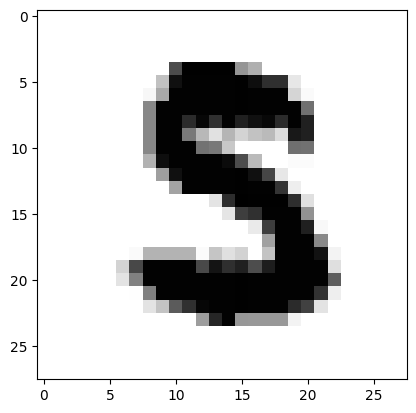

y = 5, predicted=3


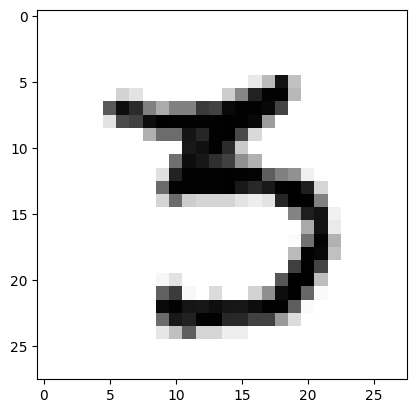

y = 3, predicted=5


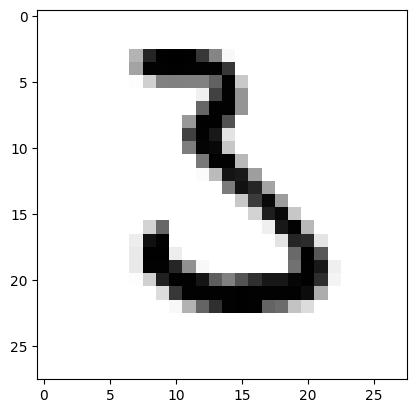

y = 3, predicted=2


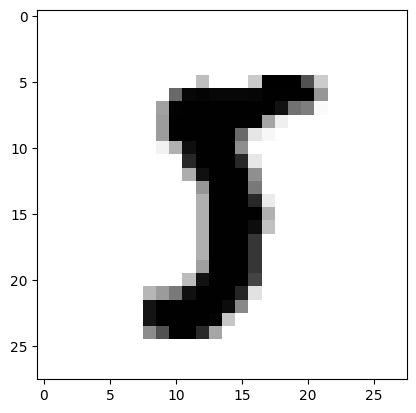

y = 5, predicted=1


y = 7, predicted=8


y = 2, predicted=8


y = 6, predicted=1


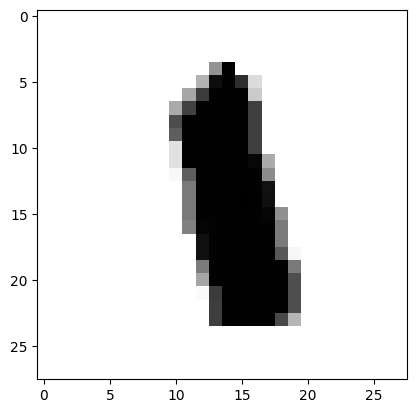

y = 1, predicted=8


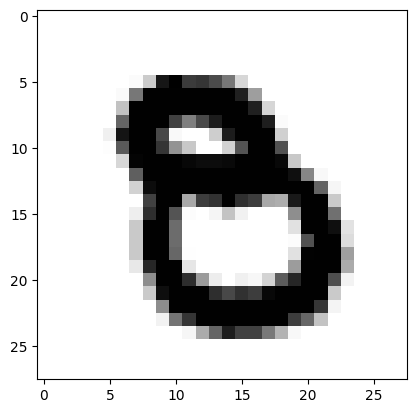

y = 8, predicted=3


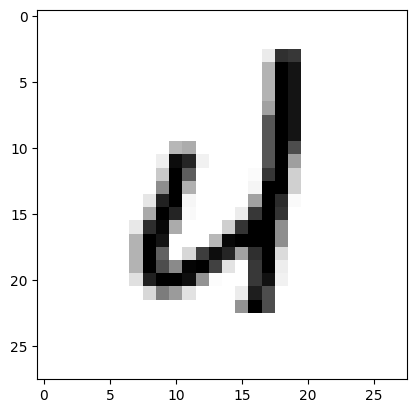

y = 4, predicted=0


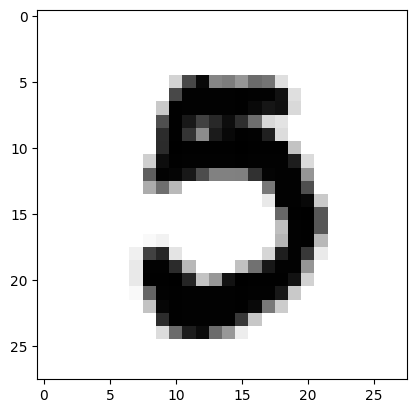

y = 5, predicted=3


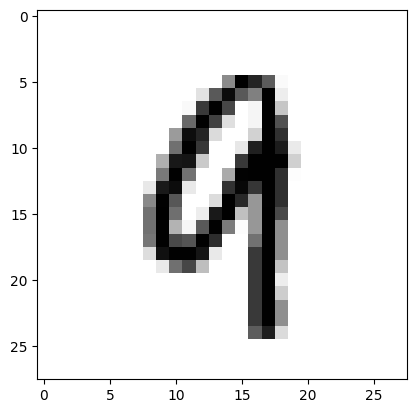

y = 9, predicted=4


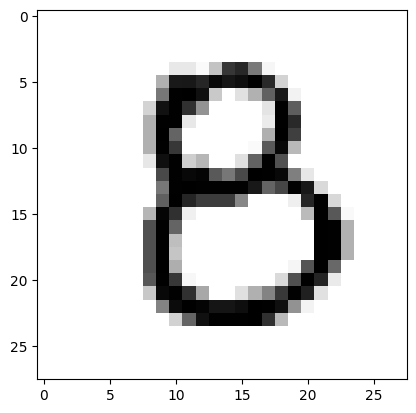

y = 8, predicted=6


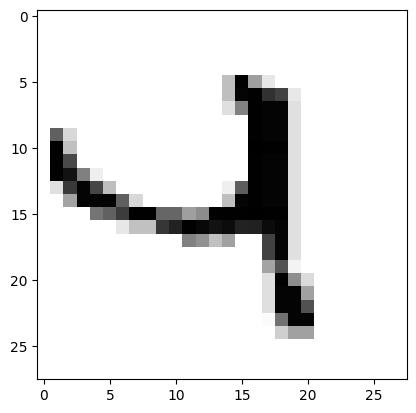

y = 4, predicted=9


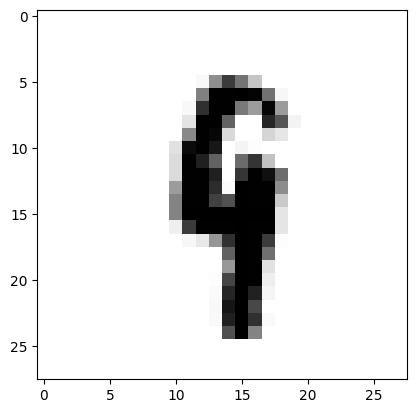

y = 9, predicted=4


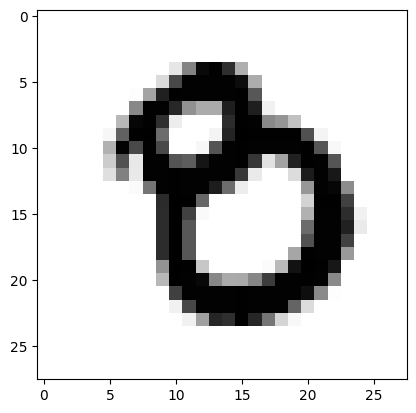

y = 8, predicted=0


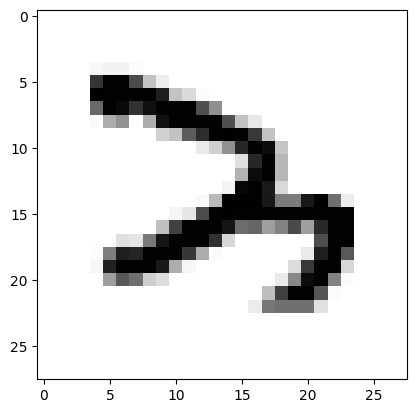

y = 3, predicted=2


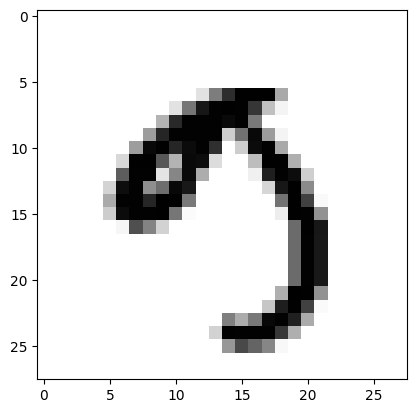

y = 9, predicted=0


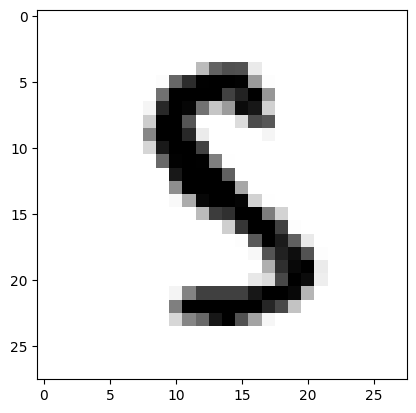

y = 5, predicted=9


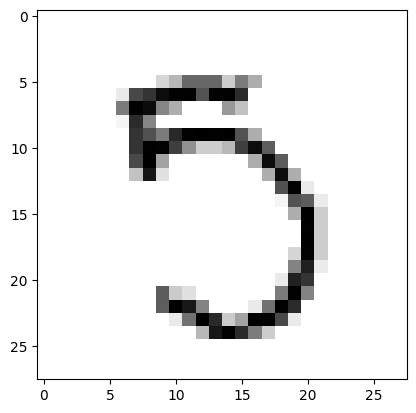

y = 5, predicted=3


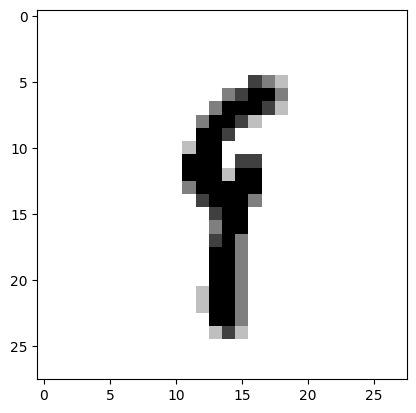

y = 9, predicted=0


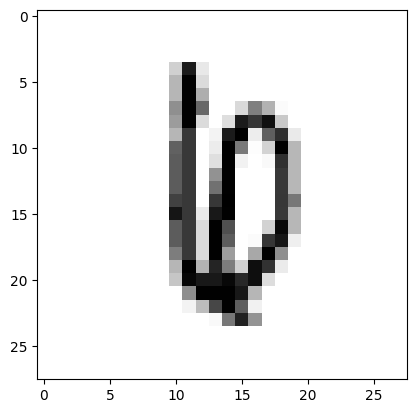

y = 6, predicted=0


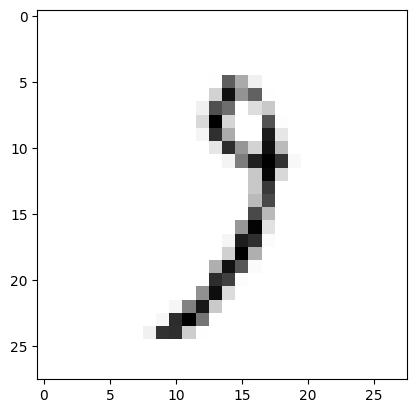

y = 9, predicted=7


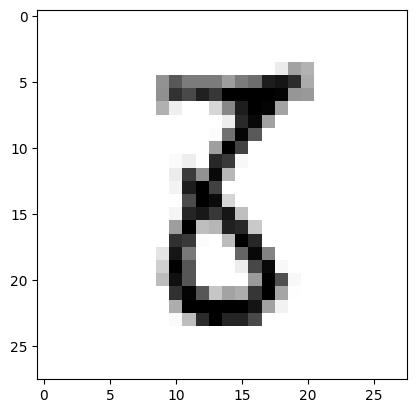

y = 8, predicted=6


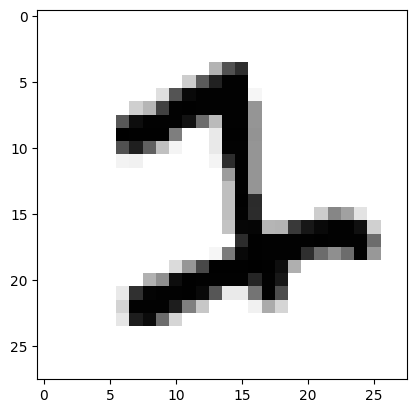

y = 1, predicted=2


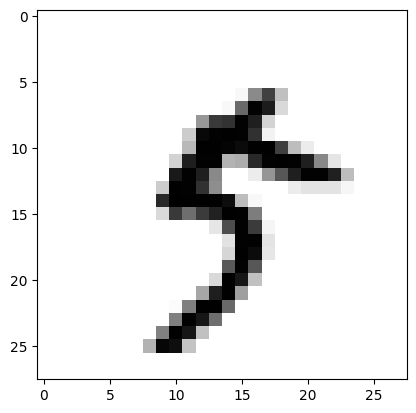

y = 5, predicted=0


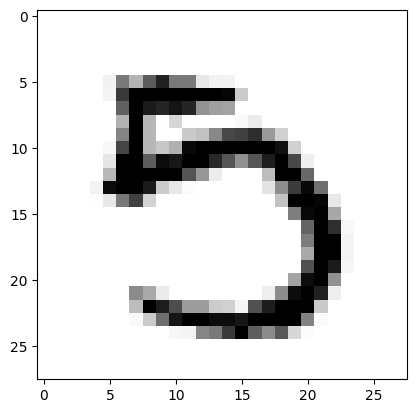

y = 5, predicted=3


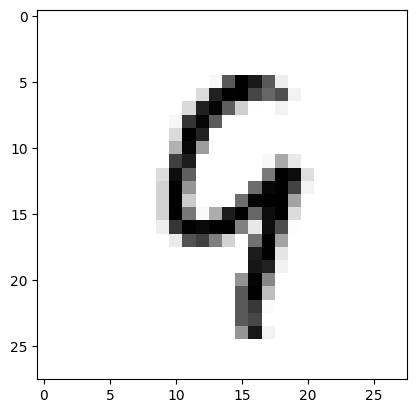

y = 9, predicted=4


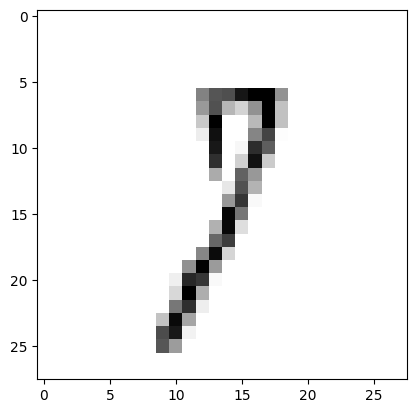

y = 7, predicted=9


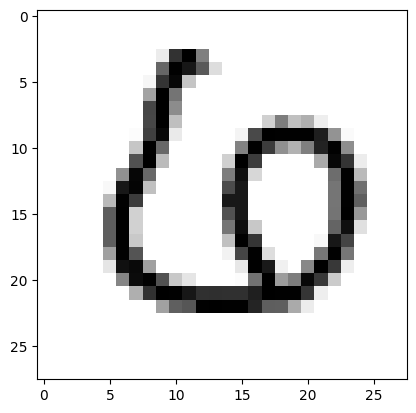

y = 6, predicted=0


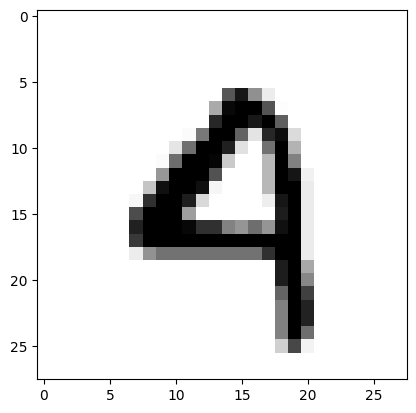

y = 4, predicted=9


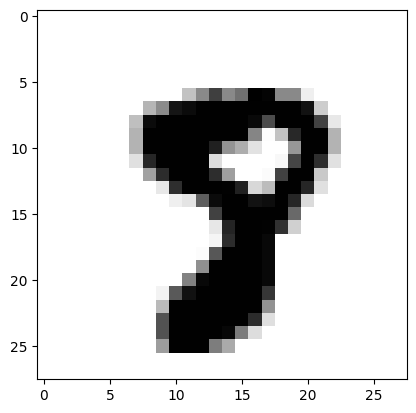

y = 8, predicted=3


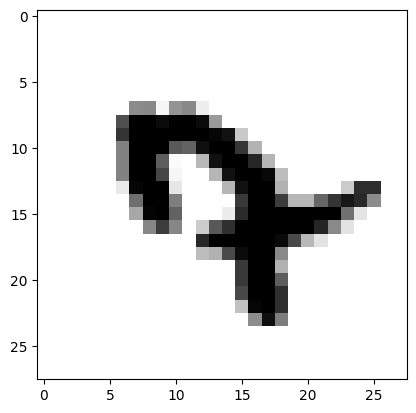

y = 7, predicted=4


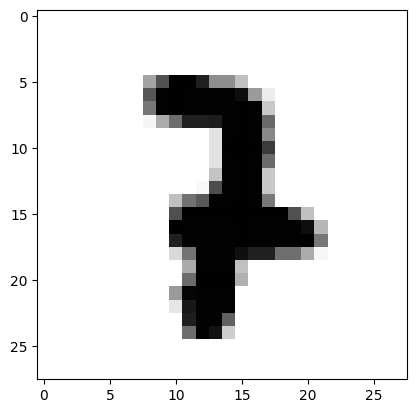

y = 7, predicted=3


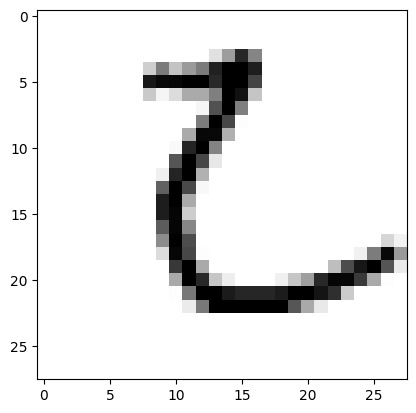

y = 2, predicted=6


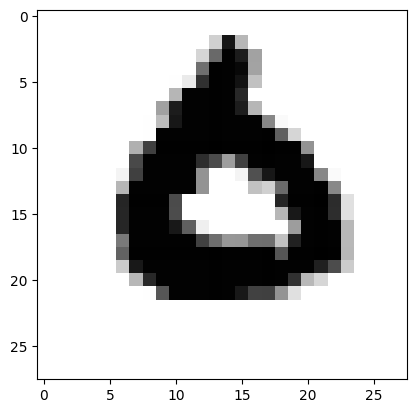

y = 6, predicted=0


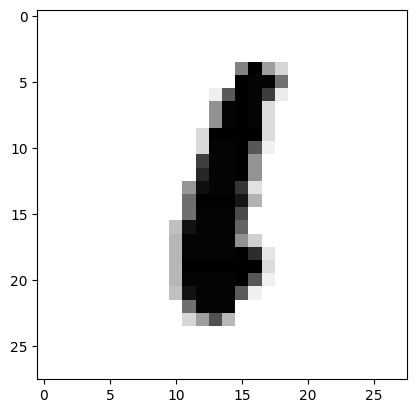

y = 1, predicted=0


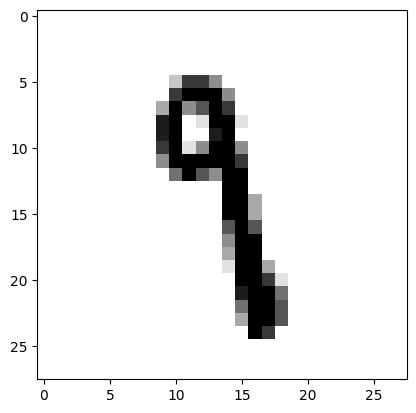

y = 9, predicted=1


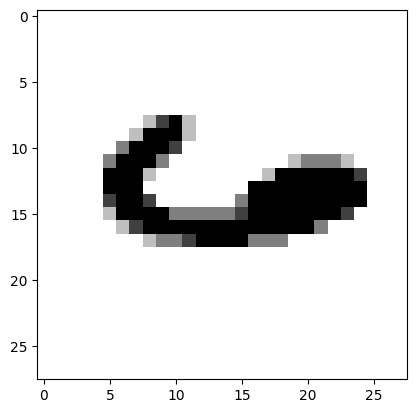

y = 6, predicted=4


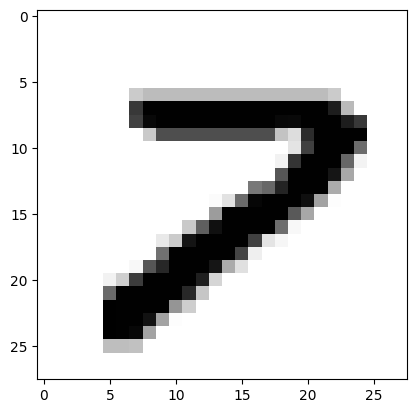

y = 7, predicted=3


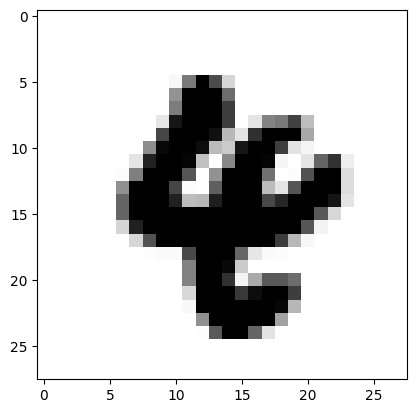

y = 4, predicted=8


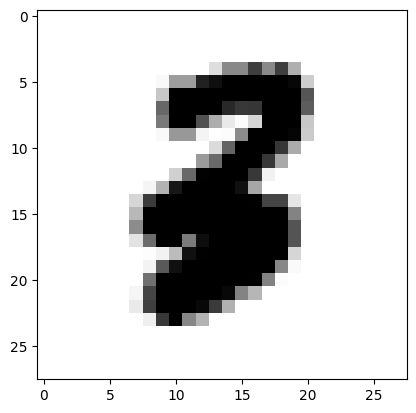

y = 3, predicted=2


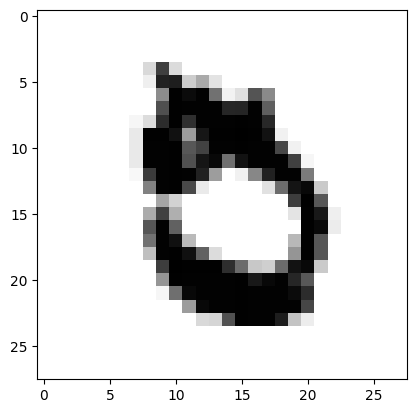

y = 5, predicted=0


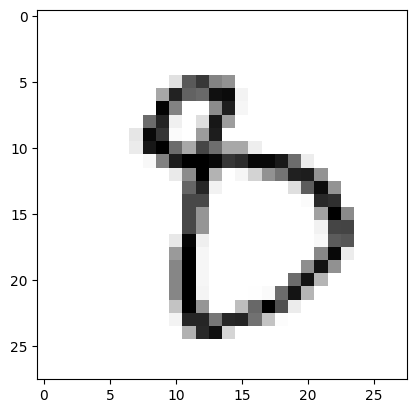

y = 8, predicted=0


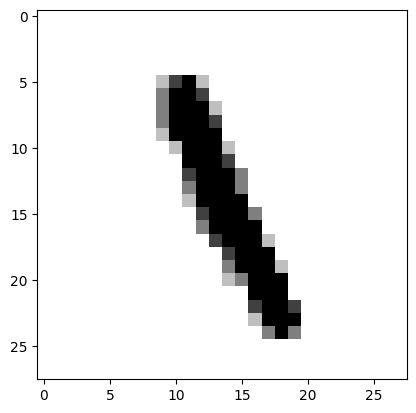

y = 1, predicted=8


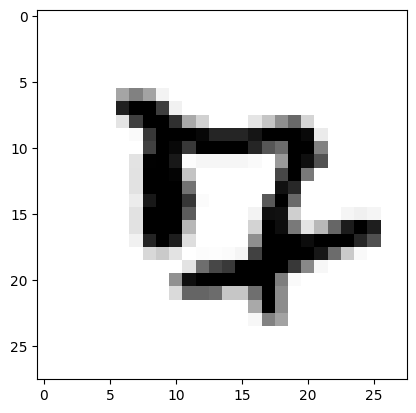

y = 7, predicted=9


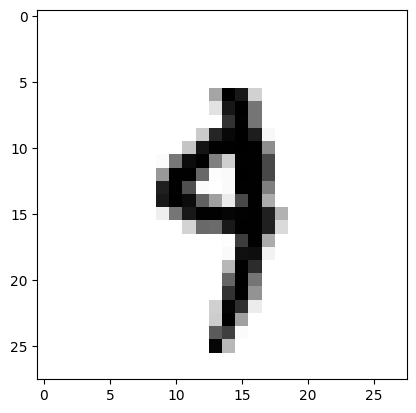

y = 4, predicted=9


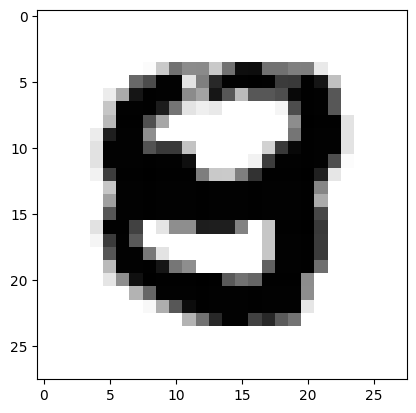

y = 8, predicted=9


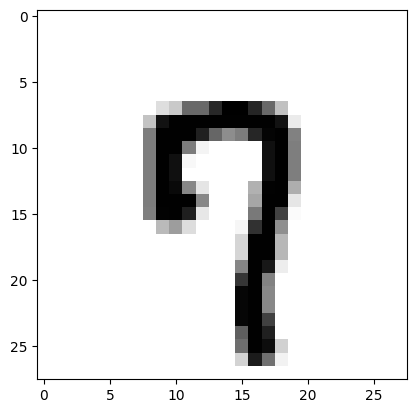

y = 7, predicted=9


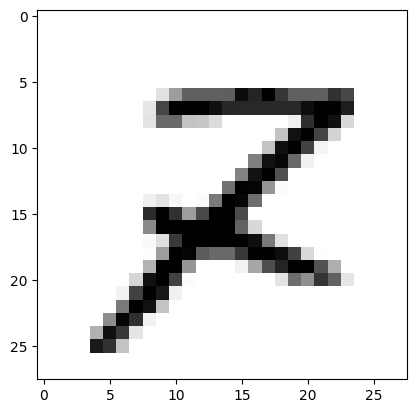

y = 7, predicted=9


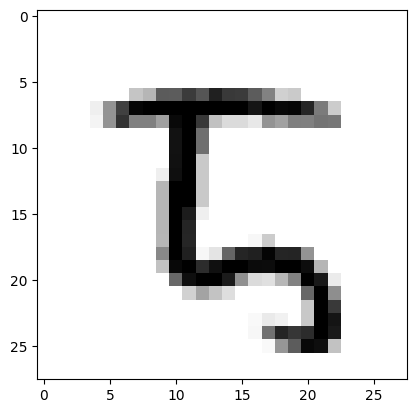

y = 5, predicted=2


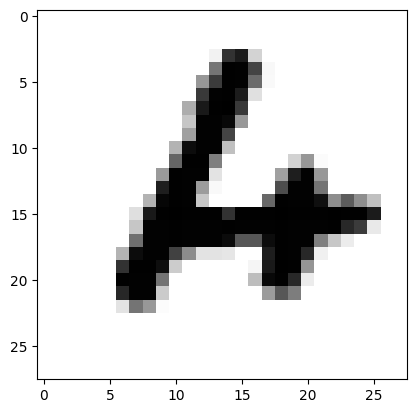

y = 4, predicted=6


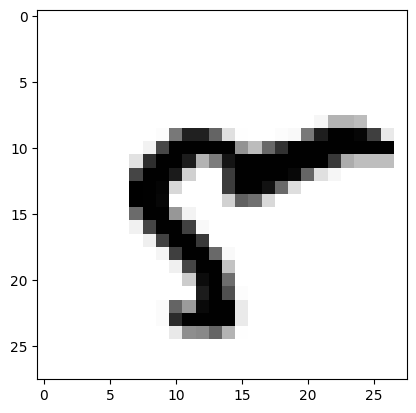

y = 5, predicted=8


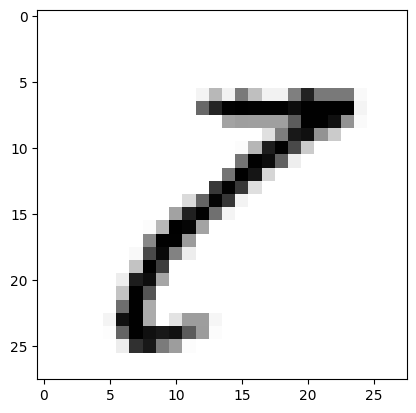

y = 7, predicted=8


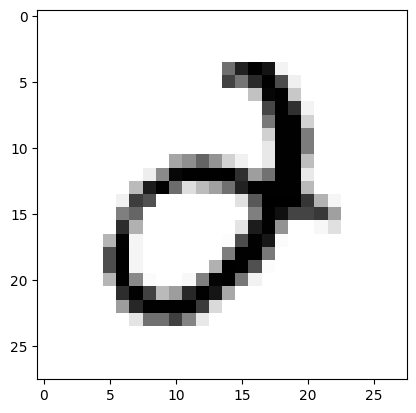

y = 2, predicted=3


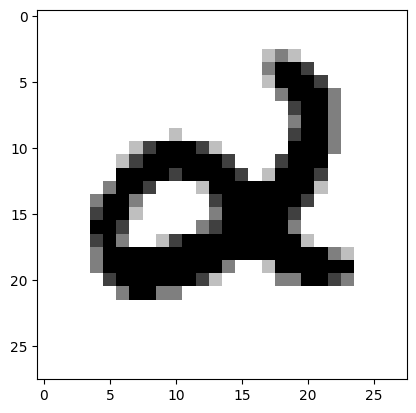

y = 2, predicted=1


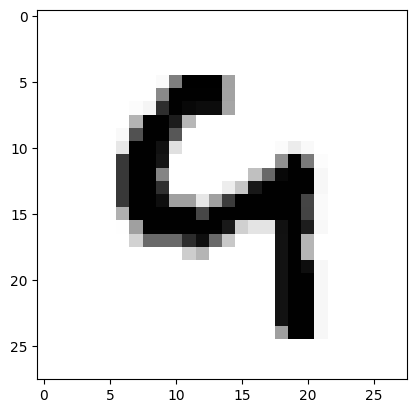

y = 9, predicted=4


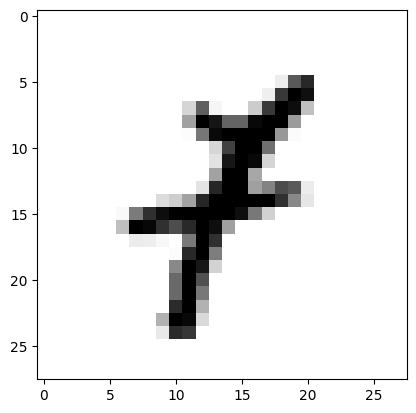

y = 7, predicted=8


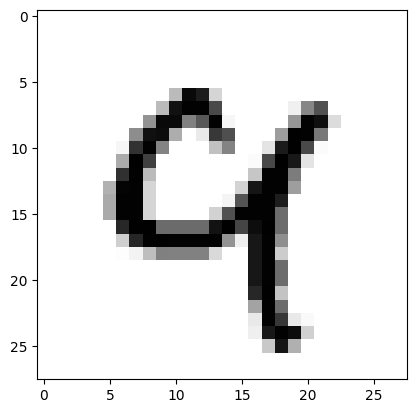

y = 9, predicted=4


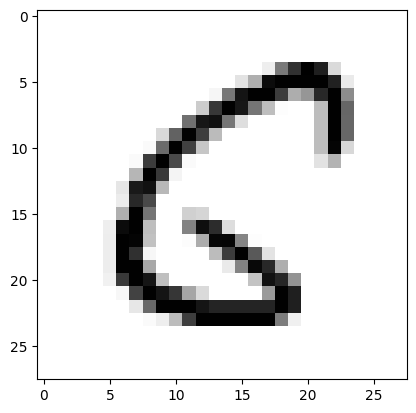

y = 6, predicted=0


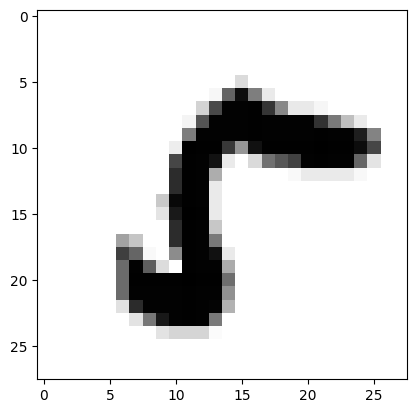

y = 5, predicted=0


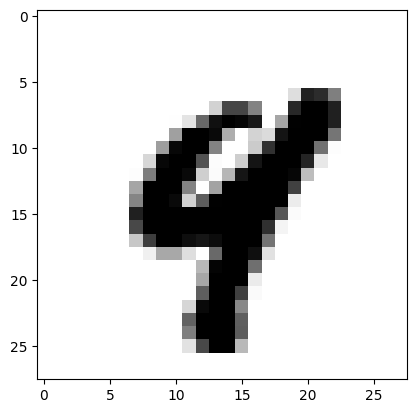

y = 9, predicted=4


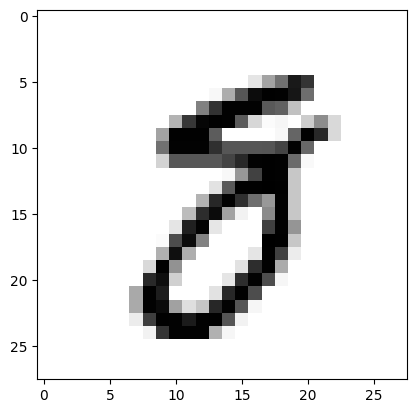

y = 8, predicted=3


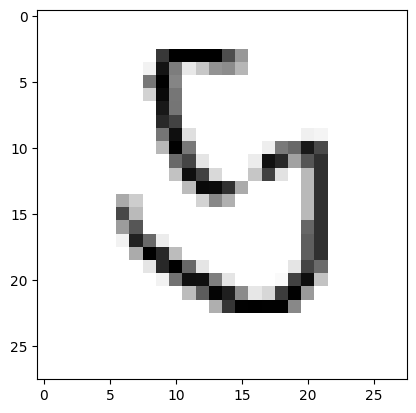

y = 5, predicted=6


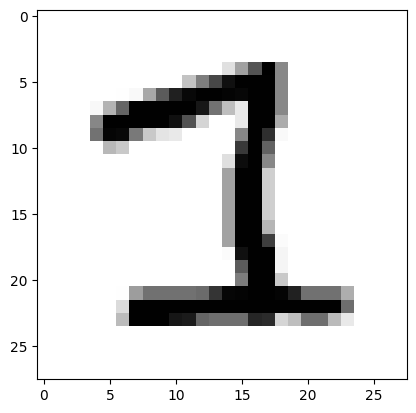

y = 1, predicted=3


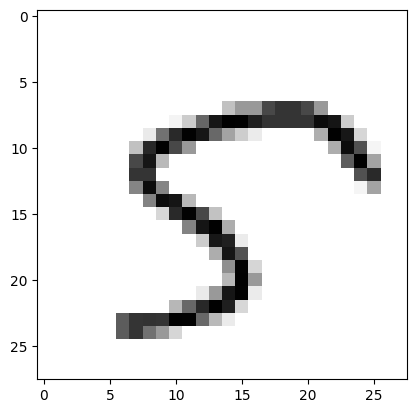

y = 5, predicted=0


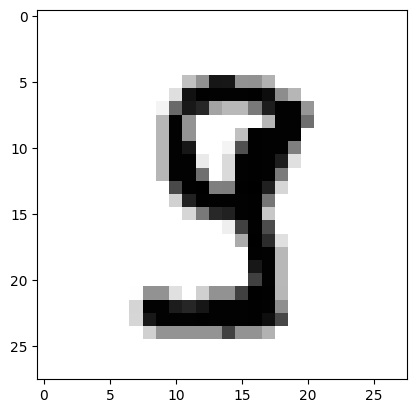

y = 9, predicted=8


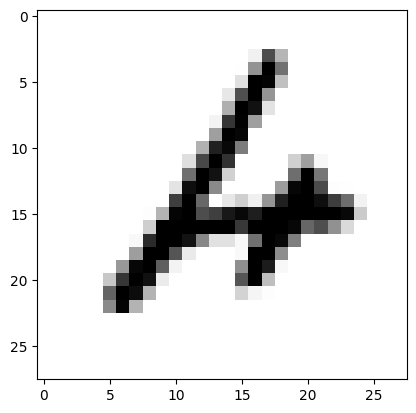

y = 4, predicted=6


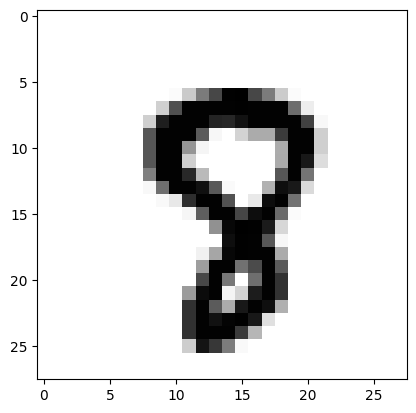

y = 8, predicted=3


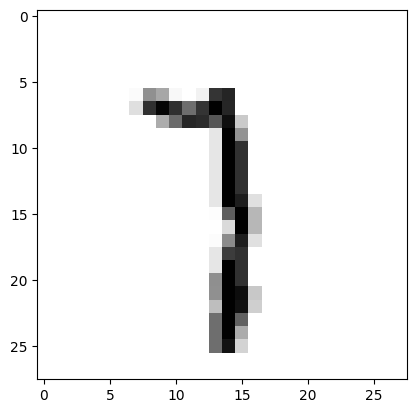

y = 7, predicted=1


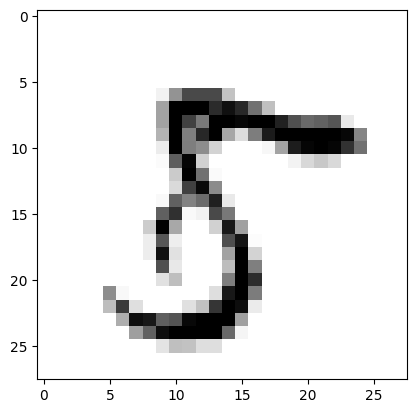

y = 5, predicted=0


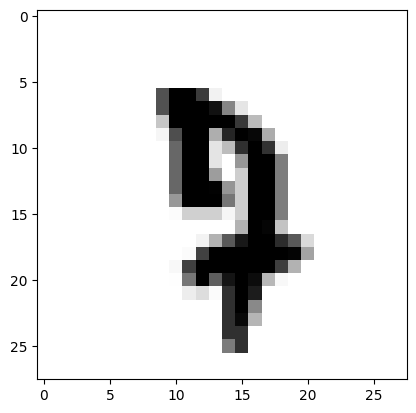

y = 7, predicted=9


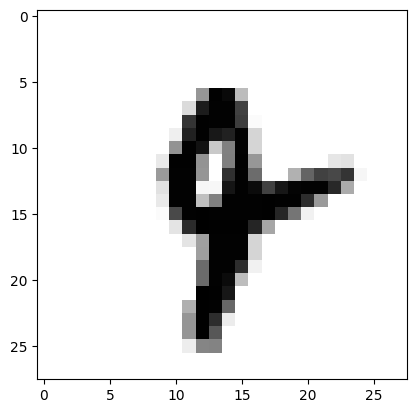

y = 4, predicted=8


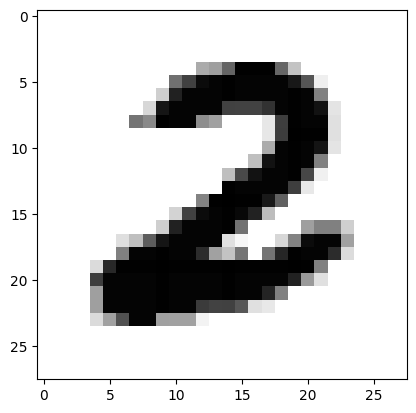

y = 2, predicted=6


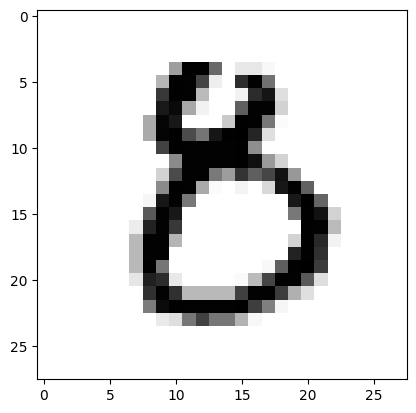

y = 8, predicted=0


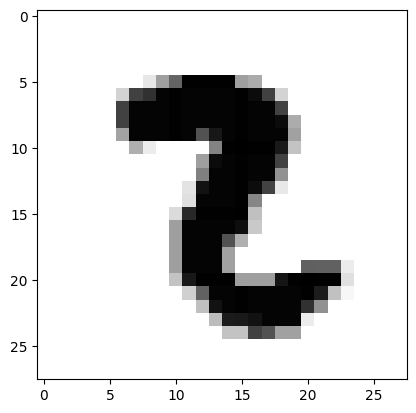

y = 2, predicted=0


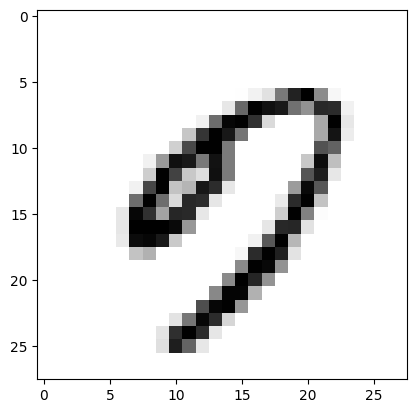

y = 9, predicted=0


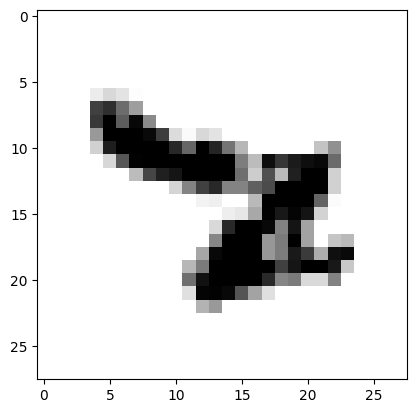

y = 2, predicted=7


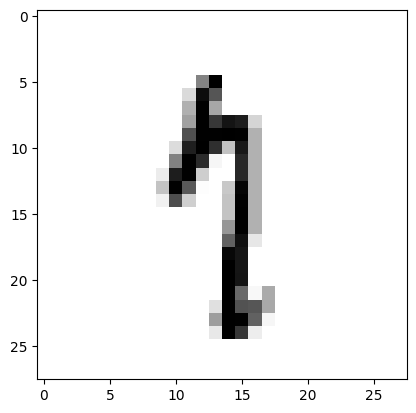

y = 1, predicted=0


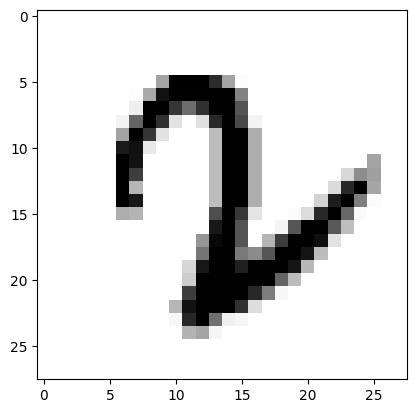

y = 2, predicted=0


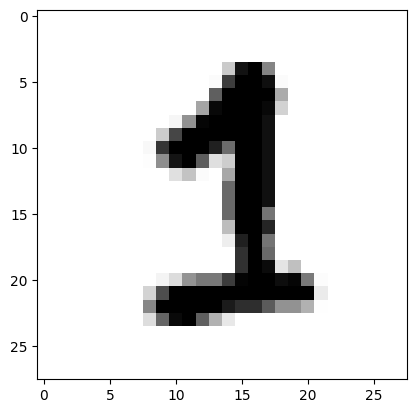

y = 1, predicted=2


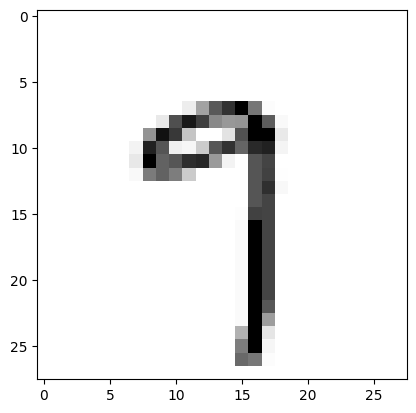

y = 9, predicted=7


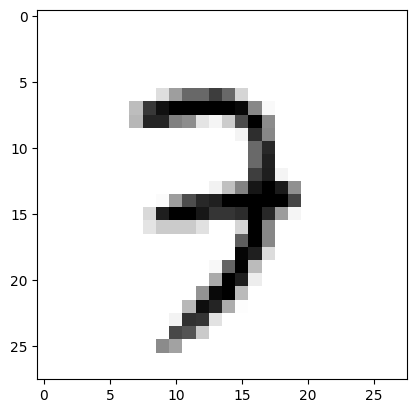

y = 7, predicted=3


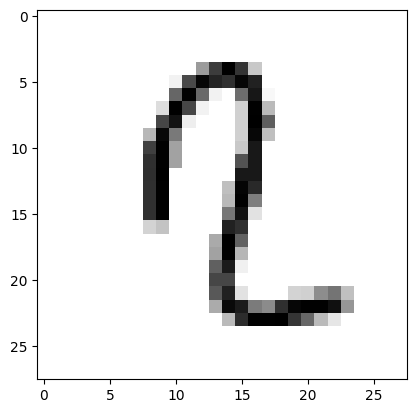

y = 2, predicted=1


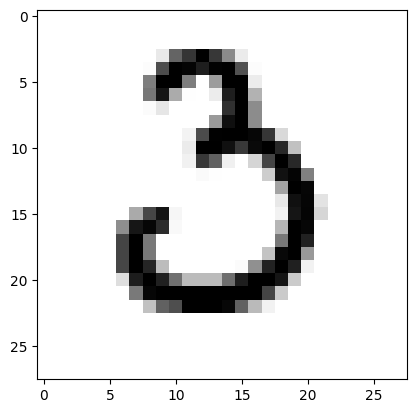

y = 3, predicted=2


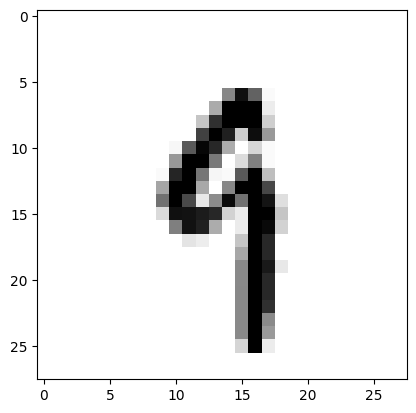

y = 9, predicted=4


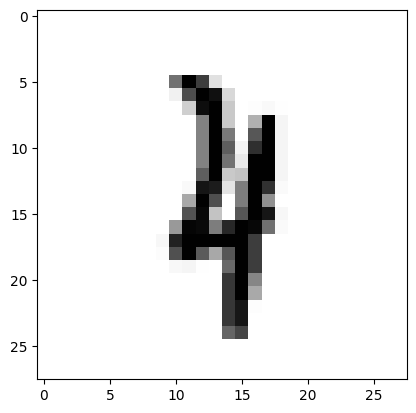

y = 4, predicted=7


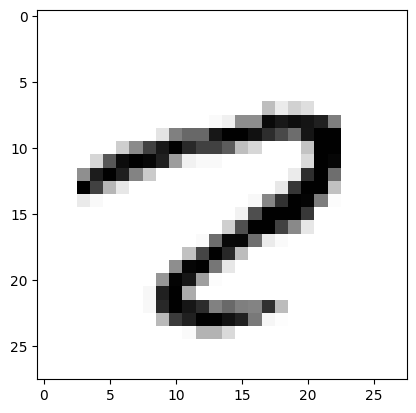

y = 2, predicted=1


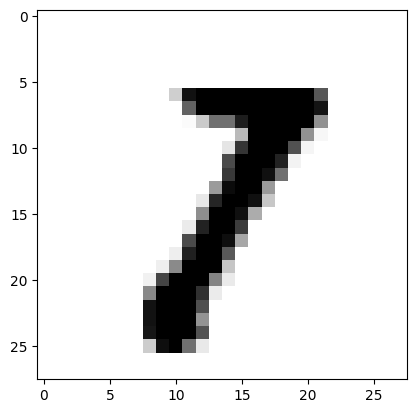

y = 7, predicted=1


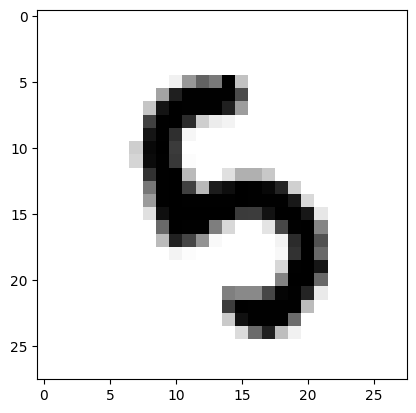

y = 5, predicted=6


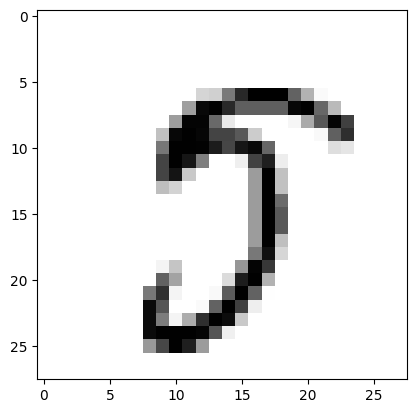

y = 5, predicted=7


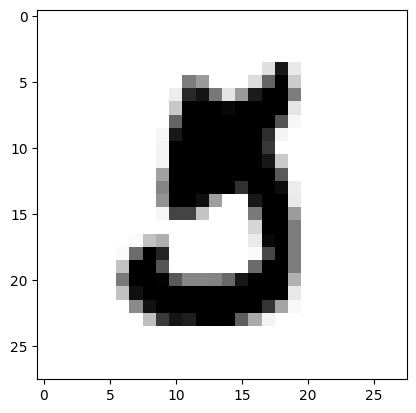

y = 5, predicted=0


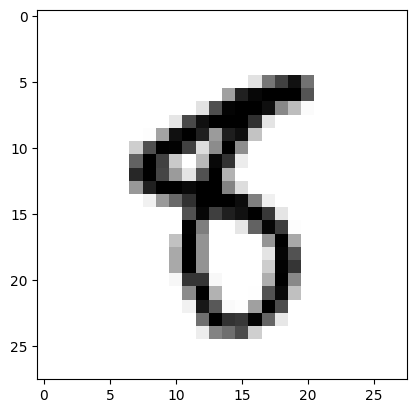

y = 8, predicted=6


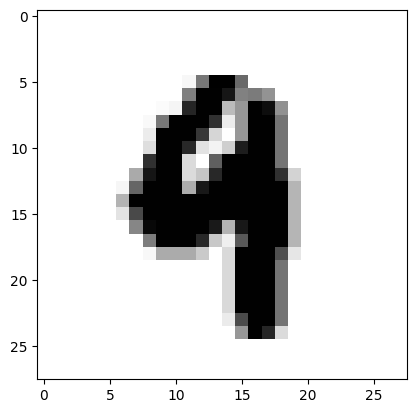

y = 9, predicted=4


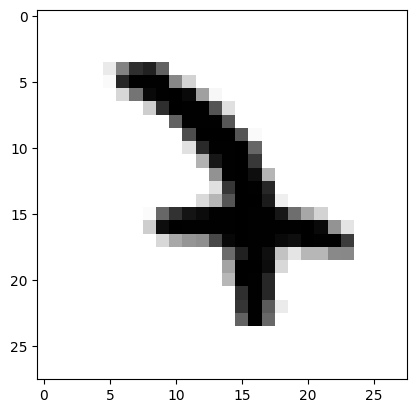

y = 7, predicted=9


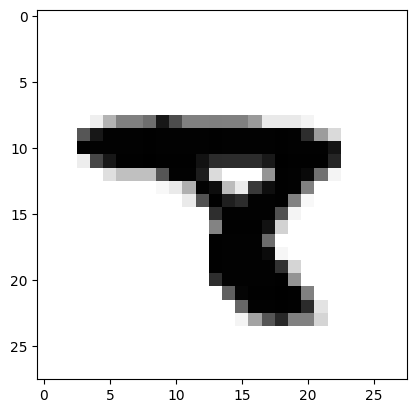

y = 8, predicted=7


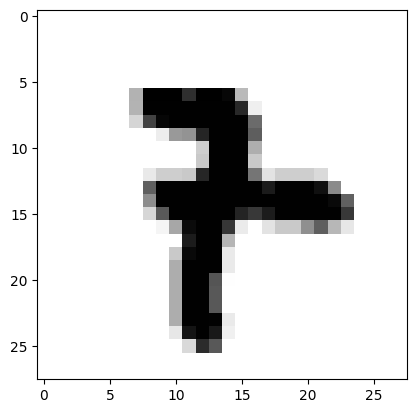

y = 7, predicted=8


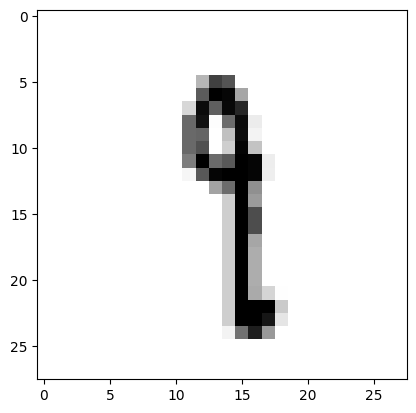

y = 9, predicted=1


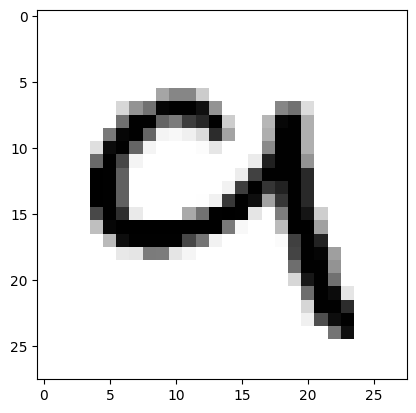

y = 9, predicted=4


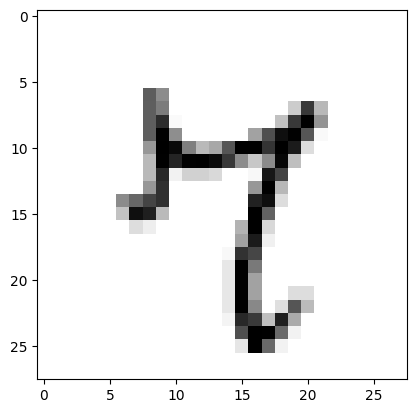

y = 7, predicted=4


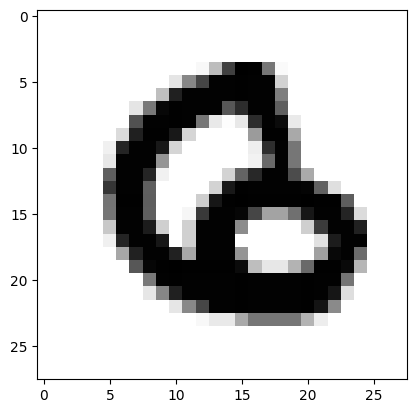

y = 6, predicted=0


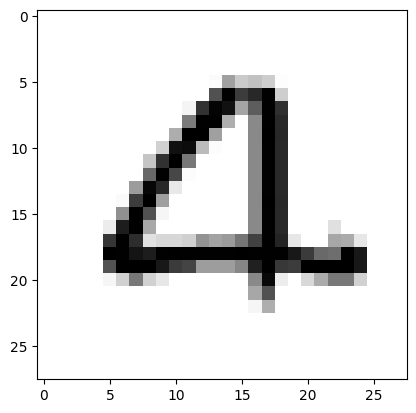

y = 4, predicted=0


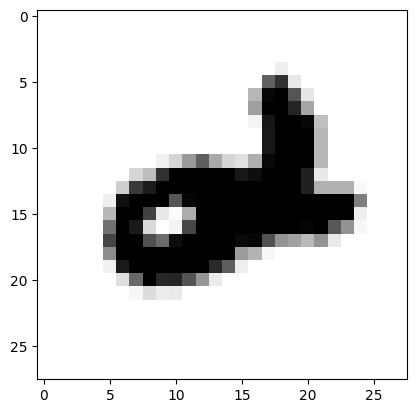

y = 2, predicted=0


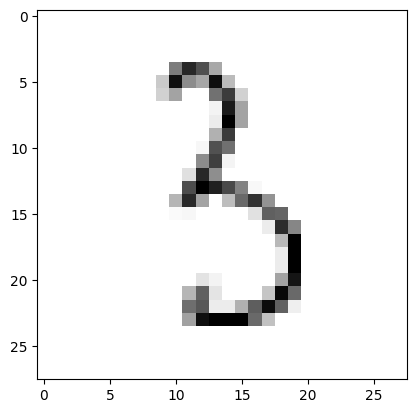

y = 3, predicted=5


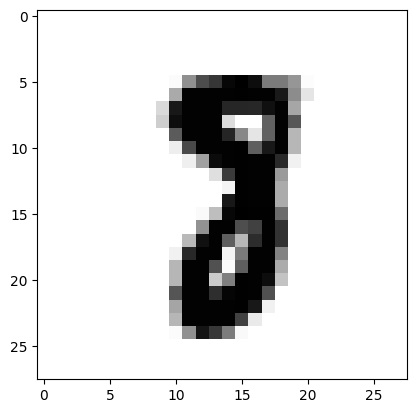

y = 8, predicted=9


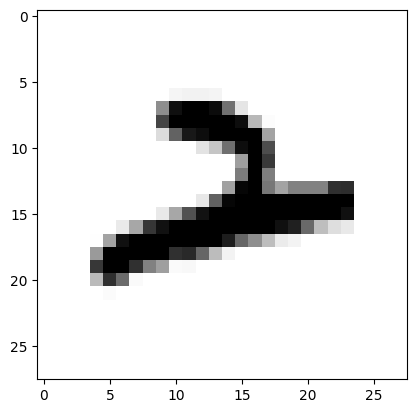

y = 2, predicted=7


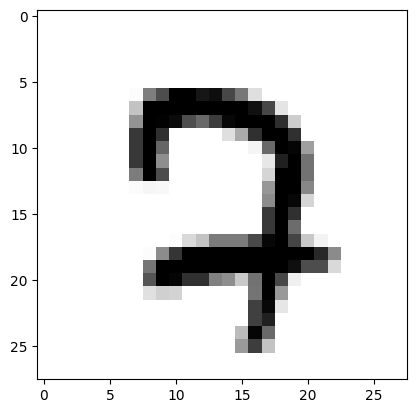

y = 7, predicted=2


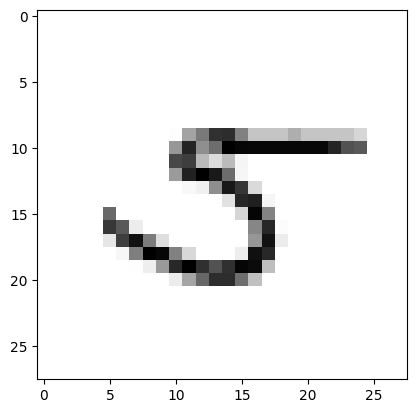

y = 5, predicted=3


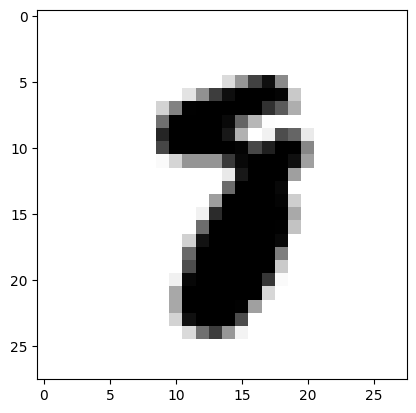

y = 8, predicted=3


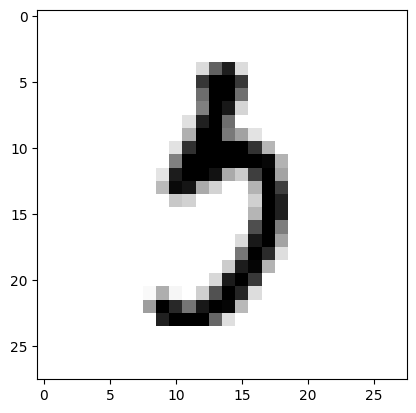

y = 3, predicted=5


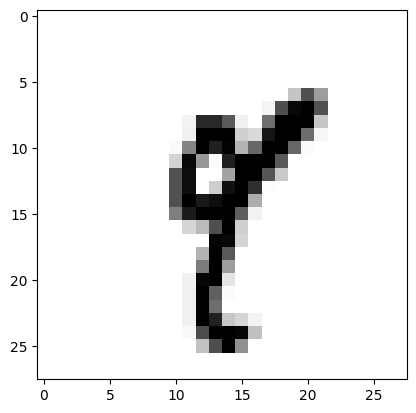

y = 9, predicted=4


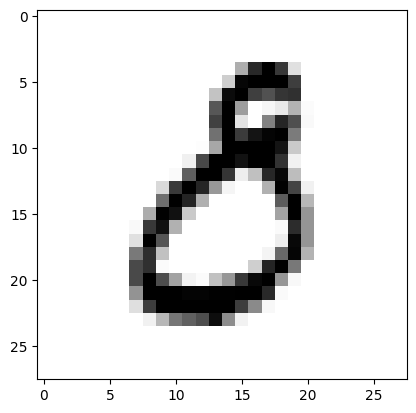

y = 8, predicted=0


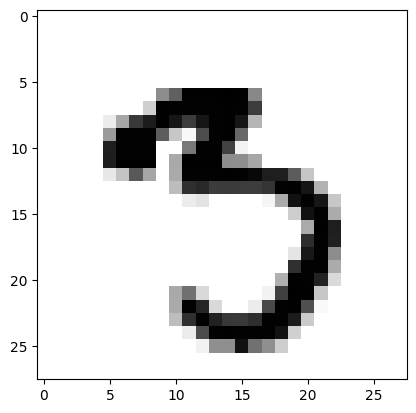

y = 3, predicted=5


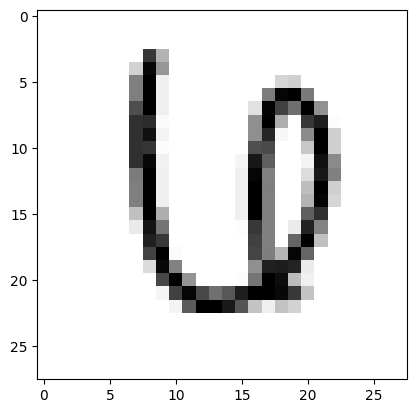

y = 6, predicted=0


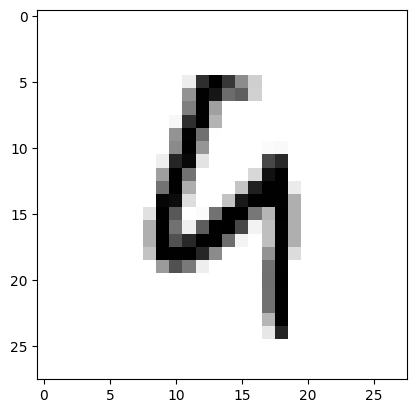

y = 9, predicted=6


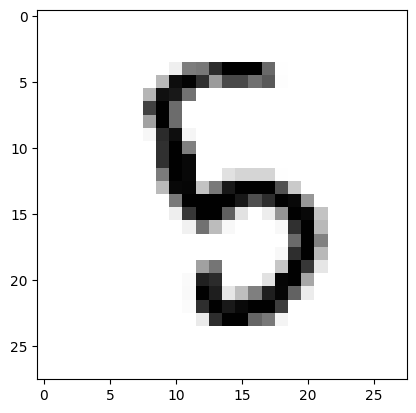

y = 5, predicted=6


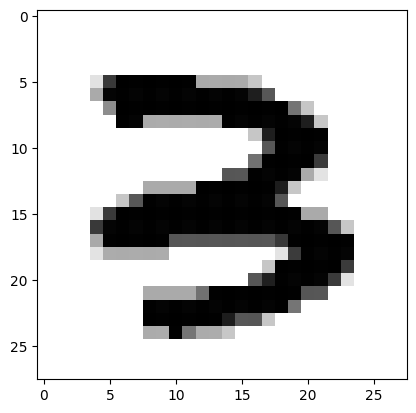

y = 3, predicted=2


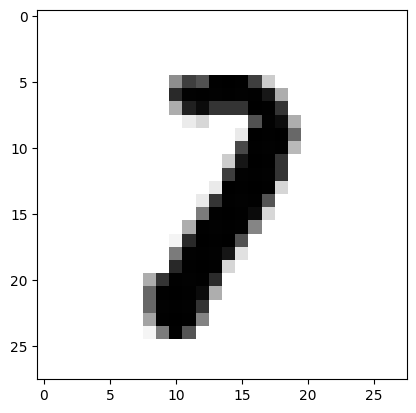

y = 7, predicted=1


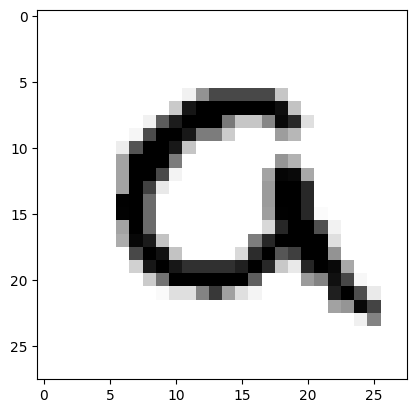

y = 9, predicted=0


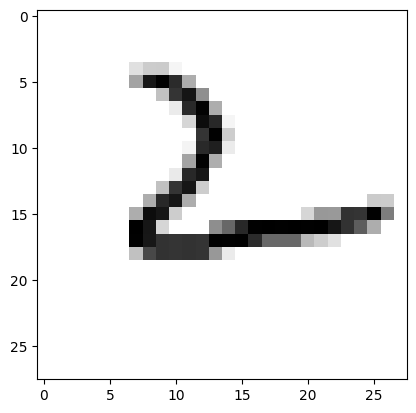

y = 2, predicted=4


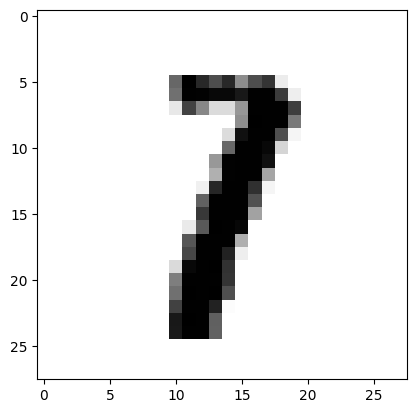

y = 7, predicted=1


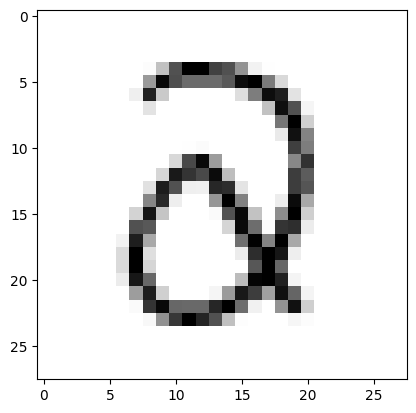

y = 2, predicted=0


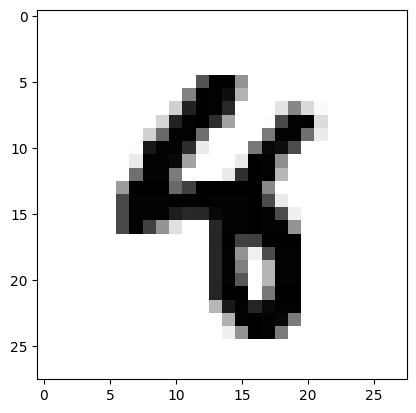

y = 8, predicted=4


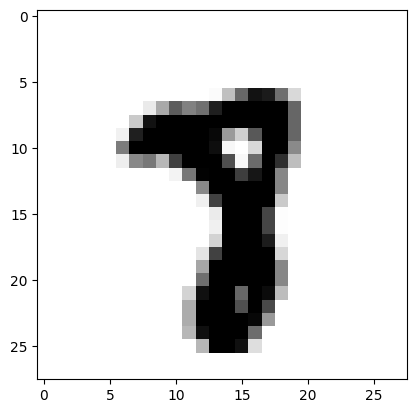

y = 8, predicted=3


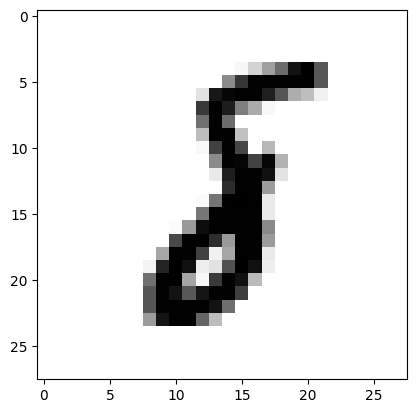

y = 8, predicted=2


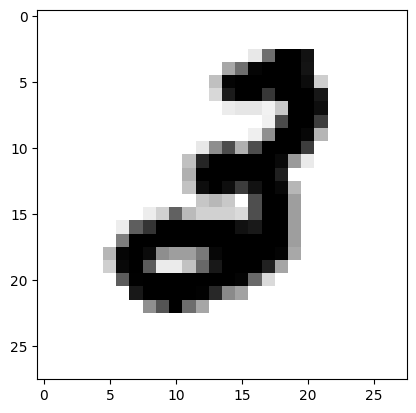

y = 3, predicted=6


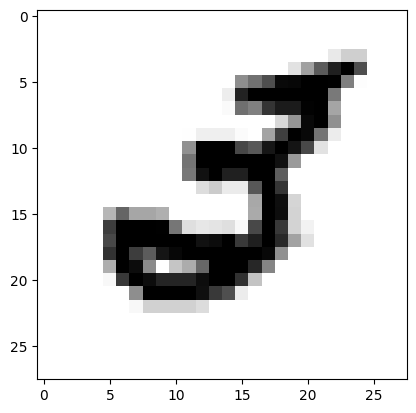

y = 3, predicted=5


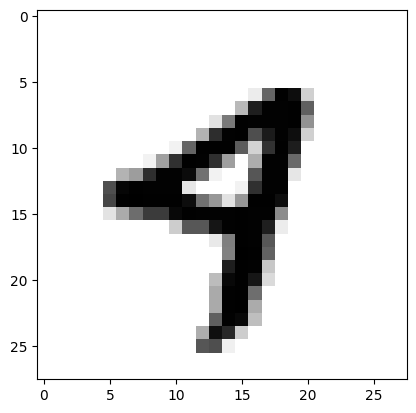

y = 4, predicted=9


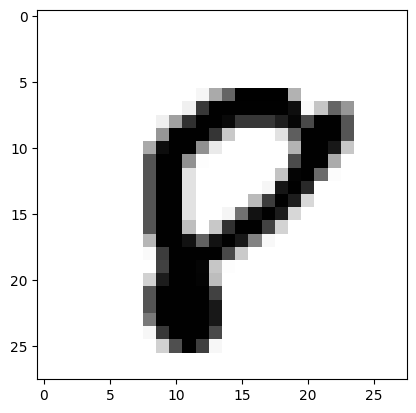

y = 8, predicted=0


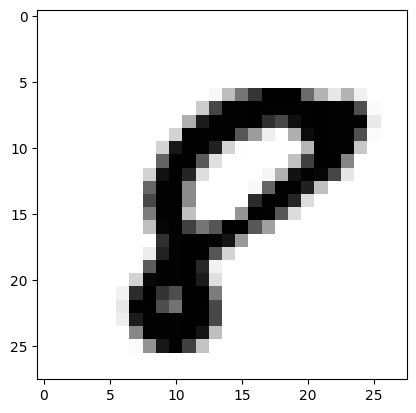

y = 8, predicted=0


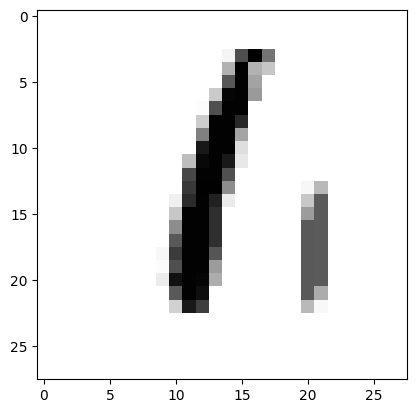

y = 1, predicted=0


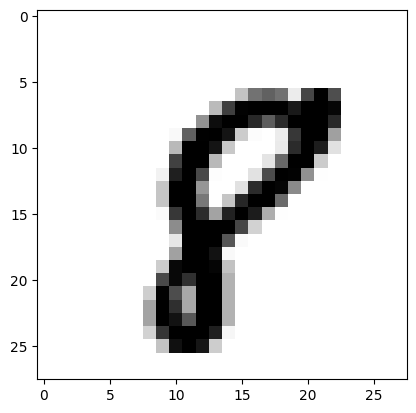

y = 8, predicted=4


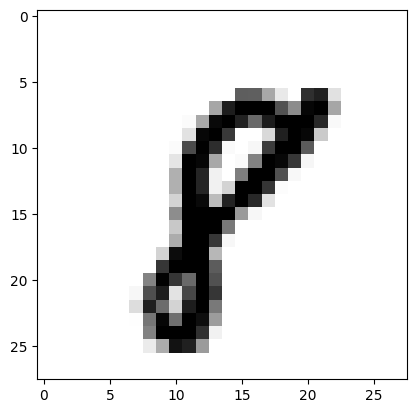

y = 8, predicted=4


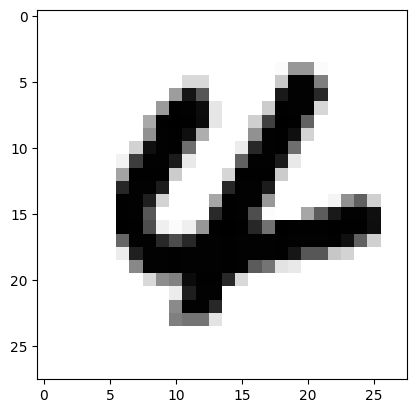

y = 4, predicted=6


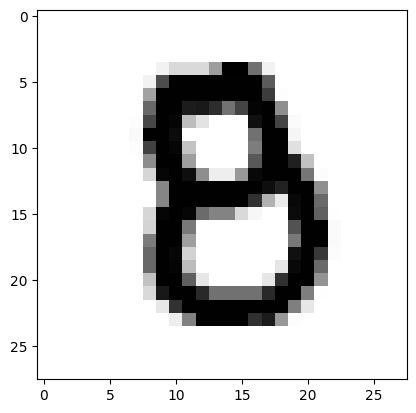

y = 8, predicted=0


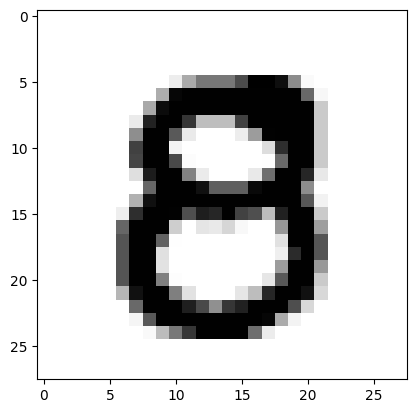

y = 8, predicted=0


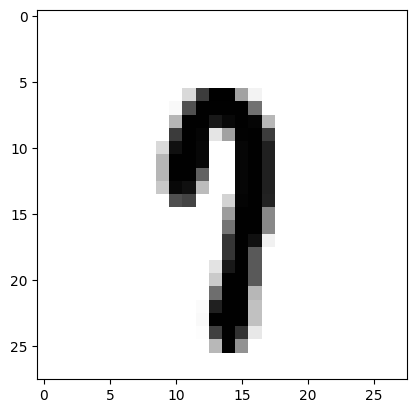

y = 7, predicted=9


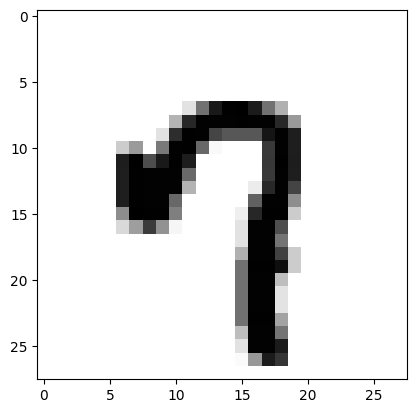

y = 7, predicted=9


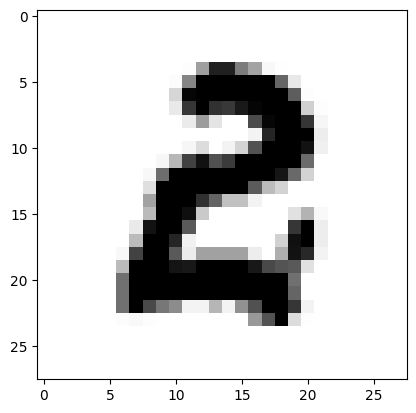

y = 2, predicted=6


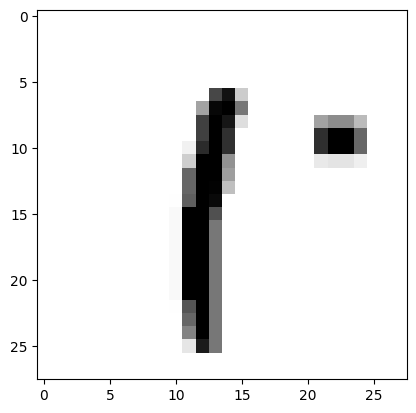

y = 1, predicted=0


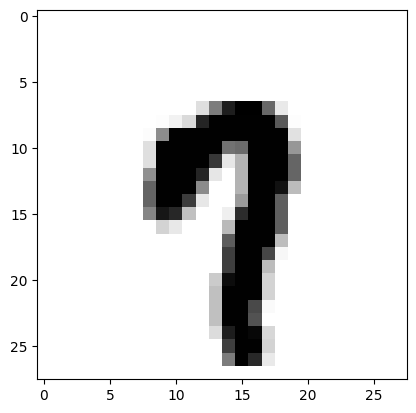

y = 7, predicted=9


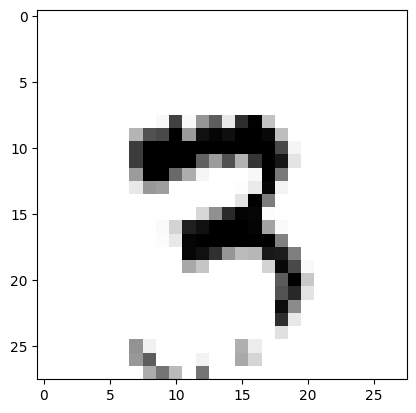

y = 3, predicted=7


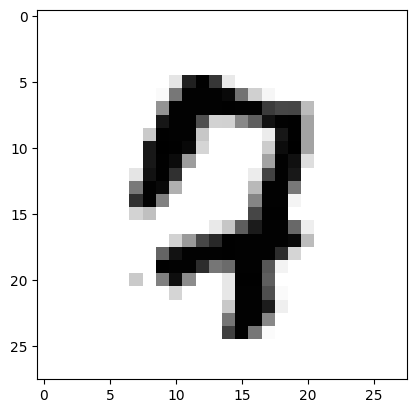

y = 7, predicted=9


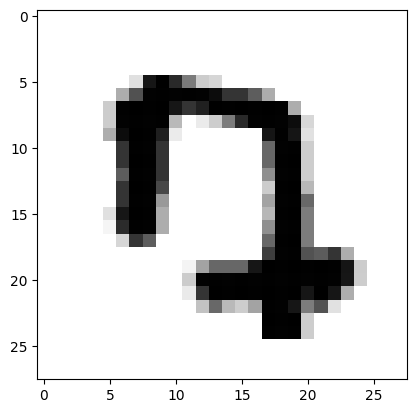

y = 7, predicted=9


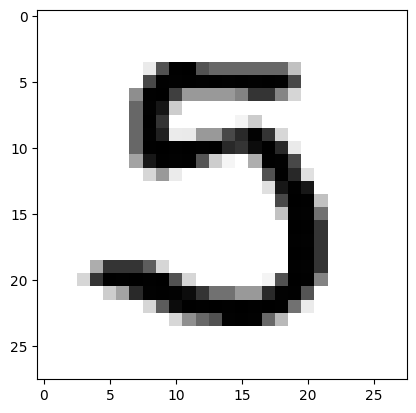

y = 5, predicted=3


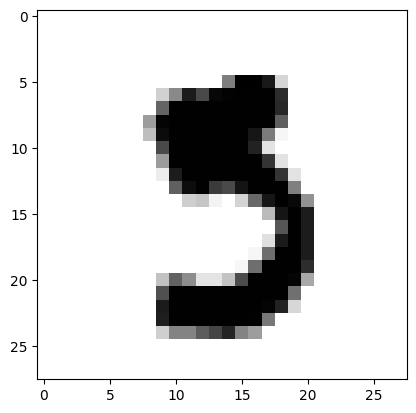

y = 5, predicted=3


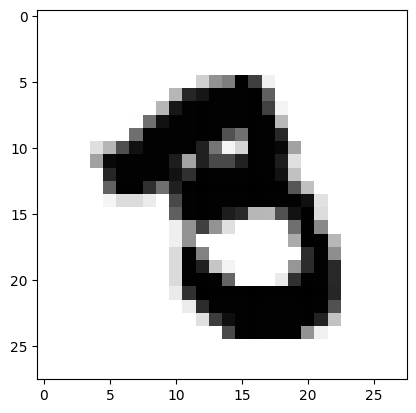

y = 3, predicted=8


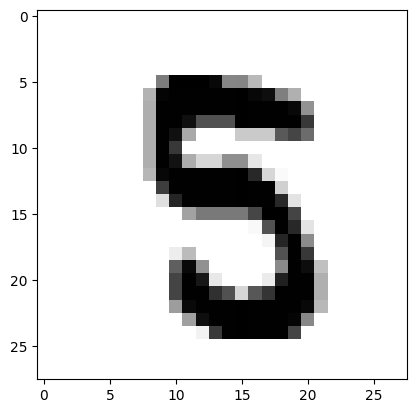

y = 5, predicted=3


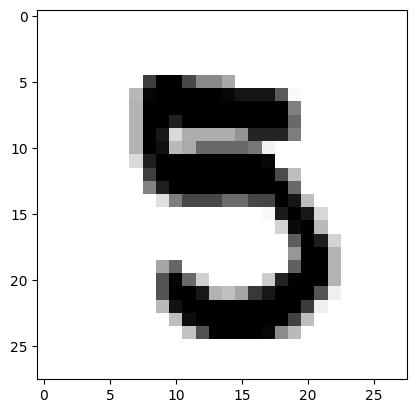

y = 5, predicted=3


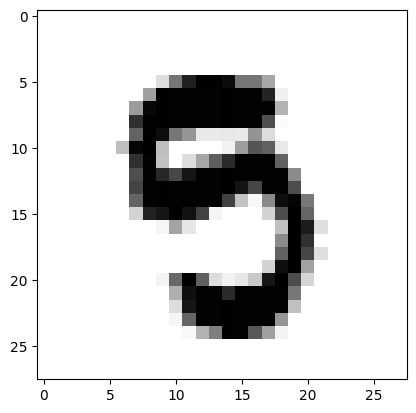

y = 5, predicted=3


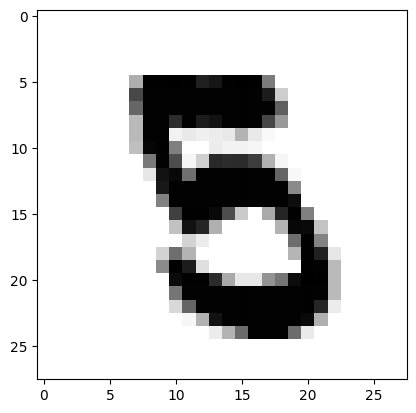

y = 5, predicted=3


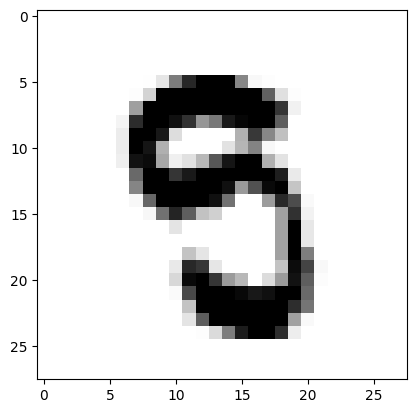

y = 5, predicted=3


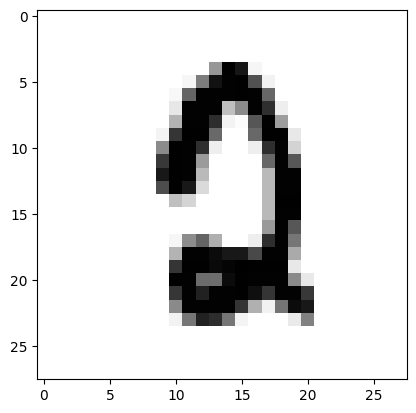

y = 2, predicted=0


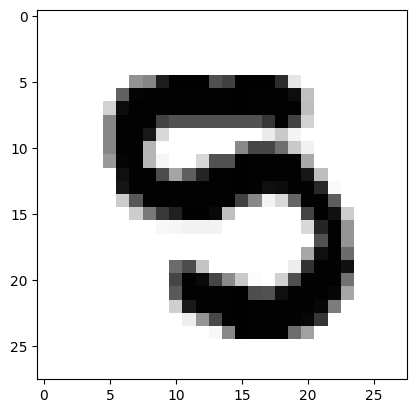

y = 5, predicted=3


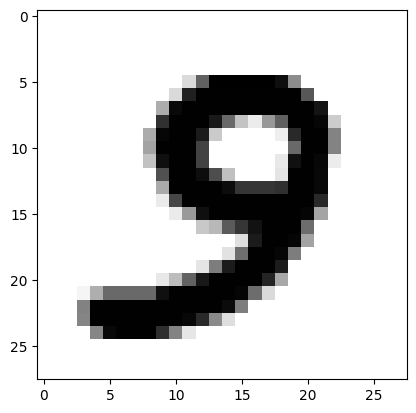

y = 9, predicted=3


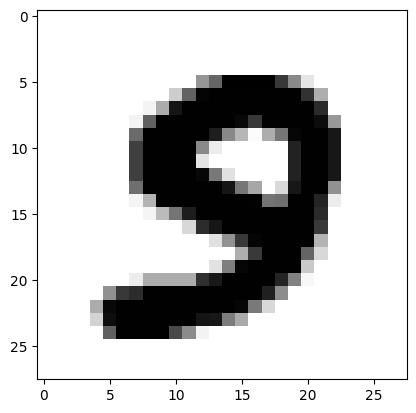

y = 9, predicted=3


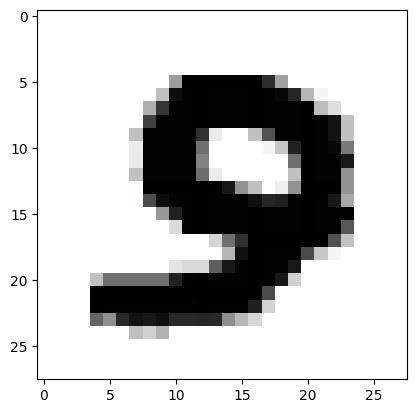

y = 9, predicted=3


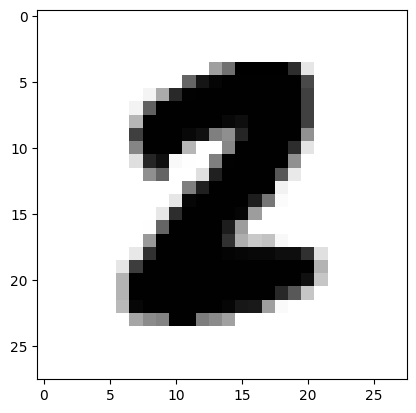

y = 2, predicted=8


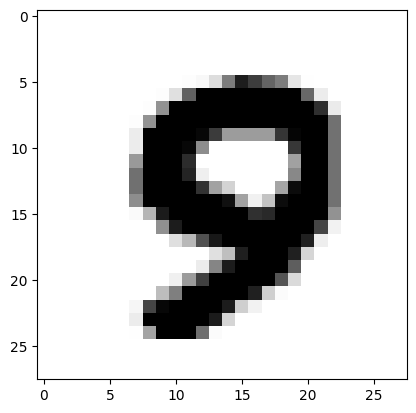

y = 9, predicted=3


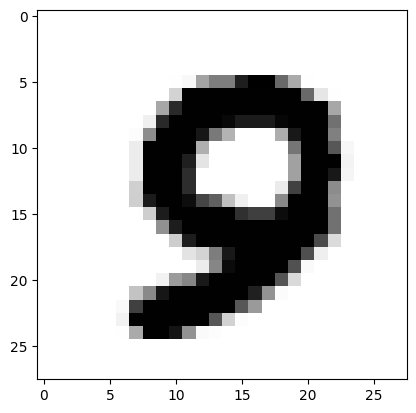

y = 9, predicted=5


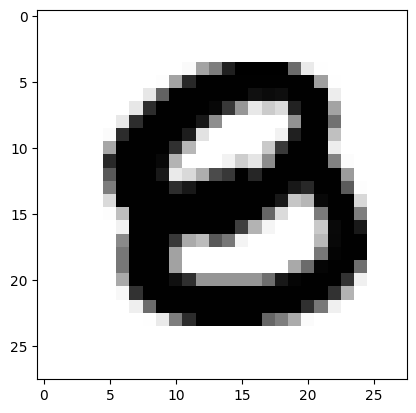

y = 8, predicted=0


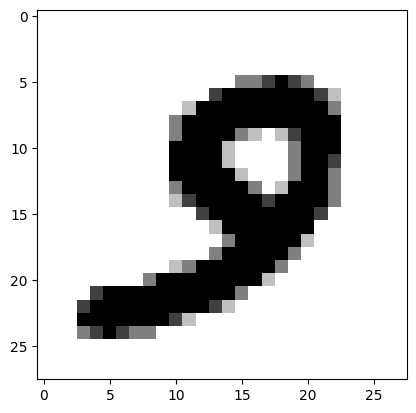

y = 9, predicted=3


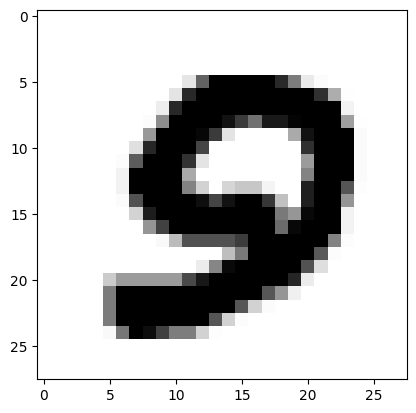

y = 9, predicted=0


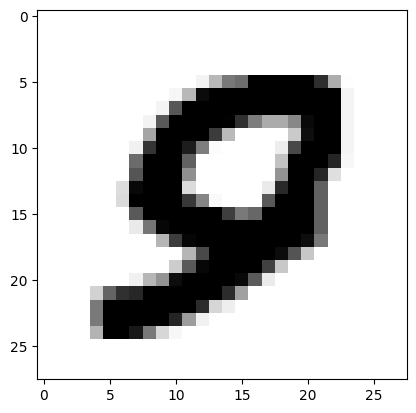

y = 9, predicted=5


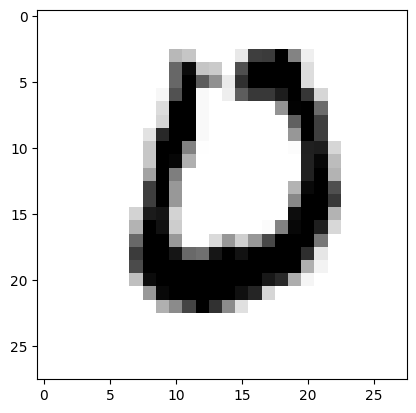

y = 0, predicted=6


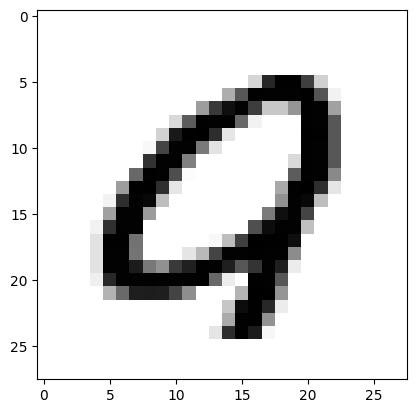

y = 9, predicted=0


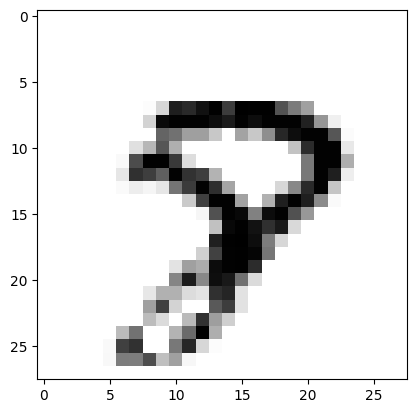

y = 8, predicted=9


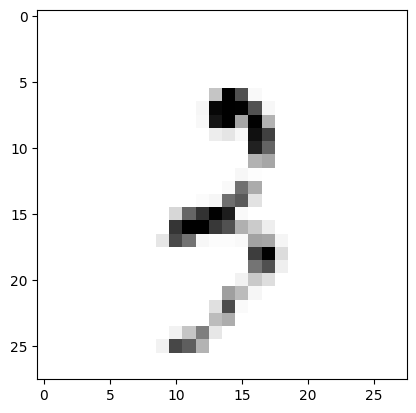

y = 3, predicted=2


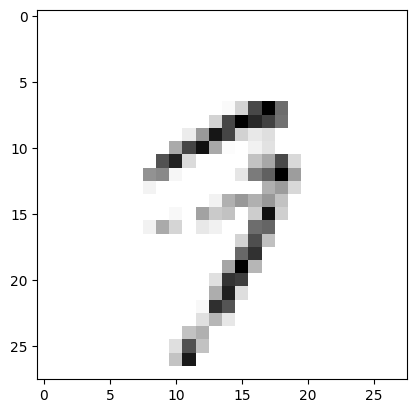

y = 9, predicted=7


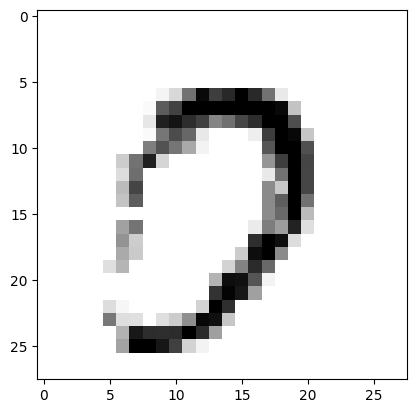

y = 0, predicted=3


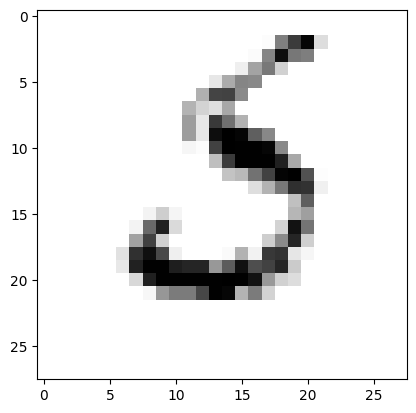

y = 5, predicted=0


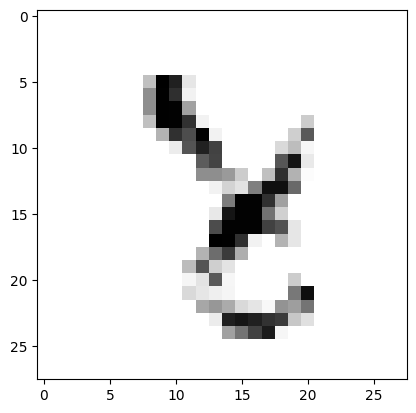

y = 8, predicted=4


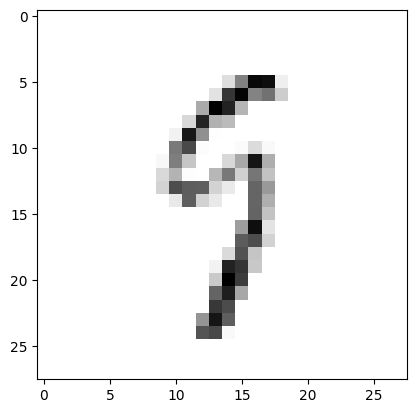

y = 9, predicted=5


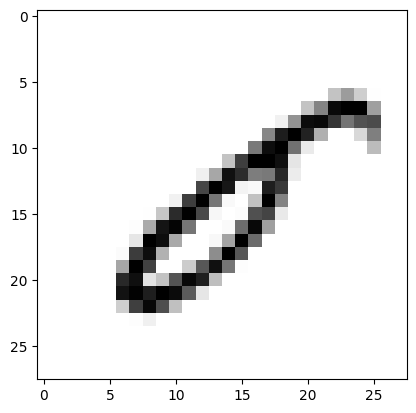

y = 0, predicted=2


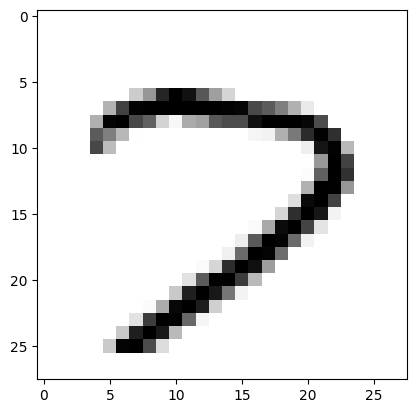

y = 7, predicted=3


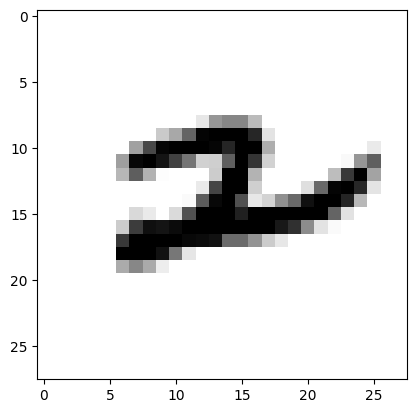

y = 2, predicted=7


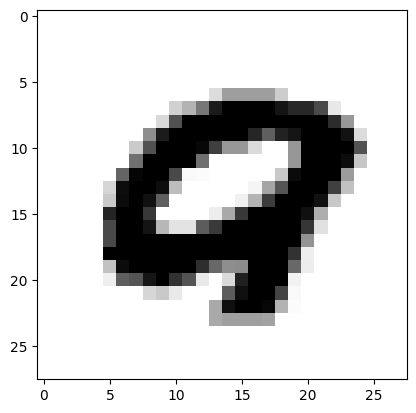

y = 9, predicted=0


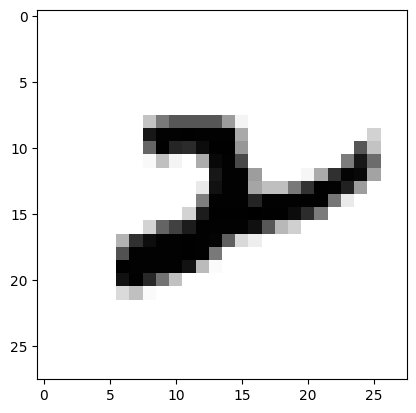

y = 2, predicted=1


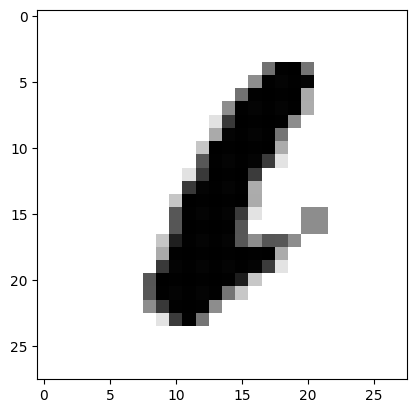

y = 1, predicted=8


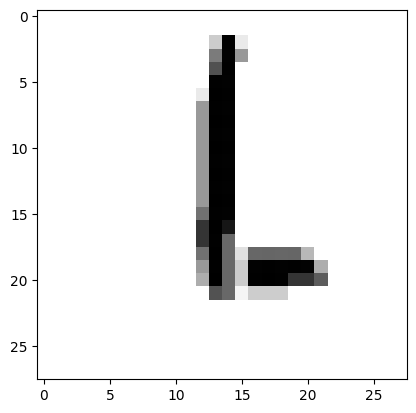

y = 1, predicted=2


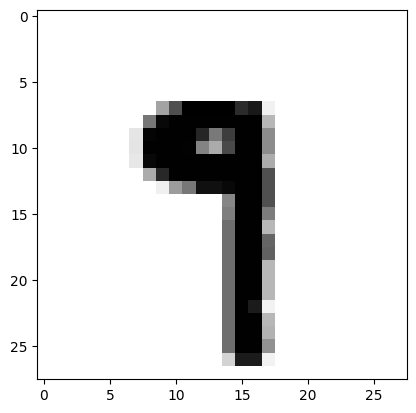

y = 9, predicted=7


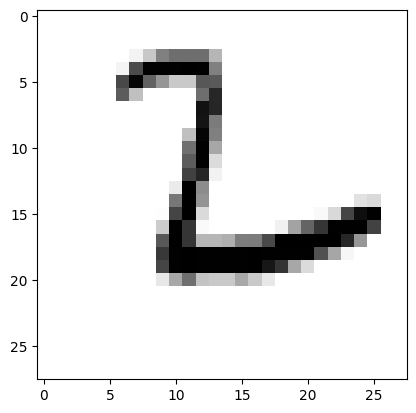

y = 2, predicted=6


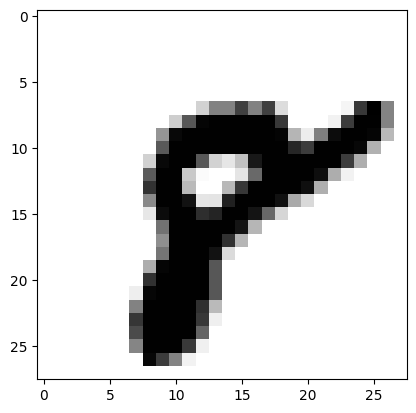

y = 8, predicted=9


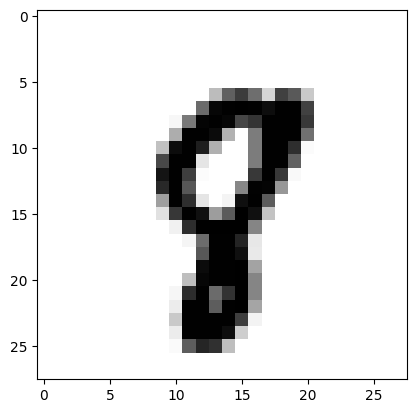

y = 8, predicted=9


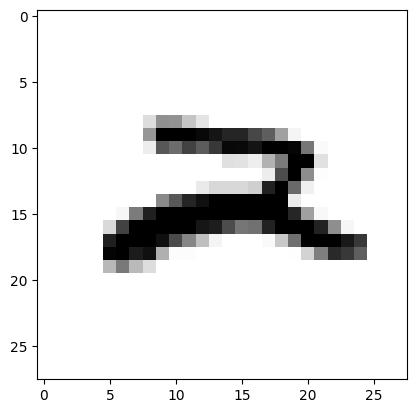

y = 2, predicted=7


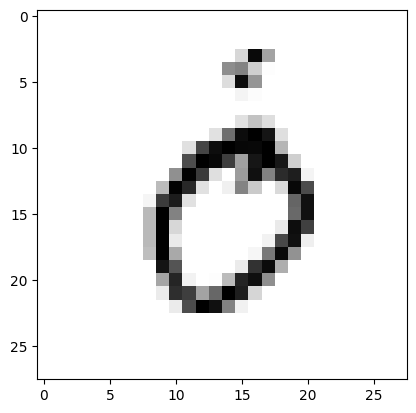

y = 0, predicted=6


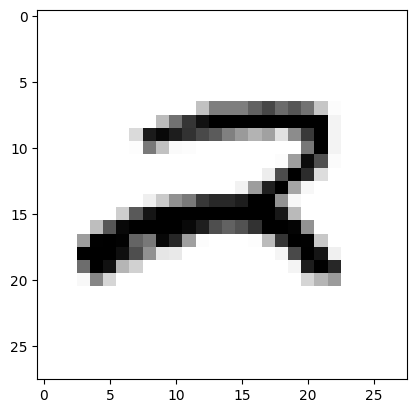

y = 2, predicted=3


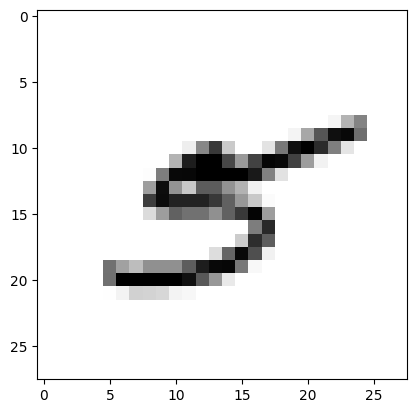

y = 5, predicted=6


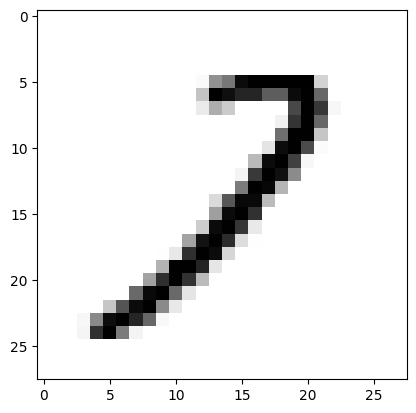

y = 7, predicted=3


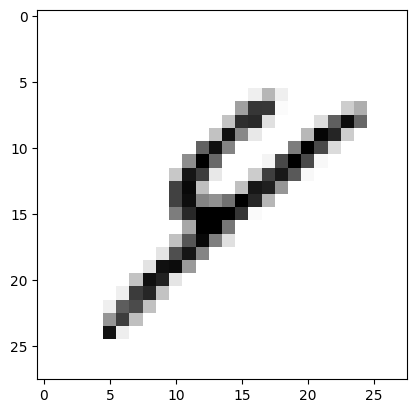

y = 4, predicted=9


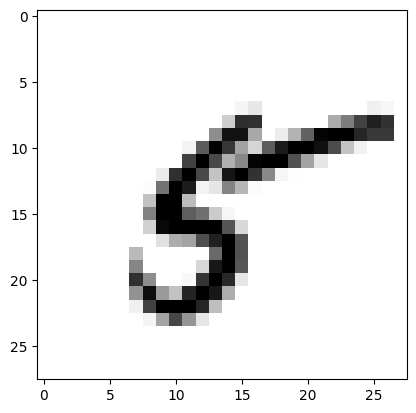

y = 5, predicted=6


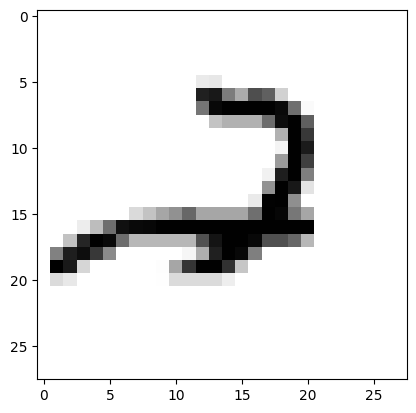

y = 2, predicted=7


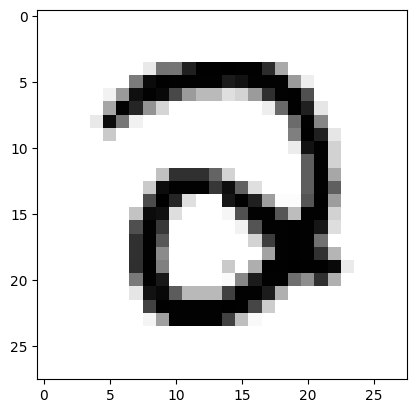

y = 2, predicted=6


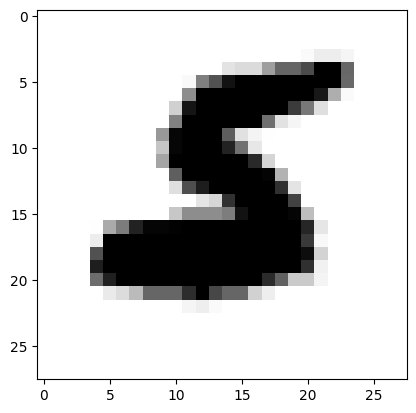

y = 5, predicted=6


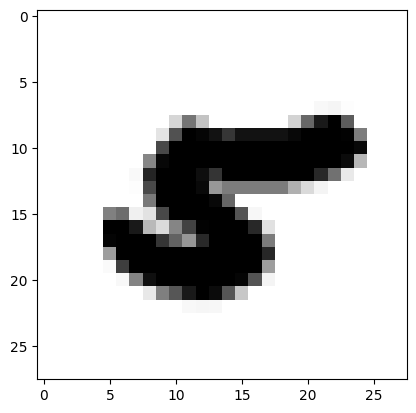

y = 5, predicted=8


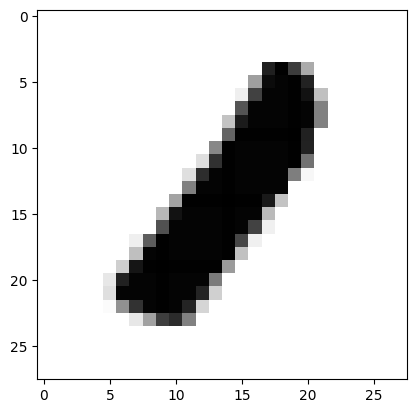

y = 1, predicted=8


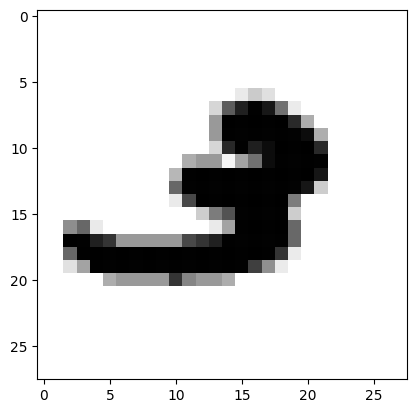

y = 3, predicted=9


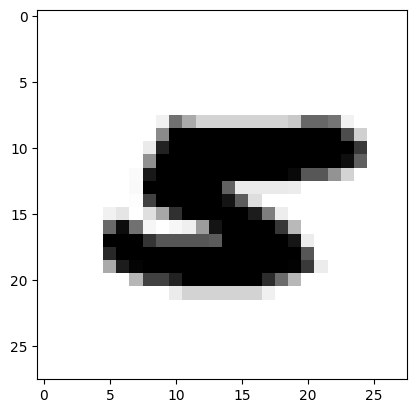

y = 5, predicted=8


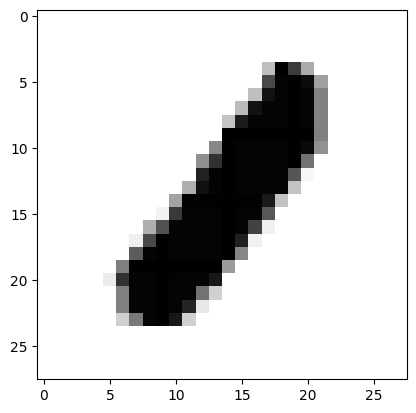

y = 1, predicted=8


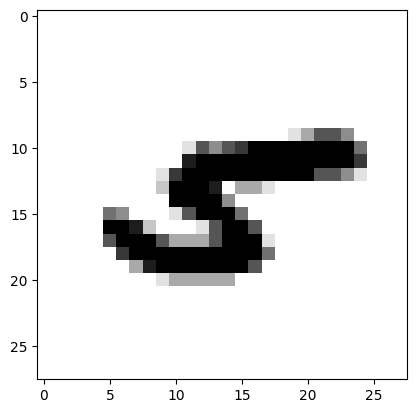

y = 5, predicted=6


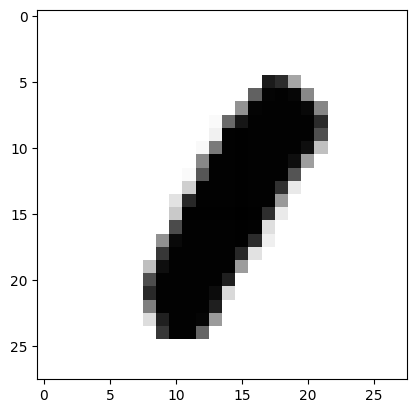

y = 1, predicted=8


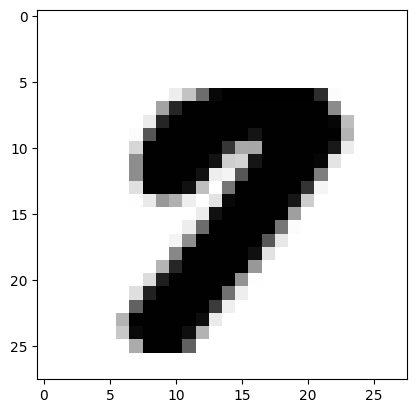

y = 7, predicted=9


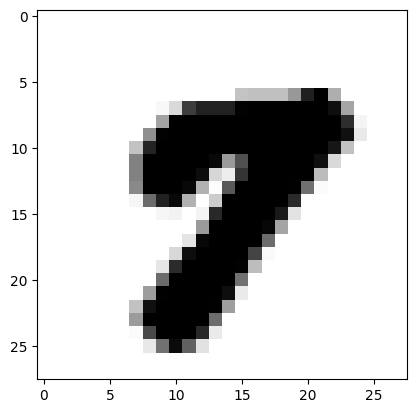

y = 7, predicted=9


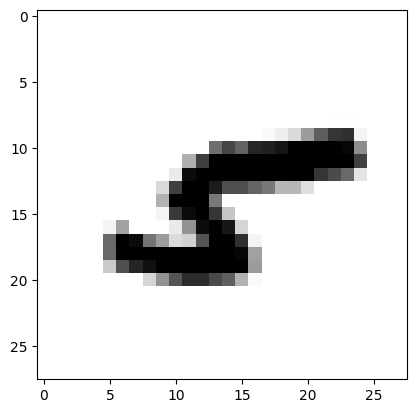

y = 5, predicted=8


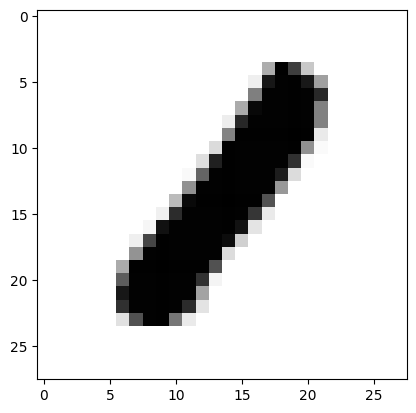

y = 1, predicted=8


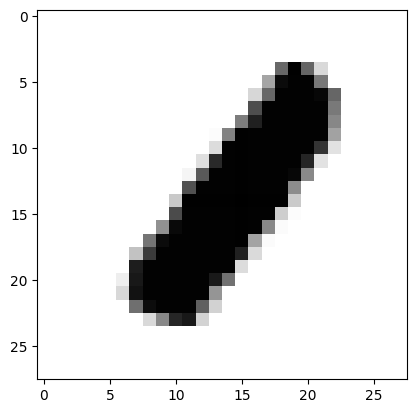

y = 1, predicted=8


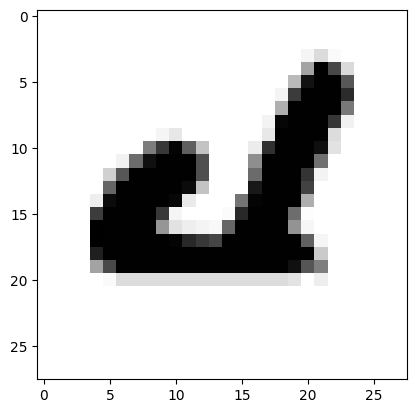

y = 4, predicted=0


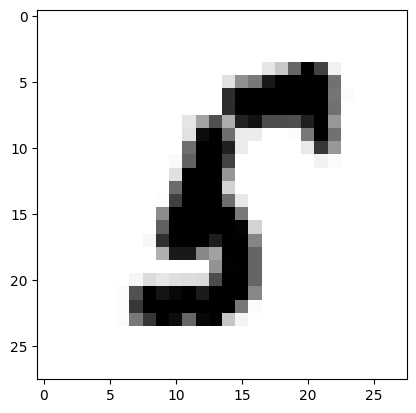

y = 5, predicted=0


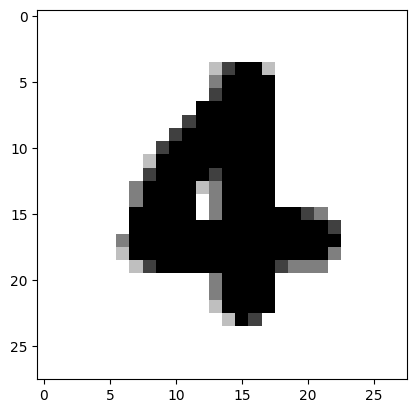

y = 4, predicted=0


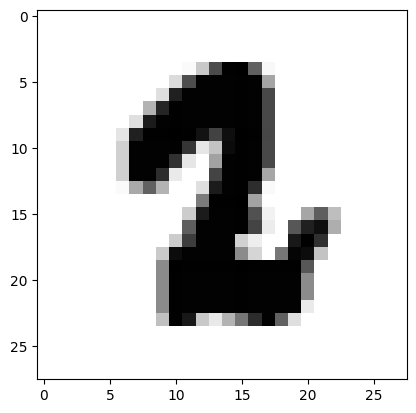

y = 2, predicted=1


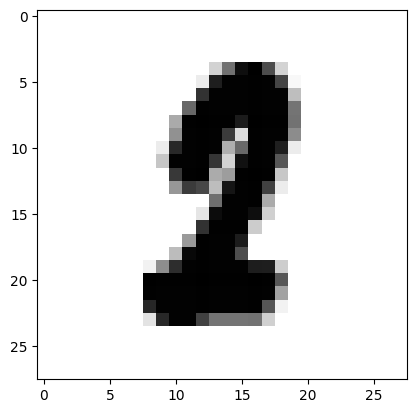

y = 2, predicted=0


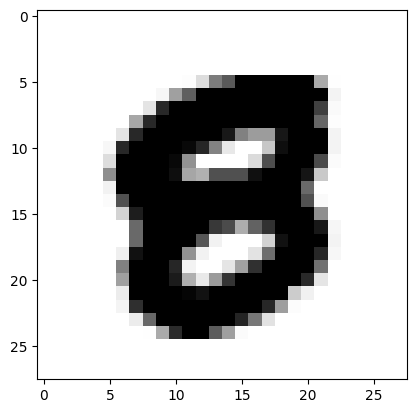

y = 8, predicted=0


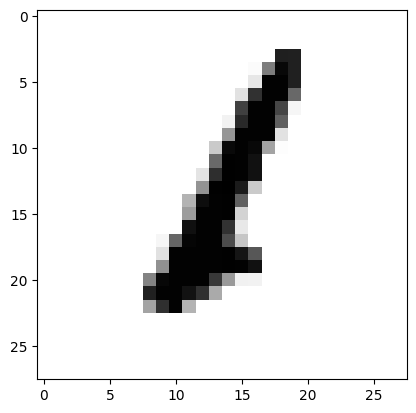

y = 1, predicted=0


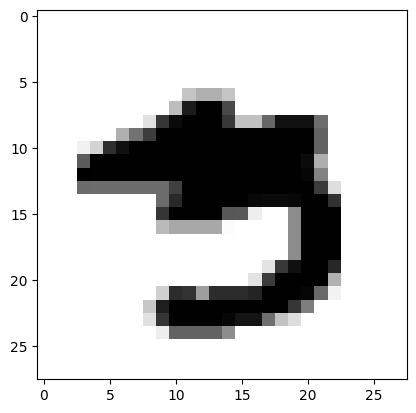

y = 3, predicted=9


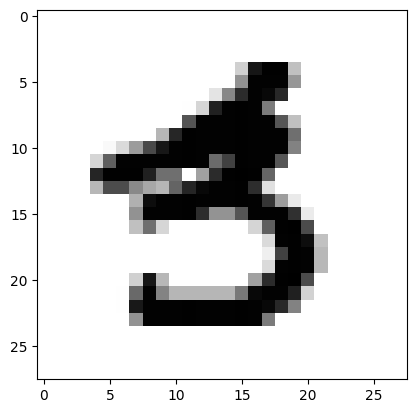

y = 3, predicted=8


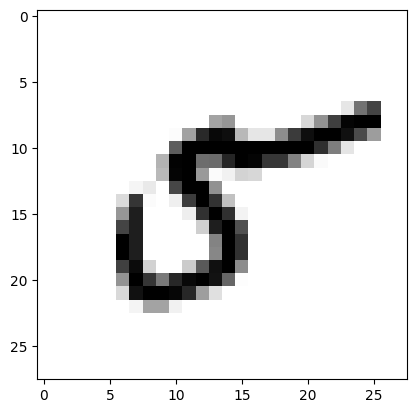

y = 5, predicted=0


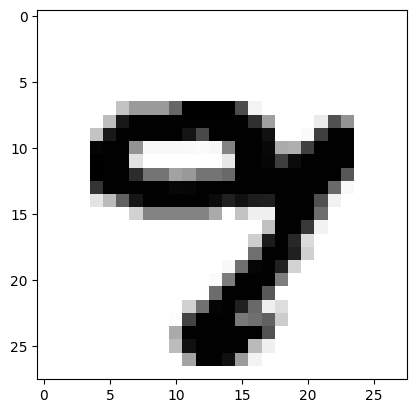

y = 9, predicted=7


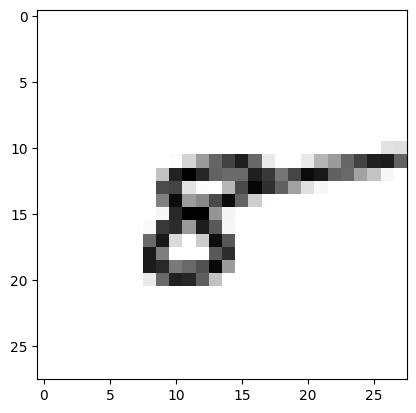

y = 8, predicted=6


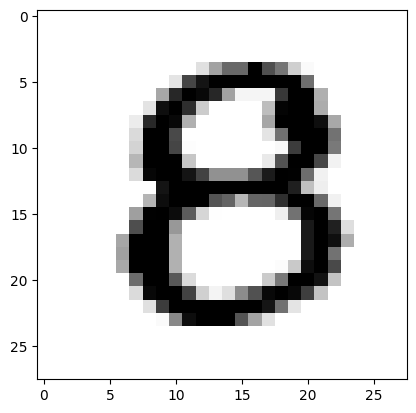

y = 8, predicted=0


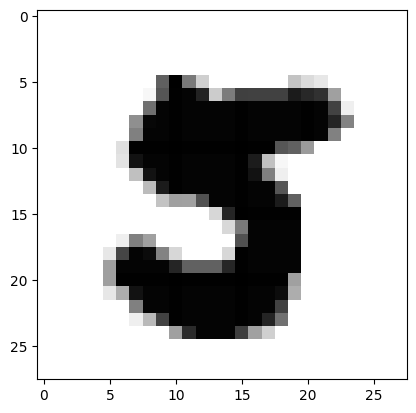

y = 5, predicted=3


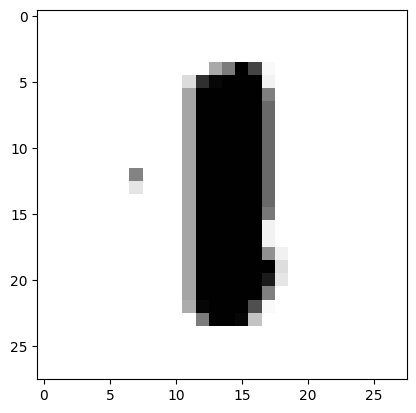

y = 1, predicted=8


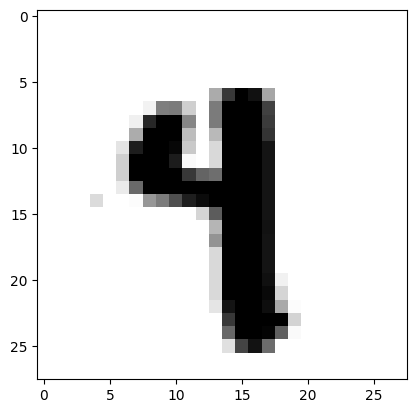

y = 4, predicted=9


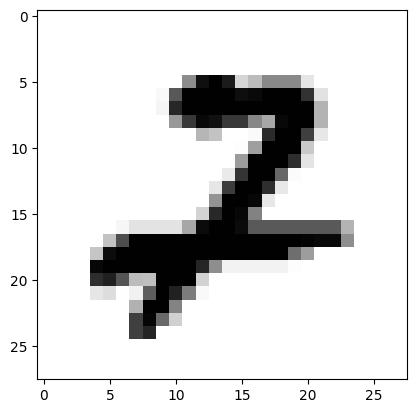

y = 7, predicted=2


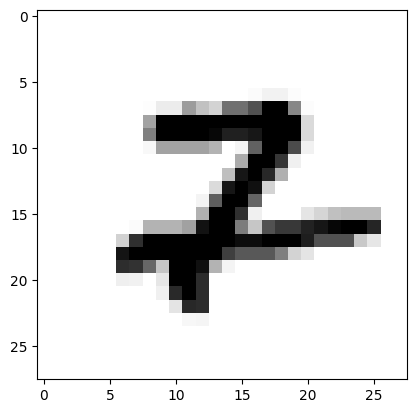

y = 7, predicted=2


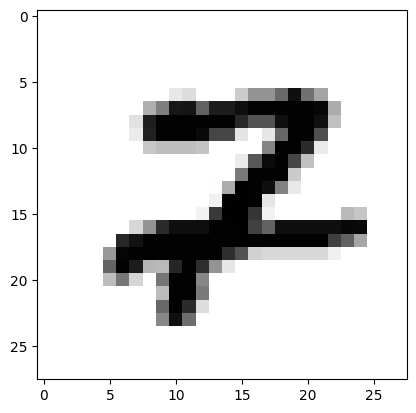

y = 7, predicted=2


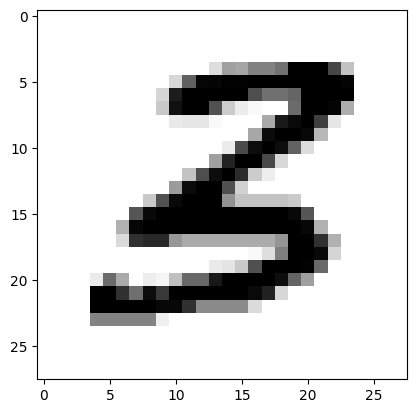

y = 3, predicted=2


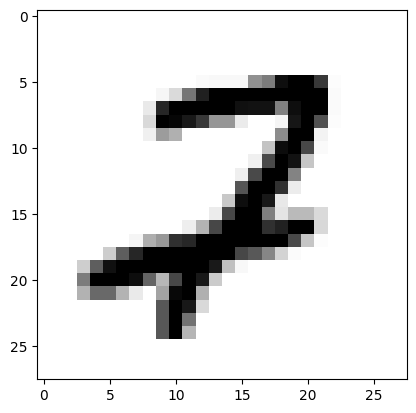

y = 7, predicted=3


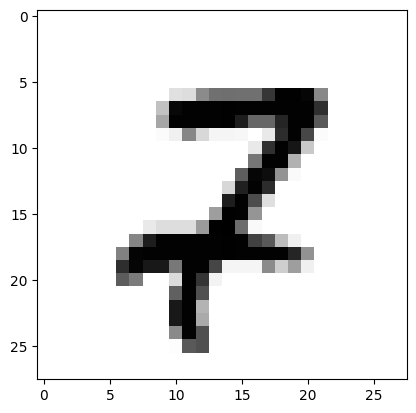

y = 7, predicted=2


y = 7, predicted=3


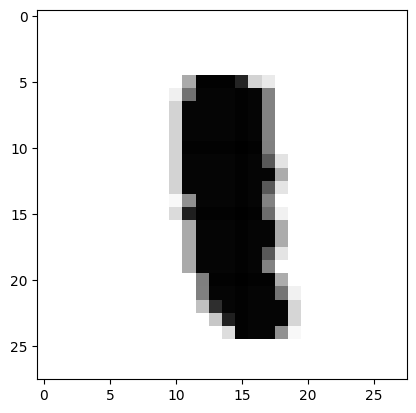

y = 1, predicted=8


y = 5, predicted=0


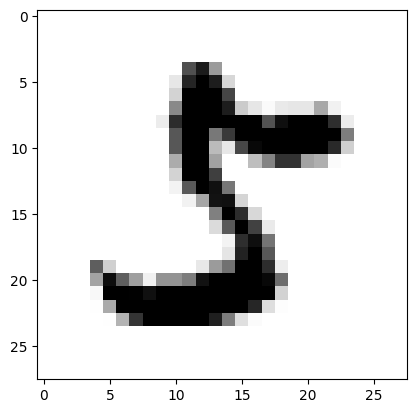

y = 5, predicted=0


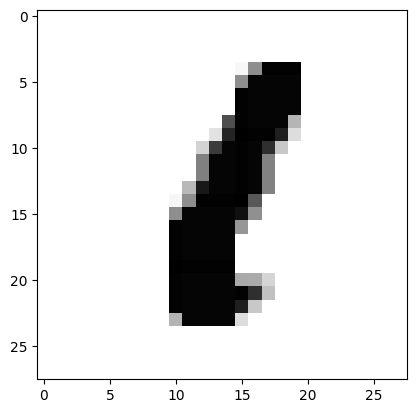

y = 1, predicted=8


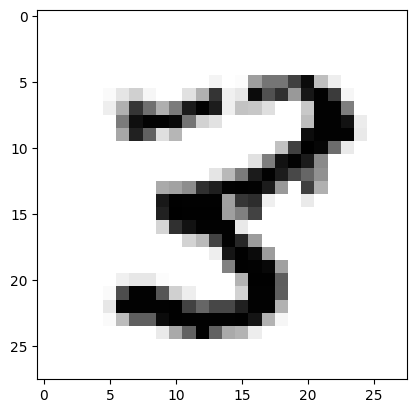

y = 3, predicted=8


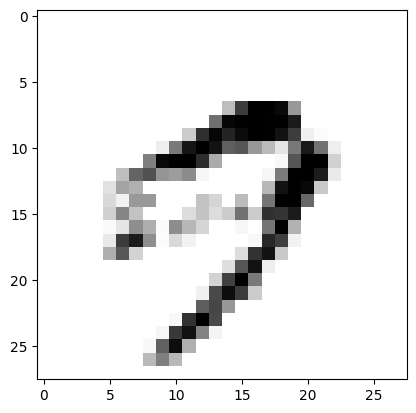

y = 9, predicted=7


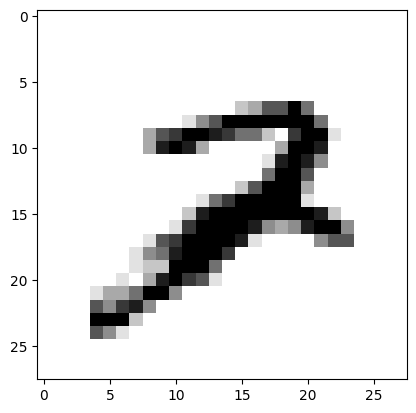

y = 2, predicted=7


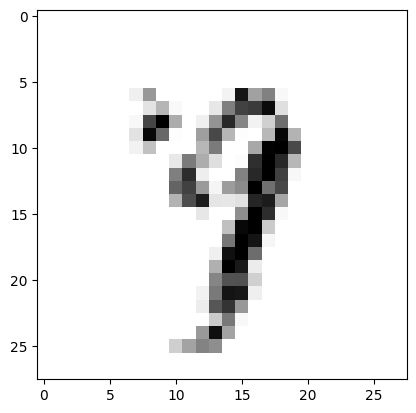

y = 9, predicted=7


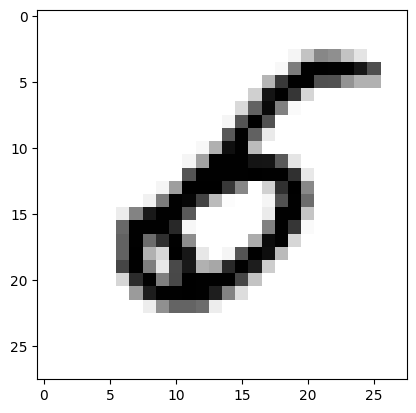

y = 5, predicted=6


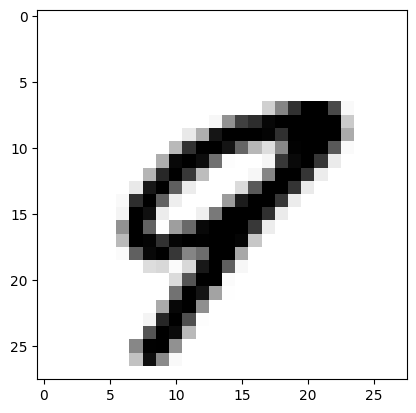

y = 9, predicted=7


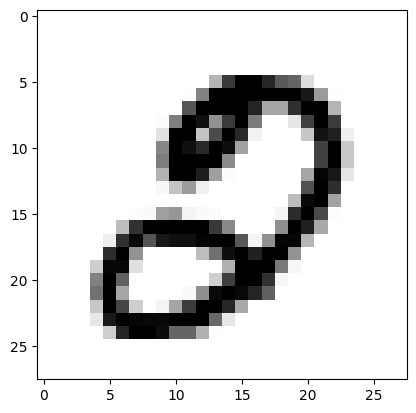

y = 2, predicted=0


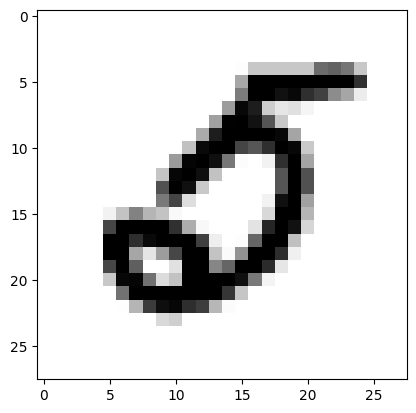

y = 5, predicted=0


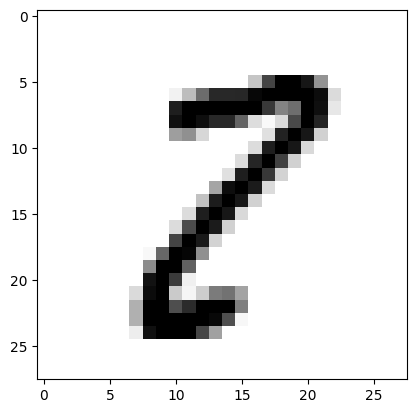

y = 2, predicted=3


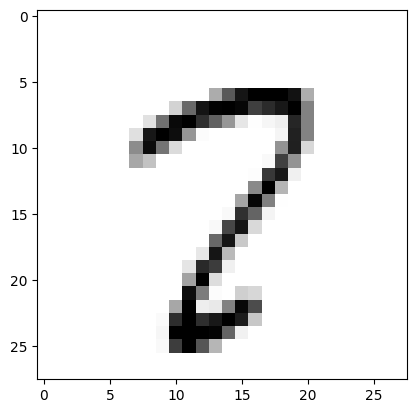

y = 2, predicted=3


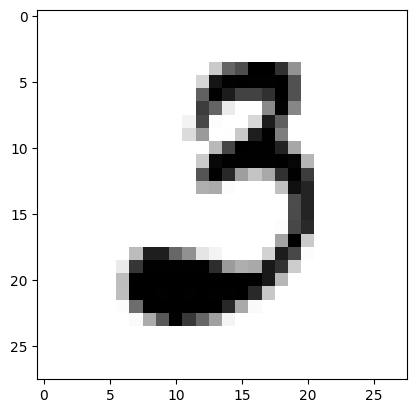

y = 3, predicted=0


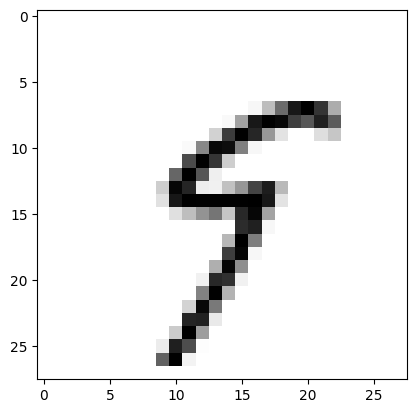

y = 9, predicted=5


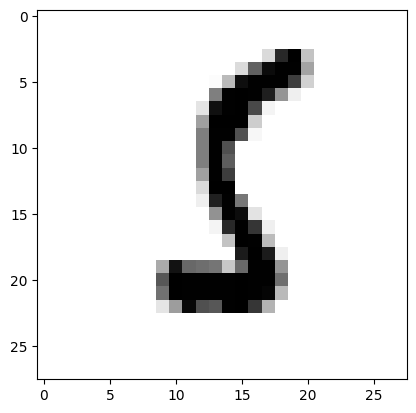

y = 5, predicted=6


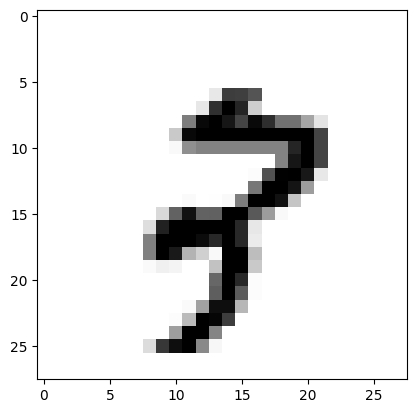

y = 3, predicted=7


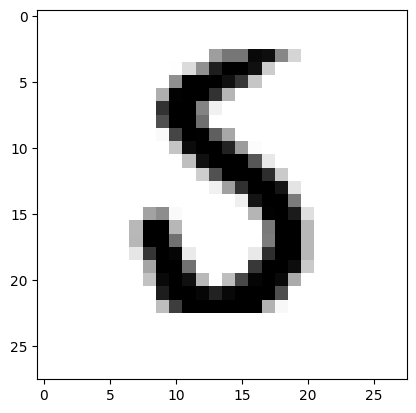

y = 5, predicted=6


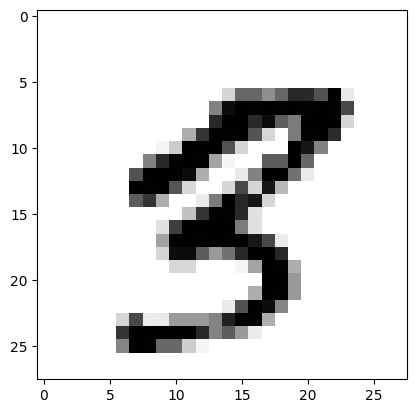

y = 3, predicted=8


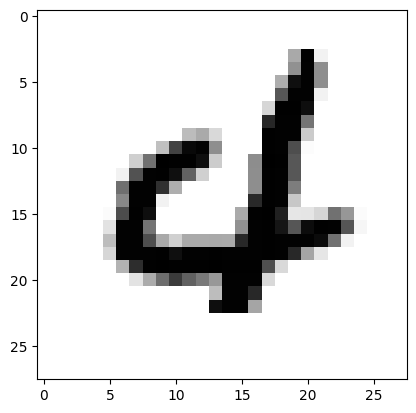

y = 4, predicted=0


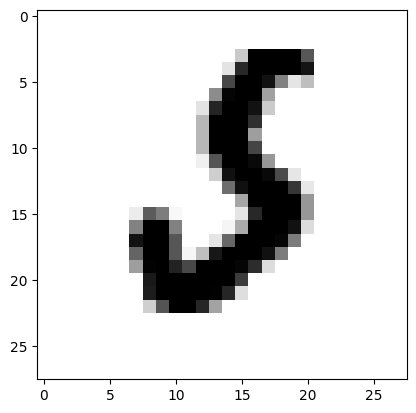

y = 5, predicted=6


In [ ]:
for i in range(len(test_y)):
  if test_y[i]==predicted[i]: continue

  plt.imshow(test_x[i].reshape((28,28)), cmap=plt.cm.binary)
  plt.show()
  print("y = {}, predicted={}".format(test_y[i], predicted[i]))

## **2-5. DropOut, 배치 정규화 순서 바꾸기**

- 딥러닝 프레임워크를 이용하여 네트워크를 구성할 때 다양한 정규화 기법들을 사용함
- 배치 정규화(batch normaliation), 드랍 아웃을 사용할 때, 어떤 순서로 사용하는 것이 좋은가?
- 출처: https://gaussian37.github.io/dl-concept-order_of_regularization_term/
- 출처: stackoverflow

### 2-5-1. 주장 1

- Convoluter Layer 또는 Fully Connected Layer 등의 layer 뒤에 적용되는 것이 맞다고 본다.
- 그리고 ReLU와 같은 Activation function을 적용하기 전에 적용하는 것을 추천하고 있다.
- 왜냐하면 배치 정규화의 목적이 네트워크 연산 결과가 원하는 방향의 분포대로 나오는 것이기 때문에
- 핵심 연산인 Convolution 연산 뒤에 바로 적용하여 정규화 하는 것이 핵심이다.
- 즉, Activation function이 적용되어 분포가 달라지기 전에 적용하는 것이 올바른 방법이다.

### 2-5-2. 주장 2

- activation function을 적용한 뒤에 적용하는 것이 맞다고 본다.

### 2-5-3. 주장 3

- Convolution 연산과 함께 사용되는 pooling 연산은 정규화 기법 적용이 끝난 뒤에 적용하는 것을 추천한다.
- 저자의 경험을 기반으로 하므로 정확하지 않을 수 있지만, dropout 이후에 적용하니 성능이 잘 나왔다.(물론 task마다 다르겠지만)

### 2-5-4. 정리

- 정리하면 Convolution - Batch Normalization - Activation - Dropout - Pooling 순서로 네트워크를 구성하는 것이 좋음
- 아래 그림은 CS231n(스탠포드 대학교, Deep Learning for Computer Vision 강의)의 Batchn Normalization 관련 강의 자료 중 일부
<center><img src='https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/images/DL005_CNN_ImageClassification_001.png' width="" height ="" /></center><br /><br />

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)        

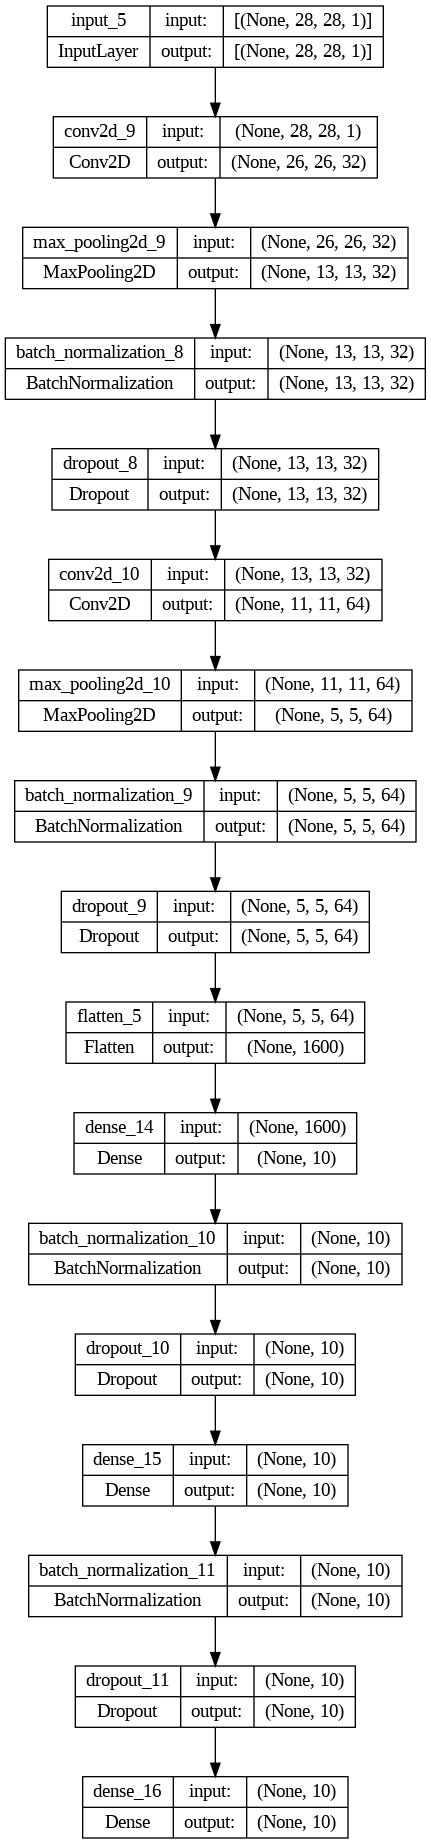

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [ ]:
plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=50, verbose=1, batch_size=128, validation_split=0.2,
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

loss =  0.1542477011680603 , val_loss =  0.12574182450771332
313/313 [==============================] - 1s 3ms/step - loss: 0.1095 - accuracy: 0.9684
loss= 0.10953741520643234
acc= 0.9684000015258789
313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1095 - accuracy: 0.9684
loss= 0.10953741520643234
acc= 0.9684000015258789


## **2-6. 다수의 Conv 레이어 추가하기**

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))

model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(32, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Dense(10, activation='relu'))

model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 12, 12, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 64)       

In [ ]:
plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=50, verbose=1, batch_size=128, validation_split=0.2,
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

loss =  0.15796522796154022 , val_loss =  0.11806545406579971
313/313 [==============================] - 1s 3ms/step - loss: 0.1176 - accuracy: 0.9659
loss= 0.11755973845720291
acc= 0.9659000039100647
313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1176 - accuracy: 0.9659
loss= 0.11755973845720291
acc= 0.9659000039100647


## **2-7. dropout 확률 변경하기**

In [ ]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))

model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(32, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # MODIFIED
model.add(Dense(10, activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.5)) # MODIFIED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 12, 12, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 64)       

In [ ]:
plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=50)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=50, verbose=1, batch_size=128, validation_split=0.2,
          callbacks=[plot_losses, early_stopping])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

loss =  1.0630873441696167 , val_loss =  0.3087490200996399
313/313 [==============================] - 1s 4ms/step - loss: 0.2961 - accuracy: 0.9536
loss= 0.29606154561042786
acc= 0.9535999894142151
313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


# **3. CIFAR10 데이터셋 적용 예제**

- 참조: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# (raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print(raw_train_x[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


9 truck


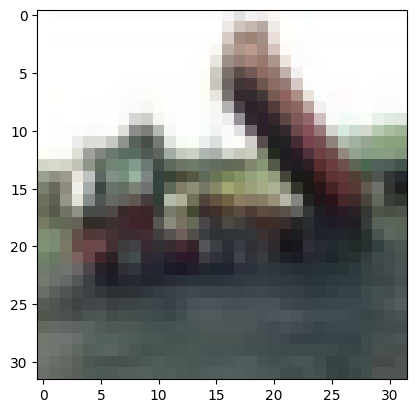

4 deer


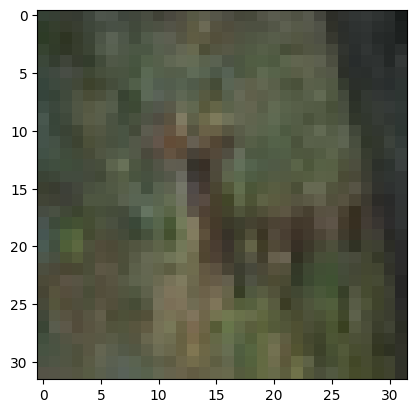

7 horse


9 truck


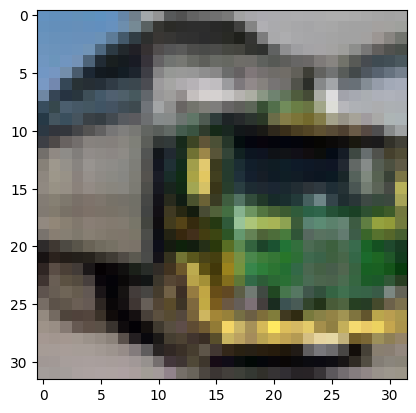

In [ ]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [ ]:
model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((32,32,3)))
# model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 4096)              0         
                                                                 
 dense_23 (Dense)            (None, 10)               

# **4. 3D 의료영상 분류**

- 참조: https://keras.io/examples/vision/3D_image_classification/

## **4-1. 패키지 불러오기**

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## **4-2. 데이터 준비**

### 4-2-1. 데이터 다운로드

In [ ]:
url = "https://github.com/hasibzunair/3D-image-classification-tutorial/releases/download/v0.2/CT-0.zip"
filename = os.path.join(os.getcwd(), "CT-0.zip")
keras.utils.get_file(filename, url)

url = "https://github.com/hasibzunair/3D-image-classification-tutorial/releases/download/v0.2/CT-23.zip"
filename = os.path.join(os.getcwd(), "CT-23.zip")
keras.utils.get_file(filename, url)

1045162547/1045162547 [==============================] - 9s 0us/step


'/content/CT-23.zip'

### 4-2-2. 파일정리

- 폴더생성

In [ ]:
os.makedirs("MosMedData")

- 압축풀기

In [ ]:
with zipfile.ZipFile("CT-0.zip", "r") as z_fp:
    z_fp.extractall("./MosMedData/")

with zipfile.ZipFile("CT-23.zip", "r") as z_fp:
    z_fp.extractall("./MosMedData/")

```
MosMedData/
  CT-0/
    study_0001.nii.gz
    study_0002.nii.gz
    ...
    study_0100.nii.gz
  CT-23/
    study_0939.nii.gz
    study_0940.nii.gz
    ...
    study_1108.nii.gz
```

- 파일 목록 확보

In [ ]:
normal_scan_paths = [
    os.path.join(os.getcwd(), "MosMedData/CT-0", x)
    for x in os.listdir("MosMedData/CT-0")
]

abnormal_scan_paths = [
    os.path.join(os.getcwd(), "MosMedData/CT-23", x)
    for x in os.listdir("MosMedData/CT-23")
]

print("CT scans with normal lung tissue: " + str(len(normal_scan_paths)))
print("CT scans with abnormal lung tissue: " + str(len(abnormal_scan_paths)))

print(normal_scan_paths[:3])
print(abnormal_scan_paths[:3])


CT scans with normal lung tissue: 100
CT scans with abnormal lung tissue: 100
['/content/MosMedData/CT-0/study_0038.nii.gz', '/content/MosMedData/CT-0/study_0071.nii.gz', '/content/MosMedData/CT-0/study_0005.nii.gz']
['/content/MosMedData/CT-23/study_0951.nii.gz', '/content/MosMedData/CT-23/study_0943.nii.gz', '/content/MosMedData/CT-23/study_0949.nii.gz']


### 4-2-3. 데이터 읽기

In [ ]:
import nibabel as nib

from scipy import ndimage

# 3D CT이미지를 저장하는 nii파일은 nibabel 라이브러리로 읽는다.
def read_nifti_file(filepath):
    scan = nib.load(filepath)
    scan = scan.get_fdata()
    return scan


def normalize(volume):
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img):
    # 원하는 사이즈 128 x 128 x 64
    desired_depth = 64
    desired_width = 128
    desired_height = 128

    # 실제 이미지 사이즈
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]

    # 확대 축소 비율
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height

    # 회전
    img = ndimage.rotate(img, 90, reshape=False)

    # 리사이즈 실행
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)

    return img


def process_scan(path):

    volume = read_nifti_file(path)
    volume = normalize(volume)
    volume = resize_volume(volume)

    return volume

In [ ]:
abnormal_scans = np.array([process_scan(path) for path in abnormal_scan_paths])
normal_scans = np.array([process_scan(path) for path in normal_scan_paths])

### 4-2-4. 레이블링 데이터 만들기

In [ ]:
abnormal_labels = np.array([1 for _ in range(len(abnormal_scans))])
normal_labels = np.array([0 for _ in range(len(normal_scans))])

### 4-2-5. 데이터 분할

In [ ]:
# Split data in the ratio 70-30 for training and validation.
x_train = np.concatenate((abnormal_scans[:70], normal_scans[:70]), axis=0)
y_train = np.concatenate((abnormal_labels[:70], normal_labels[:70]), axis=0)
x_val = np.concatenate((abnormal_scans[70:], normal_scans[70:]), axis=0)
y_val = np.concatenate((abnormal_labels[70:], normal_labels[70:]), axis=0)
print(
    "Number of samples in train and validation are %d and %d."
    % (x_train.shape[0], x_val.shape[0])
)

Number of samples in train and validation are 140 and 60.


### 4-2-6. 데이터 증강

- 이미지를 회전시켜서 데이텨를 증강함
- Conv3D를 사용하기 위해 데이터를 (batch, height, width, depth, channel)의 5차원 데이터로 변환

In [ ]:
import random
from scipy import ndimage


@tf.function
def rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume


def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label

### 4-2-7. 데이터 셋 생성

In [ ]:
# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

batch_size = 2
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(x_train))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

### 4-2-8. 이미지 확인

Dimension of the CT scan is: (128, 128, 64, 1)


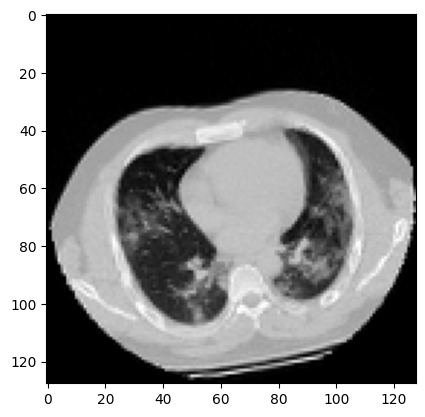

In [ ]:
import matplotlib.pyplot as plt

data = train_dataset.take(1)
images, labels = list(data)[0]
images = images.numpy()
image = images[0]
print("Dimension of the CT scan is:", image.shape)
plt.imshow(np.squeeze(image[:, :, 30]), cmap="gray")
plt.show()

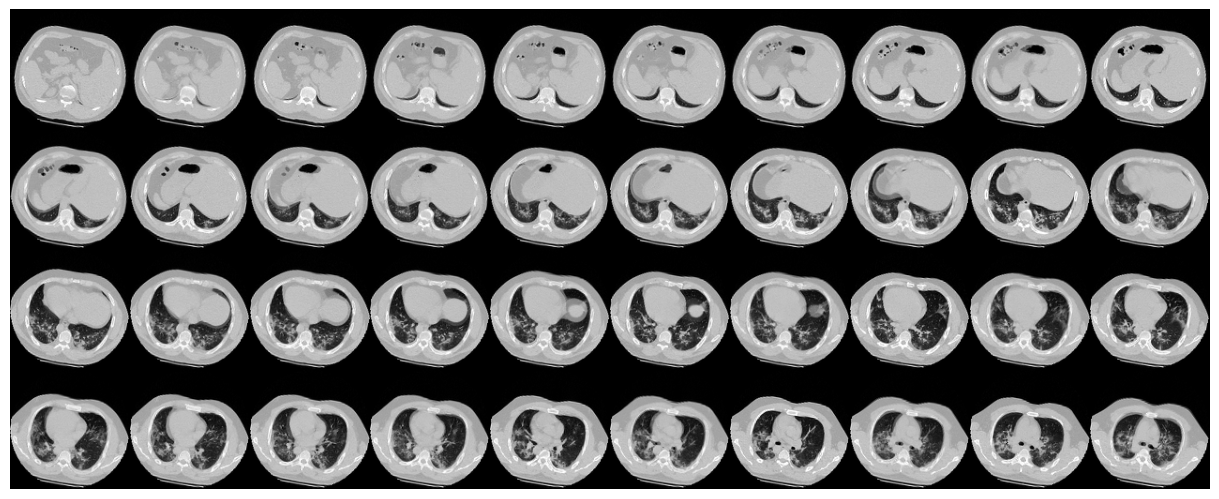

In [ ]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(4, 10, 128, 128, image[:, :, :40])

## **4-3. 모델 정의**

In [ ]:
def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 64, 1)  0         
                             ]                                   
                                                                 
 conv3d (Conv3D)             (None, 126, 126, 62, 64)  1792      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 63, 63, 31, 64)   0         
 )                                                               
                                                                 
 batch_normalization_20 (Bat  (None, 63, 63, 31, 64)   256       
 chNormalization)                                                
                                                                 
 conv3d_1 (Conv3D)           (None, 61, 61, 29, 64)    110656    
                                                             

## **4-4. 모델 설정**

### 4-4-1. Loss와 Optimizer 설정

- Adam 사용
- 학습율: 초기값은 0.0001, 이후 100,000회마다 0.96으로 감소

In [ ]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

### 4-4-2. callback 정의

- Model Save(Check Point)
- Early Stopping

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_classification.h5", save_best_only=True
)

early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

## **4-5. 모델 학습**

In [ ]:
epochs = 100
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/100
70/70 - 35s - loss: 0.6857 - acc: 0.6071 - val_loss: 0.9694 - val_acc: 0.5000 - 35s/epoch - 500ms/step
Epoch 2/100
70/70 - 27s - loss: 0.6626 - acc: 0.6071 - val_loss: 1.8224 - val_acc: 0.5000 - 27s/epoch - 388ms/step
Epoch 3/100
70/70 - 27s - loss: 0.6743 - acc: 0.6071 - val_loss: 1.4513 - val_acc: 0.5000 - 27s/epoch - 391ms/step
Epoch 4/100
70/70 - 27s - loss: 0.6663 - acc: 0.5857 - val_loss: 0.8883 - val_acc: 0.5000 - 27s/epoch - 389ms/step
Epoch 5/100
70/70 - 28s - loss: 0.6433 - acc: 0.6000 - val_loss: 2.0619 - val_acc: 0.5000 - 28s/epoch - 394ms/step
Epoch 6/100
70/70 - 27s - loss: 0.6397 - acc: 0.6571 - val_loss: 2.2554 - val_acc: 0.5000 - 27s/epoch - 388ms/step
Epoch 7/100
70/70 - 28s - loss: 0.5965 - acc: 0.6857 - val_loss: 1.7927 - val_acc: 0.5000 - 28s/epoch - 405ms/step
Epoch 8/100
70/70 - 28s - loss: 0.6035 - acc: 0.6500 - val_loss: 1.1732 - val_acc: 0.5000 - 28s/epoch - 403ms/step
Epoch 9/100
70/70 - 27s - loss: 0.6399 - acc: 0.6143 - val_loss: 0.7293 - val_ac

- 손실그래프 그리기

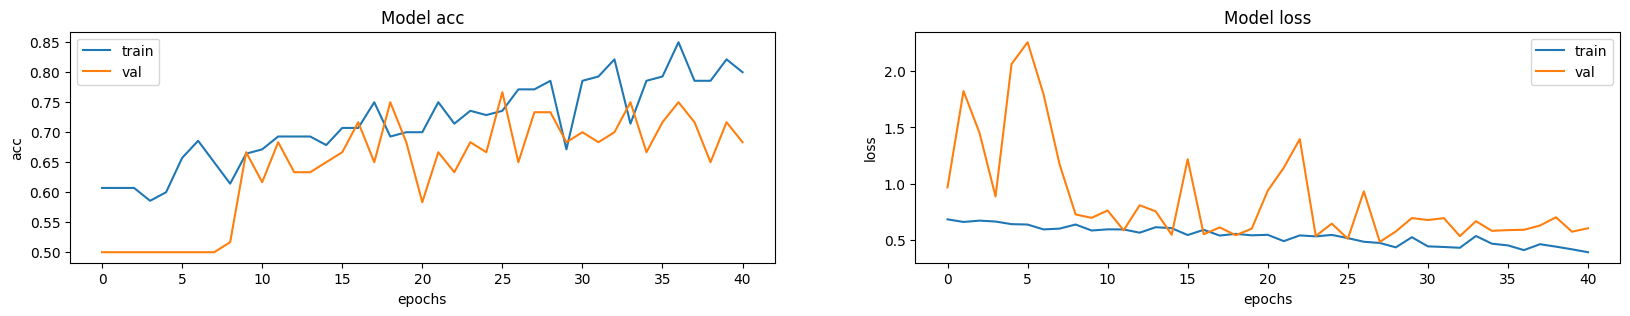

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

## **4-6. 예측**

In [ ]:
model.load_weights("3d_image_classification.h5")
prediction = model.predict(np.expand_dims(x_val[0], axis=0))[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["normal", "abnormal"]
for score, name in zip(scores, class_names):
    print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
    )

1/1 [==============================] - 0s 433ms/step
This model is 16.76 percent confident that CT scan is normal
This model is 83.24 percent confident that CT scan is abnormal


# **5. PyTorch를 이용한 CNN**

## **5-1. CNN으로 Fashion MNIST 학습**

### 5-1-1. 패키지 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

### 5-1-2. 기본 설정

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
EPOCHS     = 40
BATCH_SIZE = 64

### 5-1-3. 데이터 준비

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./.data',
                   train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 102056839.70it/s]


Extracting ./.data/MNIST/raw/train-images-idx3-ubyte.gz to ./.data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 57904251.35it/s]


Extracting ./.data/MNIST/raw/train-labels-idx1-ubyte.gz to ./.data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26907256.42it/s]


Extracting ./.data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4342495.73it/s]


Extracting ./.data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/MNIST/raw



In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

- 하이퍼파라미터

  - to() 함수는 모델의 파라미터들을 지정한 곳으로 보내는 역할
  - 일반적으로 CPU 1개만 사용할 경우 필요는 없지만, GPU를 사용하고자 하는 경우 to("cuda")로 지정하여 GPU로 보내야 함.
  - 지정하지 않을 경우 계속 CPU에 남아 있게 되며 빠른 훈련의 이점을 누릴 수 없음
  - 최적화 알고리즘으로 파이토치에 내장되어 있는 optim.SGD 사용

In [ ]:
model     = Net().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

### 5-1-4. 모델 학습

In [ ]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

### 5-1-5. 테스트

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

### 5-1-6. 실행

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.344739
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.019252
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.582608
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.593260
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.500245
[1] Test Loss: 0.1915, Accuracy: 94.42%
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.269880
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.531907
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.250333
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.294348
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.328037
[2] Test Loss: 0.1185, Accuracy: 96.38%
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.457554
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.535921
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.354856
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.177608
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.420357
[3] Test Loss: 0.0907, Accuracy: 97.18%
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.525275
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.446081
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.233846


## **5.2 좀더 깊은 CNN 모델 적용**

### 5-2-1. 패키지 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets, models

### 5-2-2. 기본 설정

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

### 5-2-3. 데이터 준비

- 하이퍼파라미터

In [ ]:
EPOCHS     = 300
BATCH_SIZE = 128

- 데이터셋, 데이터 로더 만들기

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.RandomCrop(32, padding=4),
                       transforms.RandomHorizontalFlip(),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))])),
    batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./.data',
                   train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))])),
    batch_size=BATCH_SIZE, shuffle=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 55228528.05it/s] 


Extracting ./.data/cifar-10-python.tar.gz to ./.data


### 5-2-4. ResNet 모델 만들기

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 2, stride=1)
        self.layer2 = self._make_layer(32, 2, stride=2)
        self.layer3 = self._make_layer(64, 2, stride=2)
        self.linear = nn.Linear(64, num_classes)

    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [ ]:
model = ResNet().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.1,
                      momentum=0.9, weight_decay=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

### 5-2-5. 모델 학습

In [ ]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

### 5-2-6. 테스트

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

### 5-2-7. 실행

In [ ]:
for epoch in range(1, EPOCHS + 1):
    scheduler.step()
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


[1] Test Loss: 1.4874, Accuracy: 48.34%
[2] Test Loss: 1.2045, Accuracy: 58.88%
[3] Test Loss: 0.9379, Accuracy: 67.29%
[4] Test Loss: 1.0119, Accuracy: 67.32%
[5] Test Loss: 1.0381, Accuracy: 66.43%
[6] Test Loss: 0.8770, Accuracy: 70.54%
[7] Test Loss: 0.9157, Accuracy: 70.66%
[8] Test Loss: 0.7414, Accuracy: 75.03%
[9] Test Loss: 0.7367, Accuracy: 75.47%
[10] Test Loss: 0.7643, Accuracy: 74.78%
[11] Test Loss: 0.6999, Accuracy: 77.02%
[12] Test Loss: 0.7019, Accuracy: 76.50%
[13] Test Loss: 0.6890, Accuracy: 76.79%
[14] Test Loss: 0.8542, Accuracy: 73.07%
[15] Test Loss: 0.7992, Accuracy: 74.54%
[16] Test Loss: 0.7596, Accuracy: 75.70%
[17] Test Loss: 1.0835, Accuracy: 69.40%
[18] Test Loss: 0.7026, Accuracy: 76.56%
[19] Test Loss: 1.2373, Accuracy: 67.41%
[20] Test Loss: 0.8381, Accuracy: 72.49%
[21] Test Loss: 0.5877, Accuracy: 80.00%
[22] Test Loss: 0.8947, Accuracy: 72.24%
[23] Test Loss: 0.7091, Accuracy: 76.54%
[24] Test Loss: 0.6759, Accuracy: 77.92%
[25] Test Loss: 1.0118, A

KeyboardInterrupt: ignored